In [1]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Pylint parameters
%config Completer.use_jedi = False

# Measure Runtime
# !pip install ipython-autotime
# %load_ext autotime

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!pwd

/Users/guillaume/code/migasar/kaggle-shopee-wagon552/notebooks


In [4]:
train_data = pd.read_csv('../raw_data/shopee-product-matching/train.csv') 
test_data = pd.read_csv('../raw_data/shopee-product-matching/test.csv')
ss_data = pd.read_csv('../raw_data/shopee-product-matching/sample_submission.csv', index_col = 0)

In [5]:
train_df = train_data.copy()
test_df = train_data.copy()
ss_df = train_data.copy()

In [6]:
train_df.size

171250

In [7]:
train_df.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
train_df.describe()

label_group
count  3.425000e+04
mean   2.128611e+09
std    1.234630e+09
min    2.580470e+05
25%    1.050720e+09
50%    2.120410e+09
75%    3.187910e+09
max    4.294197e+09

In [10]:
train_df['image'].shape

(34250,)

In [11]:
train_df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

In [12]:
train_df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

In [13]:
# pip install scikit-image

In [14]:
from skimage import io
import os

In [15]:
def trans_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/shopee-product-matching/train_images', file_name))
    return io.imread(filename)

In [16]:
img_1 = trans_img('00039780dfc94d01db8676fe789ecd05.jpg')

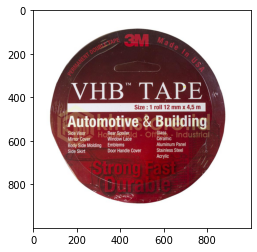

In [17]:
plt.imshow(img_1)

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [18]:
from skimage import io
import os

def get_img_size():
    images = [image for image in train_df['image']]
    img_shape = []
    for image in images[11:76]:
        img = trans_img(image)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
    return size_img

In [19]:
img_size_df = get_img_size()
img_size_df.sort_values(by=0, ascending=False)

0     1  2
9   4501  4500  3
56  1024  1024  3
16  1024  1024  3
15  1024  1024  3
28  1024  1024  3
..   ...   ... ..
64   640   640  3
11   604   604  3
8    595   595  3
2    449   449  3
7    314   314  3

[65 rows x 3 columns]

In [20]:
max(img_size_df[1]), min(img_size_df[1])

(4500, 314)

In [21]:
sizes_set = set(img_size_df[0])
def sizes_ratio():
    for size in sizes_set:
        return img_size_df[0].value_counts()/len(train_df['image'])*100

In [22]:
len(sizes_set)

18

In [23]:
x = sizes_ratio()
x.sort_values(ascending=False)


640     0.055474
1024    0.043796
700     0.020438
800     0.017518
1000    0.014599
960     0.002920
4501    0.002920
604     0.002920
595     0.002920
720     0.002920
449     0.002920
699     0.002920
650     0.002920
314     0.002920
820     0.002920
669     0.002920
665     0.002920
748     0.002920
Name: 0, dtype: float64

In [24]:
def get_unsquarred_ratio() :
    records = img_size_df.to_records(index=False)
    list_sizes = list(records)
    print(list_sizes)
    unsquarred =[]
    for x in list_sizes:
        if x[0]!=x[1]:
            unsquarred.append(x[0])
    return f"Ratio of unsquarred images : {round(len(unsquarred)/len(train_df['image']), 3)*100} %"

In [25]:
get_unsquarred_ratio()

[(1000, 1000, 3), (1000, 1000, 3), (449, 449, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (800, 800, 3), (314, 314, 3), (595, 595, 3), (4501, 4500, 3), (700, 700, 3), (604, 604, 3), (665, 665, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (700, 700, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3), (1000, 1000, 3), (1000, 1000, 3), (720, 720, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (700, 700, 3), (699, 699, 3), (800, 800, 3), (640, 640, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (800, 800, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (820, 820, 3), (640, 640, 3), (960, 960, 3), (640, 640, 3), (748, 748, 3), (800, 800, 3), (1024, 1024, 3), (1000, 1000, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (669, 669, 3), (650, 650, 3

'Ratio of unsquarred images : 0.0 %'

Turning images into arrays of size (224, 224, 3) 

In [26]:
from PIL import Image

def drop_unsquarred():
    df_squarred = []
    images = [image for image in train_df['image']]
    for image in images:
        image_size=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").size
        if image_size[0] == image_size[1]:
            df_squarred.append(image)
    return df_squarred

In [27]:
df_squarred = drop_unsquarred()
df_squarred

['0000a68812bc7e98c42888dfb1c07da0.jpg',
 '00039780dfc94d01db8676fe789ecd05.jpg',
 '000a190fdd715a2a36faed16e2c65df7.jpg',
 '00117e4fc239b1b641ff08340b429633.jpg',
 '00136d1cf4edede0203f32f05f660588.jpg',
 '0013e7355ffc5ff8fb1ccad3e42d92fe.jpg',
 '00144a49c56599d45354a1c28104c039.jpg',
 '0014f61389cbaa687a58e38a97b6383d.jpg',
 '0019a3c6755a194cb2e2c12bfc63972e.jpg',
 '001be52b2beec40ddc1d2d7fc7a68f08.jpg',
 '001d7f5d9a2fac714f4d5f37b3baffb4.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001f4c8331d0554d133b10d85b7fafb2.jpg',
 '001f5580b058c6b8e33132190a757318.jpg',
 '002039aaf8618627a0442d5e89e5dda6.jpg',
 '0027aaf8dd8bdbf0e4f2c19024e436cf.jpg',
 '00286d2760e433a8a01cbd9e056144f7.jpg',
 '002f978c58a44a00aadfca71c3cad2bb.jpg',
 '00303ad1c062fdeaf5f41b9ffb71a5fb.jpg',
 '003524b70715bf6bfa00451ca08e66e0.jpg',
 '0035b8fc42955c0fa2301b68e2ffe861.jpg',
 '00369839c7d94411e54437b7cf59b603.jpg',
 '003906c6c6bba4cde15e5e854dba8f6d.jpg',
 '003a6fbbdf88f0

In [28]:
def resize_save_unsquarred():
    img_squarred = []
    for image in df_squarred:
        image_open=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").resize((100,100))
        image_open.save(f"../raw_data/shopee-product-matching/train_images/resized/{image}")
        img_squarred.append(image_open)
    return img_squarred

In [29]:
img_squarred = resize_save_unsquarred()

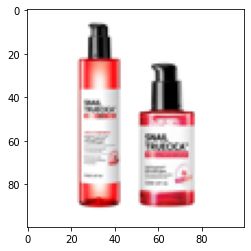

In [30]:
plt.imshow(img_squarred[1100])

In [31]:
# train_df['resized_image'] = pd.read_csv('../raw_data/shopee-product-matching/train_images/resized/train.csv') 

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Minimal Network + Common tricks + First hyperparameters tests

model = models.Sequential()

# First convolution & max-pooling
model.add(layers.Conv2D(100, (10,4), strides=(2,2), input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3)))

# Second convolution & max-pooling
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# ––– This is where your Data Scientist skills begin

In [33]:
from skimage.transform import resize
from skimage import io
import os

def resize_images():
    images = [image for image in train_df['image']]
    # img_shape = []
    for image in images[0:10]:
        image_path =  f'{image}'
        filename = os.path.abspath(os.path.join('../raw_data/shopee-product-matching/train_images/resized/', image_path))
        img = io.imread(filename)
        x = img.shape
        # img_shape.append(x)
        # print(x)
        # print(img_shape)
        # size_img = pd.DataFrame(img_shape)
        # print(size_img)
        # print(img_shape)
        # for img in size_img.loc[0,[0, 1]]:
            #print(img[0],img[1])
        #image_resized = resize(img, (img_shape[0][0] // img_shape[0][0] * 100, img_shape[0][1] // img_shape[0][1] * 100), anti_aliasing=True)
        # train_df['shape_resized'] = x
    return train_df

In [34]:
resize_images()

posting_id                                 image  \
0       train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg   
1      train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg   
2      train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg   
3      train_2406599165  00117e4fc239b1b641ff08340b429633.jpg   
4      train_3369186413  00136d1cf4edede0203f32f05f660588.jpg   
...                 ...                                   ...   
34245  train_4028265689  fff1c07ceefc2c970a7964cfb81981c5.jpg   
34246   train_769054909  fff401691371bdcb382a0d9075dfea6a.jpg   
34247   train_614977732  fff421b78fa7284284724baf249f522e.jpg   
34248  train_3630949769  fff51b87916dbfb6d0f8faa01bee67b8.jpg   
34249  train_1792180725  ffffa0ab2ae542357671e96254fa7167.jpg   

            image_phash                                              title  \
0      94974f937d4c2433                          Paper Bag Victoria Secret   
1      af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2      b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3      8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4      a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   
...                 ...                                                ...   
34245  e3cd72389f248f21  Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...   
34246  be86851f72e2853c    MamyPoko Pants Royal Soft - S 70 - Popok Celana   
34247  ad27f0d08c0fcbf0  KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...   
34248  e3b13bd1d896c05c  Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...   
34249  af8bc4b2d2cf9083  FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...   

       label_group  
0        249114794  
1       2937985045  
2       2395904891  
3       4093212188  
4       3648931069  
...            ...  
34245   3776555725  
34246   2736479533  
34247   4101248785  
34248   1663538013  
34249    459464107  

[34250 rows x 5 columns]

## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential()
model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Preprocessing on titles 

In [36]:
# pip install nltk

- Lowercase
- remove numbers
- remove punctuation
- remove stop words
- select important words with stemmer

In [37]:
#labels
print(f"label_group unique values: {train_df['label_group'].nunique()}")

label_group unique values: 11014


In [38]:
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]
print("Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2


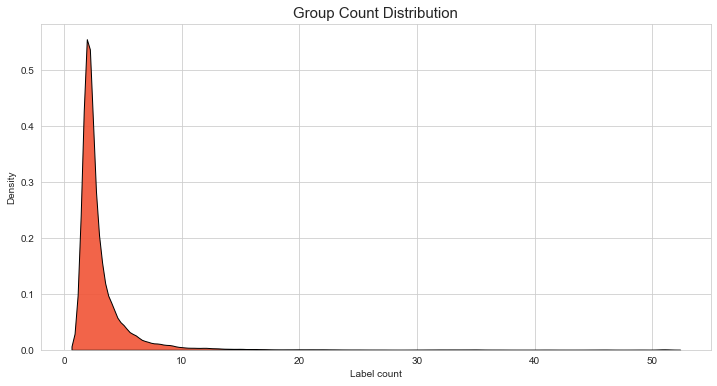

In [39]:
# Plot labels distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Group Count Distribution', fontsize = '15')
sns.kdeplot(groups_df['count'], fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Label count')
plt.show();

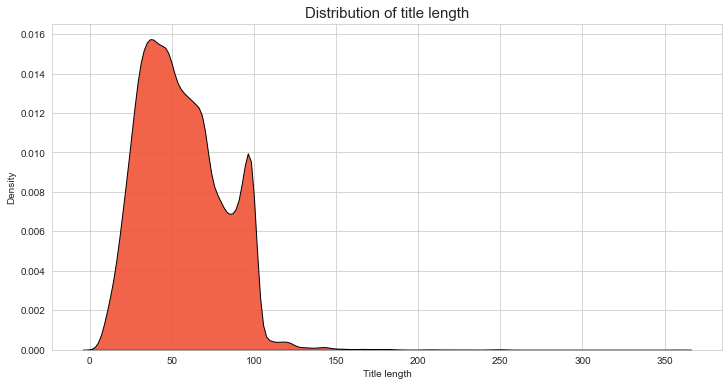

In [40]:
# Plot titles length distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(train_df['title'].apply(lambda x: len(x)), fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Title length')
plt.show();

In [41]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [42]:
import string 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

unpreproc_title = train_df["title"][1]
print(f"Before: {unpreproc_title}")
lower_title = unpreproc_title.lower()
print(f"Lower case: {lower_title}")
punct = "!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:"
rem_punct = lower_title.translate(str.maketrans('','',string.punctuation))
print(f"Remove punctuation: {rem_punct}")
rem_whitespaces = rem_punct.strip()
print(f"Remove whitespaces: {rem_whitespaces}")
tokenize = word_tokenize(rem_whitespaces)
print(f"Tokenized: {tokenize}")
rem_stop_words = [word for word in tokenize if not word in stopwords.words()]
print(f"Remove stopwords: {rem_stop_words}")
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in rem_stop_words]
print(f"Lemmatization: {lemmatized_text}")
pos_text = TextBlob(' '.join(lemmatized_text))
print(f"Part_Of_Speech: {pos_text.tags}")


Before: Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE
Lower case: double tape 3m vhb 12 mm x 4,5 m original / double foam tape
Remove punctuation: double tape 3m vhb 12 mm x 45 m original  double foam tape
Remove whitespaces: double tape 3m vhb 12 mm x 45 m original  double foam tape
Tokenized: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'm', 'original', 'double', 'foam', 'tape']
Remove stopwords: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Lemmatization: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Part_Of_Speech: [('double', 'JJ'), ('tape', 'NN'), ('3m', 'CD'), ('vhb', 'NN'), ('12', 'CD'), ('mm', 'NN'), ('x', 'VBD'), ('45', 'CD'), ('original', 'JJ'), ('double', 'JJ'), ('foam', 'NN'), ('tape', 'NN')]


In [43]:
def preproc_title(title):
    title = title.lower()
    title = title.translate(str.maketrans('','',string.punctuation))
    title = title.strip()
    tokens_title = word_tokenize(title)
    tokens_title = [word for word in tokens_title if not word in stopwords.words()]
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens_title]
    preproc_title = ' '.join(lemm_text)
    return preproc_title

def get_part_of_speech(prepped_title):
    part_of_speech = TextBlob(prepped_title)
    part_of_speech = ' '.join([j for (i, j) in pos_text.tags])
    return part_of_speech

In [44]:
train_df["preproc_title"] = train_df["title"].apply(lambda x: preproc_title(x))

KeyboardInterrupt: 

In [ ]:
train_df["part_of_speech"] = train_df["preproc_title"].apply(lambda x: get_part_of_speech(x))

In [ ]:
# Read in prepped data
# train_df_prep = pd.read_csv("../raw_data/shopee-preprocessed-data/train_title_prepped.csv")
# train_df_prep["label_group"] = train_df_prep["label_group"].astype(str)

In [45]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
import pathlib

In [46]:
batch_size = 32
img_height = 100
img_width = 100

In [47]:
dataset_url = "../raw_data/shopee-product-matching/train_images/resized/"


In [48]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '../raw_data/shopee-product-matching/train_images/resized/',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 0 files belonging to 0 classes.


TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.

In [49]:
os.path.dirname(os.path.abspath(os.getcwd()))

'/Users/guillaume/code/migasar/kaggle-shopee-wagon552'

In [51]:
for value in train_data.label_group.values:
    directory = str(value)
    parent_dir = os.path.dirname(os.path.abspath(os.getcwd()))
    data = 'raw_data/shopee-product-matching/train_images/resized'
    path_to_create = os.path.join(parent_dir, data, directory)
    try:
        os.mkdir(path_to_create)
        print("Directory '% s' created" % directory)
    except:
        print("File existing")
    #print(path_to_create)

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

In [52]:
parent_path = os.path.join(parent_dir, data)
list_dir = os.listdir(parent_path)
list_image = []
for i in os.listdir(parent_path):
    #print(i)
    if os.path.isfile(os.path.join(os.path.join(parent_dir, data),i)):
         list_image.append(i)
list_image

['2acfffc7636789596041b426cbd345af.jpg',
 'a68eb1b5a0c1c326d7b6ef42cfddaf69.jpg',
 'effc540299fe3a4b132802f0a9547a4e.jpg',
 '53bd87d83a50740667ecd736bb067388.jpg',
 '5799f0087fb40852b8e52738dfe74da9.jpg',
 '269f32ada306667212f536622702e79f.jpg',
 'b77b584b24ba32709f73834824ad934f.jpg',
 '8ff1a4a535f10c68b2050989fa62880e.jpg',
 'd81d3c8ede870a2fd200a07d36101d22.jpg',
 '985058e672aa59e8dd1bcfe8aa1a02e7.jpg',
 '997cc87d6c809dccc52f4c4d5ffff173.jpg',
 '02b9fc146d13dd77b4c7fff87d3f32d2.jpg',
 '69126295282d4e0fe129c14da74c953f.jpg',
 '5c0b8338bf89bd78cc4a7d65bcd43d00.jpg',
 '5bb66fb2e1611a841756fc3fb3790666.jpg',
 'af0af6526cf72e562bc259bd19d6e279.jpg',
 '55d6f0e62f96f09156140ed681bc212a.jpg',
 'ee13fc318a370a2796eeadb82ebf0974.jpg',
 '3907c3111915387b6133943d19e433a9.jpg',
 'c70d447addae19f938838175ec861dce.jpg',
 '0b0712a9b8ddce1b014d253ad5c53ce3.jpg',
 'cf9aff433e24e1a4cecac8dcb4a2691f.jpg',
 'ec4d2019f45b9a4c24768c190bba1bb9.jpg',
 '6ecc8aebc6d6b123c5f4bba8cb577599.jpg',
 '89c85594060f97

In [ ]:
train_data

In [54]:
import shutil

for image in list_image:
    source = parent_path
    destination = str(list(train_data[train_data['image'] == image]['label_group'])[0])
    print(image)
    print(destination)
    print(os.path.join(source,destination))
    try:
        new_path = shutil.move(f"{source}/{image}", f"{source}/{destination}/{image}")
    except:
        print('nothing')

2acfffc7636789596041b426cbd345af.jpg
1429052699
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1429052699
a68eb1b5a0c1c326d7b6ef42cfddaf69.jpg
3498630557
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3498630557
effc540299fe3a4b132802f0a9547a4e.jpg
1226500780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1226500780
53bd87d83a50740667ecd736bb067388.jpg
1533873951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1533873951
5799f0087fb40852b8e52738dfe74da9.jpg
1979966959
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1979966959
269f32ada306667212f536622702e79f.jpg
2712541699
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2712541699
b77b

93f1712ac50526a93cfd023a4769bde8.jpg
196545328
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/196545328
3b5956b6600e4b09a5a004ec18e3d186.jpg
952489020
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952489020
9ff96ebf1bdc725669926699caf8e4c7.jpg
3641663108
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3641663108
338f15d329a78b7047bf103f635a9786.jpg
2274223447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2274223447
9ae8a4b168ac7e8580f1a84b91efadba.jpg
2915337809
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2915337809
efba0d9a6234a78526b0b01acf5a2849.jpg
2970350839
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2970350839
6b9b21f6

c337c9066ab226b60cb823272e93b77b.jpg
2843799921
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2843799921
10e19ded9286af0000b09af36d4e1d27.jpg
863127146
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/863127146
f50f2fc6d2f1ca43509f8b603f9f4cfa.jpg
576717309
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/576717309
acdf7ee8d81bf2a2e4460d154d618536.jpg
1116126635
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1116126635
8af7a4a6a5f7b7da7f589aa91d5553b8.jpg
3206118280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3206118280
dca07d03c06498968d0c7b9301986ecb.jpg
2511986505
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2511986505
0507dab9

4e8bf61a444a3e94be81242512427209.jpg
2097365516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2097365516
578f3332e0e70433874ba1160433a84a.jpg
2346934759
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2346934759
5ed7f6f0d35e12293a218e3d925d72ec.jpg
2701575241
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2701575241
31e2d3a1e6bc8fa89183daa98a54a626.jpg
2753090832
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2753090832
121cf1ca3a4966c7bf0b68f48871a252.jpg
357724179
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/357724179
013dc2aa3de1b329f89f427649226567.jpg
2610277012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2610277012
481e5d

472bf87debcb102e82122ff1b1f2c326.jpg
2998314427
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2998314427
0062ecb6613287fde4d3a6542e2d8bc7.jpg
960169860
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/960169860
5b12f624600c3db42f62fc658ede8259.jpg
1165453206
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1165453206
dc75e2c8d63955e2af87b6118ea4e900.jpg
2123332638
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2123332638
4b1cbd2dbea35bf4c57d24c87a4f981f.jpg
326201568
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/326201568
3b6b6f0ec2678c324d1c6e4c36186bd6.jpg
2091710919
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2091710919
ad5b6531

e2bf6794626fd9c060b56d9c28ec21a0.jpg
4044845496
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4044845496
ab1a94ed256f6d7791636fbe18a5630e.jpg
1574620312
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1574620312
2302160ab47c15d95e5548b704133899.jpg
1145791039
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1145791039
c2bf7ada2b860674b06382a40b109b08.jpg
2868076475
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2868076475
4af293d98e0b89e05a831f014c518a01.jpg
2935813666
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935813666
848ad4e3ffed1e70f5b67457d25d3fcc.jpg
1630743196
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1630743196
5f2d

9459eea332392e30ec680222ec6738bf.jpg
1950653848
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1950653848
fa946702b8aa4af50bbad57c017f9d87.jpg
961973479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/961973479
f7eb265244261574e2c2d26e94e84439.jpg
2659332639
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2659332639
c8014e02394ca86efb255a25e41891ff.jpg
1080680649
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1080680649
06c8e0513be9c3ef4218303b9d28bc60.jpg
3027068648
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3027068648
ce1c1060c76bca9f4189c941a630bf2d.jpg
2821685148
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2821685148
6e856d

447ae2c3526ac0e12fb80536875f5525.jpg
847060368
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/847060368
7bbc057904178c94e7907d65c8b6dd0b.jpg
125084078
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/125084078
db4ac960d28c7fcb942c52a1689c902e.jpg
3645862214
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3645862214
bd7b0de81ee9bd3125aaf202477709da.jpg
397780484
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/397780484
cb2d46a9cbdea72fcdc4882ffcb0d3ba.jpg
3407823363
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3407823363
d2033a801e6608d2bd9afbf9604ed758.jpg
3470371504
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3470371504
41425fc7eb

5cadf36fdda77f844cdc5f0fbb71d617.jpg
3395604817
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3395604817
ceacfc9f847b53fa5265e2d85e0350fa.jpg
2270331370
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2270331370
5932a1abc6c8ceb3901addb37d6fbed3.jpg
721296483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/721296483
a1af8c4990627f700c54296b6b058221.jpg
1788217507
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1788217507
a5edc2cb7e3c6576f897f8b0f96bdde0.jpg
1653842655
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1653842655
2e4723aa21f775b3de9ee5d5635d8af0.jpg
3868704829
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3868704829
eab6ae

8f8cb0322ec0a065cab3d36a14d6e451.jpg
3682402097
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3682402097
d27b3205149496cb61ba4bdb8f9e5286.jpg
2656028104
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2656028104
e7f89f4636a8fb5fdee919a3916ca8f7.jpg
1530632945
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1530632945
e9ec819861249d21ee3b650d61b94e66.jpg
3015756037
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3015756037
027c48e570e0ce0d179ade91ad54b307.jpg
73153907
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/73153907
7e70e387fda82588e4c71d1d14c76789.jpg
3206118280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3206118280
46025edd

d91635194d9f939a71f55373311ef611.jpg
256199120
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/256199120
92f0888d90425991a073aea63835eff4.jpg
3890044804
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3890044804
b2c7e6d4c0627e606298c67255498fef.jpg
1192966411
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1192966411
b8fcecb13e8f6b06f35e0d4a4445d733.jpg
2201732085
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2201732085
a7766c7b0d77ef567b94b398ee89a0f0.jpg
35254803
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/35254803
54d5416e24703b7c85632002d9b60362.jpg
856533546
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/856533546
21f5dd554c15

e755732db2f2bccadffcd5c5d8215322.jpg
848012506
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/848012506
7c1d8a11bbcd602363ec9b445fbea6e1.jpg
3346361757
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3346361757
6c589575ac524958710fc46c41e3d0fa.jpg
2871735171
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2871735171
d23d9a4f3773a86974843012b05b2b31.jpg
4056651706
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4056651706
6500f35edd85a6fa44cbc04a0f29df9a.jpg
1409501909
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1409501909
a5c297e4887ec7c8eb7a5757b24654d9.jpg
839263285
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/839263285
5d82c9a1

1f498ccff290f4b0faf1670a5df152b7.jpg
426500726
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/426500726
186e0b60e5f56509978da6a85ba56378.jpg
2582032586
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2582032586
ce7babf1bd8fd4b280857cbb0bb55667.jpg
2451413752
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2451413752
45372767c33510131f4d22000baaf755.jpg
1154928830
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1154928830
c026408023a2e9edc4d7967b9244b432.jpg
807135753
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/807135753
850637c49277166cac18c12b2c5f070c.jpg
3513028382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3513028382
7c9eb410

f3423115332137260722f24af434005a.jpg
3051259171
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3051259171
c813c6ee48b953f88c7baa6361f3a517.jpg
486399472
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/486399472
545bac06985dde79d7de7482980bef7e.jpg
1588351075
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1588351075
ddc5dd066b46c5e6c10ac92c0363690d.jpg
463367425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/463367425
01b9a20670070651b6989f47d3389962.jpg
403676653
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/403676653
c5ee94b9fb36d8597b5fef8a1a82400c.jpg
2187521519
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2187521519
2d9b0d254f

cb89abd5ffefb819874d35b22b21ca35.jpg
3102159163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3102159163
145dfbb0ef128e65e68dac1ec60b1311.jpg
497924200
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/497924200
aa315528890864006313e9fb0cac6f12.jpg
2386318710
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2386318710
7e683aa0e74ffae1d59f36c86b40bc6e.jpg
2272596341
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2272596341
76820fbffc4b22d369994c32e86c5a64.jpg
4199031478
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4199031478
1ddc64e109f6ab1f61d3d08e2391f161.jpg
2549487450
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2549487450
c096e1

d8cc23ef2bcbaab341866a524b6774c2.jpg
469595884
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/469595884
4806b40de9af64d5b764de8740b7b3fc.jpg
712775796
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/712775796
269ef2de5df2991b09db30f80c522bf5.jpg
2809031353
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2809031353
70c0d88b3c106c69cfb9ddf21de10964.jpg
1254441436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1254441436
8c5da6f67d34f5f132f85c973a5c65e0.jpg
3583220000
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3583220000
3d98ae765b9bb9b47ec9a0832b84450a.jpg
828252369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/828252369
ea40481b5b

c6ca22ab7e757681194ed3b7467ec1e8.jpg
2999794436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2999794436
63d0c8ae7e410649feb15349946903ec.jpg
2306537005
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2306537005
4a84458ceba909581084f7b5c3956b7d.jpg
622438098
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/622438098
2f44490d375f4e9a29977dba329f5390.jpg
1099725405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099725405
f27decbc3a10dff6b6697320c99a6bc5.jpg
2014926580
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2014926580
f03b1cc4899b48d24524586f45c9659d.jpg
1489685217
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1489685217
8487c4

e0de870dbc3bddfa2656a57ced0a6d35.jpg
2087590585
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2087590585
0a6fce7a9343b6ca67cd72919e30f9eb.jpg
551505582
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/551505582
847f68d709c3c3bb9c1a9c20d02335c0.jpg
2712541699
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2712541699
7b7782a234784d63eee87719fbcf9cdc.jpg
2059270622
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2059270622
c3580167fa178e29688bc0c1268a5831.jpg
832025287
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/832025287
9fab19d72d0c03b2708d3a51eb5abc8e.jpg
244622761
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/244622761
ca1ef93855

b7ee49983fd8cbf920875098bb512c9c.jpg
1946433412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1946433412
21fa8b11a679b1721a1f94b39cccac73.jpg
3334173585
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3334173585
fd03acf664ae7c18257524263a1e3e5f.jpg
2819245891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2819245891
cfab45b778fb3748b0ca6ed5671cb8d1.jpg
2240631062
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2240631062
3dd37450ec23934936078a396671c694.jpg
359918838
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/359918838
e50b1c13fafa674b6f9aacdf8c09fc44.jpg
4166473118
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4166473118
f4b47f

0f364da9a939424368deaa2f87d1e02e.jpg
4067835312
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4067835312
a5aaf60a866e95b13b2acf489120288f.jpg
3900306665
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3900306665
f8a1085fe45bfdaefb49dc4b7f7e7f04.jpg
4149277979
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4149277979
4e8c88154767a2ea77836149c756d584.jpg
772217144
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/772217144
277c8bc47b6bc635a5ee47070484373a.jpg
1699836001
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1699836001
442ee2c45cc59334d3064dd20a272aba.jpg
680352664
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/680352664
1c13f067

fd97a173d7c60d27e6459fe586797864.jpg
1313560418
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1313560418
771732cc8f5752fa41ebbaaed2170d96.jpg
2172855737
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2172855737
b2ab2ffee2b1b6969f89ddcf2d0df669.jpg
351551078
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/351551078
1c3d02297beb3211c2c122e9a39c42a5.jpg
3990652231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3990652231
a5a9fde05c9f5da73821e3ec9769eeac.jpg
1677189623
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1677189623
05ab3fb7954d9b61c1e18546c8d51eca.jpg
275813572
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/275813572
71f02cb7

31679d7f2732e2cd38b0e9a9fdada130.jpg
3433277712
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3433277712
b810daaa2737086465bd03aaa4796b40.jpg
2023870601
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2023870601
d809b45e6b9f04f36bb6e1ffb818fd60.jpg
1261987196
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1261987196
e95989a23bbf1232c05d2a9d1a79d183.jpg
349638083
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/349638083
2e7c167ade47ebb9cbee0ab8afdf8b69.jpg
3759333522
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3759333522
d744feddae11f5261bc807e985a1b2ac.jpg
2501975813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2501975813
dc1501

e64b27584fe96472a34f0a57e0df54ed.jpg
3225705412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3225705412
91ec603d48ea1465f7468016bc0d13f9.jpg
1189797816
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1189797816
bf4ccce4d7c719dd06d631def66257d1.jpg
1908551940
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1908551940
816501f3713ebb3e67675f41a426612b.jpg
375951520
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/375951520
915eba37911dc21e509f1efb80b19194.jpg
1733221456
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1733221456
2df16db9d9bdf6c0d2fb58242a892d07.jpg
2299314811
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2299314811
218599

0558ff7a7c65595d93d79bb6fa3e2d11.jpg
1840323610
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1840323610
8dfc849f81f927b97f6fc63523a9e103.jpg
3820915938
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3820915938
1a59580814014845062f45acd46cb91f.jpg
1663586362
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1663586362
3e0b44a6923c14c5913c273ce6ff36e1.jpg
832305221
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/832305221
c97e77a01e2ee60eed828de86c098084.jpg
1837648468
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1837648468
490a08b7cf81a6643a7b33e8bd3ddcdb.jpg
3694268864
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3694268864
bfbfdc

0e04f7027205ba4f0f0c682be7b2c4f1.jpg
1165065283
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1165065283
f3c68569ba168c451d813d422543091c.jpg
2478430102
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2478430102
6e99d9fb190b3adb111c020bc2a84a59.jpg
1853207197
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1853207197
11ec46a70f3d6d4d388dceb84aaf511b.jpg
3315376316
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3315376316
82ad6f79c6120cbe624b159539d593b1.jpg
3484002768
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3484002768
6c3fb6f3cced8c5f9ba10f32ba14321b.jpg
3996065489
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3996065489
7a3d

87a32230e4c2bed41750fb51a3248b2f.jpg
2052138492
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2052138492
623fb348f9a3609950fd7bf711431c46.jpg
555070786
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/555070786
555c88e1043c06d3c7a07ddf0fbb52ca.jpg
3005631603
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3005631603
07761d666c0a9c0852a8f8e3f0dd9e45.jpg
699136188
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/699136188
77978f6aab3c6e42b7a5d1d4e240195e.jpg
3282786899
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3282786899
ba764ef954dd46490b87f0c3d7677a51.jpg
3793366121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3793366121
327832ac

81066b6b2c7f17a40ede6e6882413ae3.jpg
3382973730
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3382973730
a85da03d43203fff72911f74860bd8d5.jpg
1338361231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1338361231
e1dfd673f7ee2fb19045e9b8e6993a9d.jpg
2259957740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2259957740
bf0e9bc005ea051bd0796a89f31fbf8d.jpg
3293559118
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3293559118
07edf577fc53e9871527241d8a200bc3.jpg
27822659
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/27822659
79e9f7e1a51bc3710c02e06cee00bbe3.jpg
656698835
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/656698835
da7cec9bdd

e60727793fd5d9c284e7b22ec68169ec.jpg
1474322453
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1474322453
d7d2fe46bf777560358e774a800c19fe.jpg
2151569474
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2151569474
b649cc6fc4efa3ddbb113e07f0f7804f.jpg
288343058
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/288343058
040e776d754184dcc5c909424308f3a7.jpg
2501855061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2501855061
6354798942dbd3165e0157c95e52a87b.jpg
1956403343
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1956403343
b8aff4344cdc6394a1c2bb71f3575ae4.jpg
2156459496
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2156459496
da8070

2dc406dfd914a49f58fc78d3ac5ac856.jpg
927285629
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/927285629
69f65ca894fe6eb6eaba76a789aa3f3e.jpg
3491093923
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3491093923
58847386bf5400f3e959657b015d47db.jpg
1982549787
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1982549787
199c31041dedfe99be6b3cbf319bb0f6.jpg
1091239019
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1091239019
c5cd95076e9fbf98bd92047649a49a4b.jpg
3668999790
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3668999790
9525ebaf4fc64db9e5ba69c3e8349f1f.jpg
1996665508
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1996665508
26b6df

017e67bde7b71de6381ebf490b23dedb.jpg
2048069671
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2048069671
b3dd50eb64e68a208dc9bb91468ff86c.jpg
4098437094
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4098437094
edc30081e825551e3a28ec21622e3076.jpg
181942707
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/181942707
c824ab144b00934ed546fbac12d0bf45.jpg
97930134
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/97930134
909035bf23371bff75961965ce710373.jpg
259006220
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/259006220
ee835835f1888b36b259726afa9611b1.jpg
544315614
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/544315614
99387a2ce67f0e

7332515cfe3414ca2f40c880eef2da60.jpg
2935813666
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935813666
411bd3d8f73e455cbb29e4bb8fbc6646.jpg
3241294453
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3241294453
821645cac8039c9864cea54cd702c1dd.jpg
385158859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/385158859
43022c80da354c9cabdac2c2bac156e2.jpg
1733221456
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1733221456
f48726c515a0fc7174440f1b94fe7443.jpg
320286773
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/320286773
fe67b575bfe33a9cc8525195d04ce2c6.jpg
1453054072
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1453054072
71e18eed

d0e31343fe8be0d8c63e76f814787d20.jpg
3758019896
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3758019896
abfabcb8d32e8b5e5cbd58775d553299.jpg
2431754390
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2431754390
bc45b72748fbb2a9ce9ed8aeffad6aac.jpg
1911010635
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1911010635
79613e936815b2399be2584d7edb9e59.jpg
1186806654
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1186806654
68a0b45a55d17deef3feaf02e420790d.jpg
126504107
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/126504107
ac855ce289af787e2288fb99108a2c55.jpg
311089429
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/311089429
0a716cd7

4d2288ba42539681c27fc53110f3499f.jpg
170977866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/170977866
906dbc7ae48691d74482c70efc911745.jpg
1163569239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163569239
d36a01fb6f3888ca6492baa77b79fc24.jpg
1767715658
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1767715658
db335563c95ff38afee81dc4787cb3a1.jpg
3064334528
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3064334528
1cd3971b7874bcc2f2cc8fbfcee4c38a.jpg
3120962485
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3120962485
5f66281f6643bcca97c7b554e815d312.jpg
1866140739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1866140739
20ef48

36e04e7c8361ea3304ecb897d4aca075.jpg
2115994864
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2115994864
062367336647160725e1c0da9db174d7.jpg
1449164227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1449164227
c0798bbcaaf832077d48cb10c16b9eff.jpg
3436957620
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3436957620
7f6191a40783851bd0979dfe6017e22a.jpg
4199333098
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4199333098
8115b171a6569912d0ec6a9e9a39d62a.jpg
2281607626
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2281607626
e541d89b129cdda6e3e1f08e78bb7f77.jpg
3565023295
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3565023295
233a

4762208b4f113e4bc5a7dd8542546d1f.jpg
74647675
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/74647675
c9ea3e0e19fa77003065d128445659a8.jpg
871793482
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/871793482
9cdaba3dfbea3d9d3bd783572aaf4d80.jpg
30737591
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/30737591
548e9e1dc1d234ced03d6486a2609d98.jpg
2886843997
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2886843997
cfc0906416304daa9f13c328d8294a8a.jpg
2238036331
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2238036331
3feab2b13264888e38d813f2837e889b.jpg
74156493
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/74156493
7386d1e9c1755d98a4

b92c1089af694d872ba6ede5a9a027fa.jpg
2580567133
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2580567133
5d0ea0b2c8ad83fcb65ce622bd137e0c.jpg
2063618224
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2063618224
e8bff58bb81a651f2cc466fa6acb1bf3.jpg
495049981
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/495049981
6231e59976e41d5dc555853b64701dfc.jpg
887886
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/887886
42d4de5d08210586f06acfd2a30eae58.jpg
4054467630
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4054467630
b924a6d083ad195402ad0ef1874d743e.jpg
4063438
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4063438
25d67ef3deb8f3240768

a265228b1ee7881f7a06dc5a86649fc0.jpg
3102402790
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3102402790
2a41f5720e1048a2e922460457c41897.jpg
2319793696
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2319793696
7173002c5fdb4bb11d56fc6b3da624b6.jpg
2139688074
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2139688074
f63ceb4571774ca10efe257bb74f4841.jpg
1281328568
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1281328568
29a2801e41ee69dc011224db6d2844ad.jpg
2503424515
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2503424515
9fadc53c68f4e5c685c4f70087bbd445.jpg
2722122287
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2722122287
f48a

39062f9803cb4e36f64c41db88cda7b1.jpg
562358068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/562358068
a73bba746a789321fa0bea724902b856.jpg
2062263771
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2062263771
c52a8f40a45e07e651e0e564642dbb75.jpg
532189781
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/532189781
3416f98205eacc90cea6a579a62dcdb7.jpg
1274738046
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1274738046
ba4e4bd3b04476a64b93c8f9271075cd.jpg
1237550763
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1237550763
59c7dbd17f806344b494b33c9717efc3.jpg
1187866411
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1187866411
1c67d354

accf7ca21b49c4e422385e76cd9827d1.jpg
3102159163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3102159163
658626690eb8105b8917071f35772025.jpg
3407470422
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3407470422
a8792a20da9cca943429d7a3e58e6292.jpg
29855676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/29855676
9d302900c1df26560751a53baa29f1b2.jpg
3141662799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3141662799
bb983195f93d0660b5020dfa5de6fbe2.jpg
911448401
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/911448401
0cfe50f0694469e996f9b49e907648f8.jpg
1876777240
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1876777240
b85583281d

336a37f083cf9ea340527a85c6e6dbf0.jpg
1385997718
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1385997718
07f14afec3570ad448b5b38a9ba8efcf.jpg
3240424448
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3240424448
4d75ec0831cf709eeb019eff391f27c5.jpg
1562389066
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1562389066
c78ab368dbb2a1653cfca2a87b9d35f7.jpg
1962846692
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1962846692
b9f0a5bf416fc03bb36a1649435721fa.jpg
287044397
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/287044397
d1ad6e83b6a1ed855ba36a555e633783.jpg
123426264
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/123426264
94e01749

96099c80244a01885216e3d39faaa39e.jpg
1077798093
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1077798093
58d80630ed8539d14f71ec5c9c636071.jpg
122734203
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/122734203
27b8e344ca40043b280aff515f2b4bbd.jpg
3011014409
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3011014409
37107ac8ad42fb07732b5b86a3b55b02.jpg
4122651001
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4122651001
33226ddf6fa77999546ed42da5b94eac.jpg
2959670655
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2959670655
e42f45e15adc80454bb526811dc415b2.jpg
3560918382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3560918382
0c437d

249ed756c7098cc85a67628ddaae9ca5.jpg
1279238330
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1279238330
c6678464367aa9c5e88dfcad4cc961ce.jpg
2007706703
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2007706703
452bc56d1f8d38b4fd5c3308a3cb024f.jpg
2345287451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2345287451
4684abb439ee83f41bda587e1a28da87.jpg
597742640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/597742640
68d85f7c45a54c3fee62edd2675d27b5.jpg
430415205
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/430415205
5dd25a5bce74fb3e6a203308a3364505.jpg
3681824555
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3681824555
955a24a3

3cb7f7c45b3850ff649ed63c06c6d155.jpg
3402884140
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3402884140
eb280775e3987b207121c9510909a9ac.jpg
3079199889
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3079199889
f170266a1191783dd99563e0e81d3201.jpg
3225902227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3225902227
840b9800a9681e5f648dbba25a4cf5ee.jpg
2501975813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2501975813
1a7f291efcebd0dc7e8fcebdb57b6009.jpg
288343058
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/288343058
d9d27c1f70e84522a9537df3c74c74ec.jpg
2013028328
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2013028328
ef14b2

c9d893bff5b4de3452fa3e5f87f416db.jpg
1881216121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1881216121
e5764e8dea283a2061c69d8eee925ce4.jpg
2625952212
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2625952212
3d19ad5f110efb761d3738e3e3e34fca.jpg
1262686857
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1262686857
dec153184f2b13362a6a7e973acc657d.jpg
3637617501
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3637617501
fff1c07ceefc2c970a7964cfb81981c5.jpg
3776555725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3776555725
d957a9e195d9511a545aa70b5b9c47e9.jpg
2865727389
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2865727389
6b27

1ae7337fa21d8613c35e757d5f54c400.jpg
2708283946
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2708283946
1c8cee5f9998f928653d4ce594c03a05.jpg
558088884
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/558088884
1217e8ac422f3e906429944876f2ad03.jpg
2923960299
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2923960299
9c31e12e6b3214e9257ac0c203ac94c4.jpg
1814830461
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1814830461
60aeb2060c6b0e691fef2007cf1471b9.jpg
852852893
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/852852893
5bad435ebfb3cdf69b447c7a33ea184c.jpg
1367100589
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1367100589
b196b00b

eb3a02df6b2294da65049943aff29430.jpg
637790391
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/637790391
a853067691ecaec5ce8ab41031aa9871.jpg
173480584
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/173480584
6f99332077c682450834178a273b84b7.jpg
1757581053
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1757581053
9437a91aa9902a831c1daa693b040404.jpg
2146280231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2146280231
f9d19977ab72d935e26e30a4ad4e2fb1.jpg
452508504
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/452508504
fe45fd37e97c513f5241c96c16a9e960.jpg
1995081921
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1995081921
e8bcb86b68

e12c122214112552188c21858d91211f.jpg
679957498
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/679957498
10ba5f272d2de967b3b8260d7f473447.jpg
3113678103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3113678103
8765610cb135834697ef309293f28af4.jpg
2025237544
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2025237544
e16e5bdbe6a8a512fd4c5ee391fb2f10.jpg
3513317853
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3513317853
f121d7afd982945e4a6eee9be3000d94.jpg
915320443
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/915320443
abe2530d0b34d1fed60ce913cf74a0c8.jpg
3062268608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3062268608
600cca31

47cc00a92ff60d0a41600ffd9cd375d9.jpg
3050187782
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3050187782
c12a842d3a275c73ed43f65350d2db49.jpg
2082551079
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2082551079
69b8d7bcb890b3628c19689c09aa6a1a.jpg
3899654319
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3899654319
821121ca7bd2de0d7ed72527ac411022.jpg
2093032547
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2093032547
1d2bf8cd5de1e819d8144aefe97b9923.jpg
196929574
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/196929574
983c7386822758e8ef6f2b61b63a3f38.jpg
3113678103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3113678103
525981

a611ca8ab22e2269d1e2c339770720b7.jpg
3579317345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3579317345
c064a4c5baf1541ba7905b317657410d.jpg
2145313480
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2145313480
a0cced3d4ec3769273db345516ffea85.jpg
2848878885
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2848878885
2be0941980b5c57bbd8571c28fac85f6.jpg
1037635218
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1037635218
6f5bcd08e68c7c1850cf8fbbafc429f7.jpg
1082203745
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1082203745
7bef1f6d43aaa5b860c868313c67b146.jpg
1388298198
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1388298198
dda6

ee441875a602b4b7baa6d298b4f7bd87.jpg
2187173784
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2187173784
98ee51533ba5575ce2966cc4f48cfd89.jpg
2464977091
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2464977091
0a7e07d11b9a42a08d136e4d81b21e36.jpg
2754315562
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2754315562
455184f3c4ed89859a11bffc9263acd9.jpg
848078453
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/848078453
39f4245ea64372b01823eaaa5cfa3afe.jpg
117919900
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/117919900
ccddd15b1fa6ffacf85b3d1276a67609.jpg
3379486410
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3379486410
bcda1d70

7154aef6b2b9dec4f41d383f1dfd448e.jpg
2575134801
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2575134801
89f3a5c1702015498f321162df3255f2.jpg
159351600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/159351600
494fa166f3bc5ecd1a3bad237de7d641.jpg
3510706685
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3510706685
e1633ae76ba88999c9bda7a0a222bd30.jpg
2269606587
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2269606587
238d3e2fad9ab8e01032bf89afc60f2b.jpg
41554681
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/41554681
50d99026b350774cc031d3dcf9b35d94.jpg
2628362562
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2628362562
af20384094

26b3f7d23faa49e7aef7d7456801f8d6.jpg
1341974351
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1341974351
eab3f6c9c4a6ea1e11f0baae7cb0fc0c.jpg
2530949866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2530949866
ed491661f54b0aba6c8b85ab37b6240d.jpg
227608576
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/227608576
3eabd61a3fc9abb275497c064427e4cd.jpg
1971320482
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1971320482
199d5479b4f4abc3c32986a923031651.jpg
2334340337
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2334340337
c41ffdc2c807bb78de6f20fa751a7da6.jpg
426924631
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/426924631
74b20f54

45da66c10b99d471f1607d7226e5048f.jpg
121462973
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/121462973
62d50610871ac14721dc1e2d63f90b16.jpg
1460273711
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1460273711
b2c4287ceef04545486e6c3c52047337.jpg
1358636948
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1358636948
a8dd1611775ae56f08bf4fb06f457978.jpg
2696520210
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2696520210
abb6170da3d4e8656d3f8e7467888d8b.jpg
1179631934
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1179631934
b13ac596bea1d83a2f555a86a1157bfa.jpg
1381597103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1381597103
721c6a

69cbadb4bb6e29cf67be84ff7a338106.jpg
1736203498
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1736203498
c3c3ad8f3daca93880b235a73bc93ee2.jpg
2567385907
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2567385907
e58eaa4b1267f24f98c9ca1cf8aafb43.jpg
3105555227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3105555227
284fd69594d9e1cae652b336848b6d62.jpg
4279419757
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4279419757
fd9960266ca9f71f457b4aa6d1320718.jpg
157683903
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/157683903
b4e1c455d05405bf6592fcfac491fe8c.jpg
3101552720
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3101552720
4a0f63

7ae329c06128a414cbb205c8073f30ac.jpg
1434986601
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1434986601
85e74f51435a02252aa9bb626f1e4f6c.jpg
3472933311
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3472933311
c2b8b1a49d1a9e89ef715cfbb459429c.jpg
156564327
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/156564327
5a20b34b0b965dce806c4f55c0a67585.jpg
512666121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/512666121
48eabded3999cb8f12f12ed46d973351.jpg
574325131
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/574325131
611b4bdeaa107d1c35b6124191ce2651.jpg
1899110933
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1899110933
57cd9e56d6

7a1a43e688ca52858d879d2a31210a18.jpg
1860407158
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1860407158
bcca3acc3a076c7e6e6e85abdaa49e9f.jpg
1518614402
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1518614402
123821a0f33d829ad8df6c26ca706e41.jpg
3111902365
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3111902365
6371125d16c97c4696b8d63890794e35.jpg
1226500780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1226500780
379048ca11b3dc8c83591db3cbbc16db.jpg
4099296199
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4099296199
94367f9da23e68c622d676045b76dd46.jpg
3490596311
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3490596311
6de9

ae81f3d6d4c7371d51d71588627e8c26.jpg
3919462897
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3919462897
20f74974a9b146afa534b1ecd02f13af.jpg
875034895
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/875034895
6a99c59ef704fbcc67f921b265f9626e.jpg
2025865799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2025865799
fbc71cd8dc8e1730417c98c3e8f6fc21.jpg
2043638160
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2043638160
afb58e525e819f94b7636262b3061d7d.jpg
3476791345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3476791345
9ee5078e7d2303b8222be55c9faece30.jpg
3113678103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3113678103
ae80b5

98c71e637e1f7e02803c0380dfc81527.jpg
3305499432
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3305499432
48253fb26f350853c5ea41bdc5415407.jpg
2875296812
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2875296812
9bb5387210ccb504b202fd1d814a91bd.jpg
2073398389
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2073398389
3db93da5fd95023f15acdf3c24391c27.jpg
1922352204
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1922352204
02a3729adad968e2435c85c6ffe8faa0.jpg
2473883470
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2473883470
8125adedb29d8c92cb8a4f9fe83c48c4.jpg
3025328168
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3025328168
af68

c8138e4fc1943acb1fa6a50bb4baf4a3.jpg
2370587035
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2370587035
9bebbcde2b561c1af3fb37189d88c521.jpg
3785269500
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3785269500
476c59c04b4df7da3edec51886e9ac11.jpg
240066037
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/240066037
a4bea341743b46b0aedbee5326a94b7d.jpg
1761007187
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1761007187
5f7e3fbfffcab3920bf454c1da573e06.jpg
1899110933
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1899110933
b4595901db02c671b5d6250794b23c22.jpg
1488491114
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1488491114
39842c

e90e75c237ecacac95591f0effdf2407.jpg
2005574893
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2005574893
8208208c1c0b4288885d90bddde21504.jpg
4234045315
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4234045315
2e0aa246c83957710ca8717780a2f604.jpg
741494558
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/741494558
afbaf4f2bb2143737f6e0ea0af5afb3b.jpg
14108831
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/14108831
f35f6a4960db6d9c589b2cf7e58f0de6.jpg
1663491238
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1663491238
50bcea7c97073066e0627eaa852d46ad.jpg
2516233411
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2516233411
0d21864616

57f4c67a1ae75a3ba40642b041fda993.jpg
293434992
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/293434992
cee901c572b1cf41a41b6112829df596.jpg
3183550280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3183550280
f65ca7be4f0125b2648e123fd1fe0ff6.jpg
4039695005
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4039695005
bf914c125cf4c24819698a290f0b778a.jpg
1755708282
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1755708282
c1ad952738d86995388ab1cdf3768d93.jpg
748653145
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/748653145
ae5ff7b0499275ecb6852ae0d3f0b76c.jpg
1489075782
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1489075782
ef63ee2f

550838be236ccbc84ed93c53dc5b40cb.jpg
384557186
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/384557186
ed9ef895f871f66972a7b0038455593d.jpg
2163353660
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2163353660
253a9737f7d506231191268eb3aaba66.jpg
2250603990
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2250603990
a06f219d5d3c27eed4bf7b6f3bcd05f0.jpg
2355130396
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2355130396
24859757342fdec9ffc8889689c4ba0d.jpg
372421102
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/372421102
d36056343cbe119785def41ec065b458.jpg
2834678679
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2834678679
b15e0bfe

ca0c595bc8919249967a48f3e4013d66.jpg
4124020262
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4124020262
947c7068ad326d79be6d4997a3cbee10.jpg
282245135
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/282245135
6fd8dc2291ddcfe94a2dc10147bf10ae.jpg
2924011847
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2924011847
46e316d30ca4c217b6145a28a426fa4a.jpg
2146268420
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2146268420
67fff163e6dd46bcd46ef35ae2773369.jpg
583185935
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/583185935
bdee0267731769efb1c90ef8f0025262.jpg
357412423
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/357412423
4218a23426

b87728ca327f031d64bd5eee6f29b463.jpg
1840323610
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1840323610
4188e9cd09afdc06cb4d84d86d26ac47.jpg
2653319346
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2653319346
bccf902a560aea0cdde38e20d2bd1c7b.jpg
244889631
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/244889631
65c684a8f21c3c99fd4af56fdfad0b94.jpg
1744240905
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1744240905
a321d6e10cc3821b1f2050061062cfcb.jpg
518222659
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/518222659
fe252b08e4c52a710df70162ec9ded71.jpg
3509073089
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3509073089
4f6d9369

6b42b7d32dc5129e54f2eb0fe608aa34.jpg
193409769
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/193409769
485800f29eb8f667af9ebbba7ad3427a.jpg
1071020646
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1071020646
cee4823fb2cf16e3ec21ad4da183c140.jpg
2292082163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2292082163
67d424949aa8fcdb6f683402542e8f30.jpg
3947389405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3947389405
6ba51b66ee5f6db68d57774b32401bcc.jpg
1163569239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163569239
30a3edc2e484be4ffa6546c00336b3c3.jpg
229786310
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/229786310
696ea8fc

cd972559f605ed529ee1658c7c14ad84.jpg
387717167
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/387717167
911ec2d0f08035714d46a006ce9c8c54.jpg
475342649
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/475342649
2a76082a3ff94604a87604598d82710d.jpg
2572570680
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2572570680
e3f1d99fa16b5682cf7e5a27a6bb51c5.jpg
2551798839
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2551798839
d0d081b8b64044b7a0de50b703bcc50f.jpg
2935461270
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935461270
31bdf8fc3849b09b4de7b757431e63f4.jpg
1058283846
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1058283846
4e0b32dc

998742b5e73205f3bfe7947ede6548fa.jpg
2815452340
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2815452340
be27f269314dac07710b1c0d44c25a1f.jpg
3577899516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3577899516
38d518da8c4f3fdf35f9a15048eac109.jpg
1704248412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1704248412
9ecadfbf080ce503e82ecb45ea824e01.jpg
2564841627
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2564841627
f494c2db072546bdf7f5a29578f85d3a.jpg
3627744656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627744656
d7d62feacbb2af6473bdfa1863e6f7ab.jpg
2355130396
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2355130396
9483

523d1c34d3c03eedf172d66588cbf15b.jpg
859056899
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/859056899
6395486f55ad2380ce76c0e589343039.jpg
373677188
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/373677188
00ca53e5d90eebb055e908978dc83b59.jpg
1187614415
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1187614415
b0a7be2bd699700e14a8f0752f703063.jpg
3116815297
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3116815297
49d60a27027e3566f09772bc1e659942.jpg
2860805018
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2860805018
0ee7899f5af7f95635098c15421a7e0c.jpg
30737591
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/30737591
8b4877e12837

1729a65c584314bf76b59891a29ab7f8.jpg
797001514
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/797001514
3208e1499e4c5c5394bbdcfe5119c127.jpg
3334676850
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3334676850
1c9f34cacea6181c79dd21a40f8a6605.jpg
3369236656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3369236656
9605e1ec95bc3f5413e60e7737f2b2d7.jpg
389918809
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/389918809
b5e8054e87eeb9487fb9f5115ddcb560.jpg
1016161298
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1016161298
0035b8fc42955c0fa2301b68e2ffe861.jpg
4240123481
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4240123481
cf873283

447872a359061266feb38883dd528749.jpg
3750274100
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3750274100
9c5234e1598f5f5bcd507cdd1138dbc6.jpg
1456844310
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1456844310
d5605e5ea3b8134eaef6257b2a858043.jpg
3675213976
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3675213976
cac17a2a102b9d05a7e768d6e933461a.jpg
1231738981
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1231738981
e5b111771b19cb372ce659a3034a211a.jpg
1036616580
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1036616580
bb6564ec056ffd3ba61d24eaab92b578.jpg
3546742768
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3546742768
a61c

18289bfce68e6337d6e1a73ae1c68222.jpg
551717553
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/551717553
f37a118ae816842be823c8b8d9df344b.jpg
342597810
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/342597810
aee8af8aa367e6fac5f9de00976209d0.jpg
862891523
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/862891523
349cc0faf4338f29f7d4ce451208d359.jpg
3708914079
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3708914079
7566901893b17227b122c0d71a527e50.jpg
304293919
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/304293919
11244cae08d34a160374ed7c3dc19b37.jpg
1544174053
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1544174053
bffd3d9b2b4d

c9c67827eba5cb9e14c25a0882c7edd3.jpg
3751912056
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3751912056
3a064b97b1b9bd24f2982f8f4b37466b.jpg
3229305269
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3229305269
2b4d83430f0892dc8dd6d383186837c3.jpg
290747084
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/290747084
fb0a3a03f5aaa3707635374a86a6cfe8.jpg
2911646536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2911646536
469163df4efa3bbb665530ce2d88c719.jpg
2176043810
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2176043810
e7e203aeb8ab4b3973d2ea97280141ab.jpg
1853207197
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1853207197
f04363

94e38616ac4bf2986f6e9e941dbadaed.jpg
1660891906
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1660891906
e0c96e3791df006b83052587af50afca.jpg
3468682012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3468682012
bf666f6cfa36fda387a87aebfdfc25d1.jpg
3655556545
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3655556545
2273cf8326e61417ebbd75bc920d7a58.jpg
2804572755
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2804572755
f1794ac00e181820ae8c1ff2f43dc4c6.jpg
3188098177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3188098177
7c44f69afe1e06818881ed5dc039ef8c.jpg
1009103687
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1009103687
a685

ffb9b59c7669c781847fba7499bd7699.jpg
1911010635
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1911010635
e063dd32c5ab86a7f21310d328f018a8.jpg
1032307497
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1032307497
601a9debed447f14c0b147125b27d1c0.jpg
2321630152
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2321630152
0669be1403baecc36fa5eec8e6263e33.jpg
989172613
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/989172613
8ba731f192c23d118f3bab987c2e1969.jpg
3935050299
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3935050299
0a3c2b1f46fe9a8b1dc7af83e9d6583b.jpg
541541640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/541541640
27eaf0e4

c6aabc21215dfd0e4aaaceb4ce03edbd.jpg
3082929619
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3082929619
12cf1e79476ab9c246dca11624329873.jpg
3121045148
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3121045148
63533b488f32c3f6cb719615c63a8a70.jpg
639035430
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/639035430
1c2030ebbce4022b501c3992b9da867c.jpg
1436991699
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1436991699
4d57003a98cbd5de3ff28a8995e59279.jpg
401991387
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/401991387
0715af9d74616c6482334ee14046b2c1.jpg
3815469593
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3815469593
e3cd14ff

ad067b42fb07b96eb66f77070bd8a00e.jpg
4159513302
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4159513302
e0dfcef684da5ee25ea89b3a2ca69270.jpg
4019065378
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4019065378
837367a68a2d29526ce008bedfef0e20.jpg
3013331231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3013331231
d4eb2cd737f8144c7c81097b0cba8889.jpg
2435051198
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2435051198
6b86b22f1f13ced025380d37f4ebc372.jpg
2769714447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2769714447
435a8626afa0a20648ae204f985e4df4.jpg
1784517801
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1784517801
c61b

18dfd9fc850fc7eb9c0b0957feb02d7b.jpg
2871930336
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2871930336
f38931e8934e47f1fd995f04ef61367e.jpg
2945881516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2945881516
8f0c026daaf40d6b3353a8c8759a268a.jpg
2845176350
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2845176350
eb2afaa1d4ddb5b074dae3a422a5fca8.jpg
2620765063
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2620765063
3b2789ac7446996b6e4e7f8a99038951.jpg
1303460678
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1303460678
b532af4720a932066270ca210d6086e8.jpg
1612814766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1612814766
2877

2488c10a5f22f2f63131df2c85bca886.jpg
153348643
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/153348643
111cdfbb72d9eae0d81c339b74d6e21f.jpg
2339650590
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2339650590
a020557d1f2787b58f90f20234440754.jpg
3627744656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627744656
97d7a671d3dc0396018312a714afb1a7.jpg
3489758020
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489758020
bcaaf08b5789d0a1b57cdb7cac426063.jpg
86275143
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/86275143
03ae04bd14113279190085fee52c37d0.jpg
3199187864
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3199187864
027514d2cf

b6f6ccca9b338c2475a5376756c8d291.jpg
327189920
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/327189920
1d258b7c6ac831cbb701104994d3ddeb.jpg
1295587510
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1295587510
b556663bd3d64b233fdf724e5f9fa9ee.jpg
29855676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/29855676
a60e3aff8f261025eb1489243ae4768e.jpg
479122246
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/479122246
6c3fe13664dd87c92e533c6087e7f970.jpg
1963800346
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1963800346
d2a2cf6eaca53936c672418799281e57.jpg
1406531816
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1406531816
110eecbf066f

bfe9bd9f1d679cea324d566813137354.jpg
771300433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/771300433
f68faf2550c1007365cfa2fdacbe3f76.jpg
220104288
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/220104288
28c1d5b76614202e03cfd0627958cf64.jpg
3871844281
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3871844281
96f56eb1cbb423873a9773e4e2817a3f.jpg
3860087248
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3860087248
72fab9e8e3799bef1e3edcb3b9b0b5e5.jpg
536100807
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/536100807
7b43796a96c8d95c6584bb3ee0a59dff.jpg
3302165411
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3302165411
bc3e4e30c2

617aaad49114a34290ffdf59176e620f.jpg
1033568951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1033568951
d4238bd947a75367e3713bfafab397ee.jpg
2633817001
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2633817001
466b5ba7a5a9f293fcd0adfbb504e178.jpg
3926100920
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3926100920
2de67b533ec42646d1a85a5783afc883.jpg
1290408861
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1290408861
7eb88dc6b4efd04830968325709ffbc5.jpg
2733327644
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2733327644
05c6b847550a523f1e4daa96c22357ff.jpg
1762276486
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1762276486
8d36

3cf294e2766cb6d5f2a1bfd296f71e5c.jpg
437089162
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/437089162
8e7a2732021e4c9d40d9682069b09d09.jpg
2911646536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2911646536
13f480d252b732aaad44364283c4bb86.jpg
609623801
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/609623801
b8bd639fdc0739554cfde5322aeb46ec.jpg
3895795120
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3895795120
ec0f5bf2c02f192d3057ad907b68c0d3.jpg
3586500603
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3586500603
06aead2700b50e8bc210b6d29ec9db54.jpg
4008739863
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4008739863
34b48739

763196bdeb248c76a3f2dc32ec8487cf.jpg
2772189203
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2772189203
2f834a8498d269b0b0e8868c6163980a.jpg
2725995260
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2725995260
774b6ca1ddef9bac123e61198fccf53e.jpg
2815452340
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2815452340
5209c7a540d58e58fd826b1a9ce86599.jpg
2945792466
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2945792466
afe98089bc8d38ef64aa1f66d6ad222d.jpg
259927468
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/259927468
b903e22c255874e8d867162bcc9a95bc.jpg
1567546519
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1567546519
958e17

b45a5cba87778df07aeeb7221cca4550.jpg
927285629
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/927285629
6b08e994120c46791dd7fc3d44261b79.jpg
2915337809
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2915337809
cc73a91c79374c185355eb4a26eebfbf.jpg
3958825391
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3958825391
725bc0f496559cbc38ab683fb89e5a14.jpg
2567385907
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2567385907
27db63d24546367e2f86077fd05b268a.jpg
2157423883
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2157423883
752398ad9a03daf867b4efeb9861e9a6.jpg
1351885376
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1351885376
2784c9

2c1eb34f4f27babcc49e7f10fc10992e.jpg
2986160770
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2986160770
1888146c426a5337c47cd169d91c81ad.jpg
3627862725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627862725
464dde97024429654170a675b6188d0f.jpg
4125584341
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4125584341
b018b1894e3668348713b13980116024.jpg
237626258
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/237626258
8e9fc67de68f680e27ff4e0cdc2381cd.jpg
3824033503
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3824033503
cbe44a6ccdaaa40ff02cabe30aa04bde.jpg
3177504873
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3177504873
ec2647

bd3791a6eb66dd3794cfb5d4c9869482.jpg
4046299305
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4046299305
f15e414a83b11f64fbff15bda666e661.jpg
3496881167
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3496881167
81da167b77732b26ed4b18cbe5c37fa5.jpg
3451756671
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3451756671
f84f2b0fbf72bbb0e48fcc9846362bb7.jpg
1160561534
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1160561534
5f259058d082c2d0b02c2952d8ef500a.jpg
3835290373
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3835290373
e452c2701953a56e84ba6e736a0bcf51.jpg
1251645465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1251645465
4caa

b4d34cde62cde61513048832ca9c6c8c.jpg
3553288799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3553288799
f059af22e371d7e9132ece6337f961d2.jpg
1099821373
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099821373
2d931937c77674880148540e9f28f06b.jpg
994108665
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/994108665
ad4a1f0e3936461805f2874adb69008a.jpg
1290745258
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1290745258
46b2cc5dc8b8df84b4627cef41e4c6dd.jpg
2123332638
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2123332638
72bb5abe776ae9a4e3521d4957c2e7cf.jpg
1506914908
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1506914908
408944

7250aa74634993548fee68d71494b92c.jpg
1844021837
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1844021837
2e78f1674aeda7dab056a7340d340f19.jpg
921908424
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/921908424
16af3353f021d985fa5bb964184852f3.jpg
3872276359
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3872276359
c38a3ca173aa01ecca6adb2a4fca22ea.jpg
4236654942
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4236654942
5f32da137e0b06123f27813bb6e1cb8b.jpg
2217081148
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2217081148
9c78500cb4df7c93db14885b79210f1a.jpg
3315623019
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3315623019
06b6f4

326ee28d1634ae499a976560ec2d5678.jpg
1091404026
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1091404026
36419e30a8c7026dc5140c6517847ce6.jpg
3148488658
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3148488658
6671f7554d0787fc047a7a985516050d.jpg
1474543891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1474543891
23d300cb4cfa3ef8838217a1b81efc5f.jpg
3769178479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3769178479
2acc76b0bbf3fa30c701c9ec212f5765.jpg
2279850873
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2279850873
570220777e5d5c6dad0b6ff0e8e1fcdd.jpg
2040424215
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2040424215
fa78

bdd03d3c9577b1e71a9d859e15bfadb4.jpg
2571566764
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2571566764
e37a777ca877de95a4130da995b57c98.jpg
875268082
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/875268082
6badd6a52bdddcbb24a420aaf2b061a0.jpg
3702056452
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3702056452
d4f68c360a221aea357e3f1cffadb987.jpg
875469028
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/875469028
3ad6c365868ccdcf3a09bd1d069c0742.jpg
1743836556
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1743836556
e7c63ce6670d3e669c391992f1f38dff.jpg
3368076455
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3368076455
0d30ee76

cbc78323b63b7e03d22463f68e5989bd.jpg
471138977
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/471138977
dbd728d1a061660d2b2c4bf84cd24084.jpg
1727994433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1727994433
28a0d4a287f0f1ca0925abf6d5702fc5.jpg
139723917
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/139723917
795c6f8f85e6d8e5894c74f926be37f0.jpg
3637220226
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3637220226
fce2e83c0cacad5c34b9dd17ca52eca5.jpg
2525132749
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2525132749
fa185340f4589bea219ab363b3539207.jpg
2146953902
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2146953902
e496d6d0

d153e7fb0f9fea833c68375a1668cd84.jpg
3538328817
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3538328817
feb0a45e6815658513fe664c4365ed94.jpg
1300007930
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1300007930
96852497d13d0257de2ec7d45a10e5e8.jpg
751820084
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/751820084
b273189c18150bf2d152c56eabf32f03.jpg
1674674045
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1674674045
007fc7acc773e85d7592f377556fcf73.jpg
2964440663
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2964440663
2c9f259e5226c6f80e6942bec94c5293.jpg
84839135
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/84839135
95c039422a

6e8b3006ddc78f606389d9ba9633c373.jpg
2967714019
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2967714019
6a276a6fc0e53efff7c13bcbd65074e6.jpg
4113270707
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4113270707
4beee3046db647e7971e4292bba0dc4f.jpg
3395604817
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3395604817
6e9fb2b11497bfcc75e2b9de4f975c2c.jpg
912146474
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/912146474
21d895fee26073e1273069d80ce502d4.jpg
2904236872
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2904236872
9f124ee60184a0528adcfd2d0b0f02c4.jpg
3540387866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3540387866
7001ee

34c0b41bc17cf437720a6d1be73ed55c.jpg
1560581504
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1560581504
95c8b5fb19050ab77577240cbb6405ad.jpg
1069714892
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1069714892
93a8557c549decb4390153c526002d63.jpg
2043476705
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2043476705
1359a8a3dad5b8325ddd00385c5e62ba.jpg
3157887931
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3157887931
0bb5616e93a3accccd811ec4a6f3ce2e.jpg
2050565864
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2050565864
8e8ab991d6e517426209e27a6e1b8d76.jpg
71375986
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/71375986
1899fdf1

4a8a227fb24fb424054f57d38a19cbe8.jpg
2339650590
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2339650590
2854307b190a3d9da2b824651cc1c5b8.jpg
3471661523
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3471661523
56c8059b10f7b28ac2f4083dd8981f89.jpg
785297015
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/785297015
61b7775eb23655d9322478aa8efdb22c.jpg
968857270
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/968857270
9ad53926a614e4c617e37adf3eeacfc2.jpg
2838027152
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2838027152
66efcfed924e8fa4bdfb2ce5228fd68d.jpg
1529262841
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1529262841
166a42a0

db0ce8b34a2e4e111661c4bcb5f6f236.jpg
1742550190
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1742550190
9898585b946592186684936de0ff04e0.jpg
234286799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/234286799
29e6515b42ee084f7ff52a84cbc82310.jpg
1781509127
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1781509127
77fc6ce670fbaec4705aaef2c941e159.jpg
2911646536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2911646536
2bf31d85c6ddf020eee2f6fc9fadc0d5.jpg
1208307773
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1208307773
ba6ce001894f0e16de44b045f15b692c.jpg
58377970
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/58377970
98a765fac0

8b0d0bf79f180bbe97d6f3899f1892f8.jpg
896178400
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/896178400
02e58c4707142f28ba126cc45ca992f1.jpg
434440828
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/434440828
1743af1c3b76cf768ea7d288d5de13e7.jpg
3314562999
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3314562999
da9814218bd4adbfffa3e48765003386.jpg
1907964787
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1907964787
1f0a3187ae34379e75bf37bcd2c9a75d.jpg
692028908
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/692028908
9a218860d463cabe65734637dba9aeb3.jpg
1081921532
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1081921532
047b423244

3eba865c4bec9ee3ccfbb3b03332b40c.jpg
830098951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/830098951
3c574c2c043ef51a4f359e881794d3f7.jpg
3032617451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3032617451
254e8a1ee364c10ecf0a2678dff7b15b.jpg
1136501348
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1136501348
829721b0a8510e23b2ee3767bf06f667.jpg
4269595669
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4269595669
3c1abf50df502b6aadcec47fc23e2ab3.jpg
1647435581
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1647435581
b4037fd9793c1cb470bf514afef2e07d.jpg
2688425303
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2688425303
304f05

68d2927e7db2555d482e8976b9364006.jpg
2727051130
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2727051130
13acdc9cd75558c35f2a4a1bf05a69bf.jpg
673930777
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/673930777
a8189f3bea5f079e43f3d74d83c4ba05.jpg
814079080
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/814079080
06c15404e7b9cd1eb49baefee3e17779.jpg
4176763891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4176763891
fd340e400130b1e88eefd6e75e16945c.jpg
244107308
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/244107308
6c02f9404d34c40ddd81bc79b982b5ae.jpg
1102815811
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1102815811
f01d17670f

d1cfbe4c13deb740785952020018b6f9.jpg
1313028914
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1313028914
0dc4b37e6d8063238ce6dd055cb228ca.jpg
2544564577
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2544564577
f1fec4c33fa67a2241c27b61390a8db2.jpg
2162187418
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2162187418
9bd42a399eedc9c9e92debfcfdc00535.jpg
4099841600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4099841600
5d49df7adde40223b103eea33f462e8c.jpg
1303037451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1303037451
95da3ea009d06bf8d2acce8991698bff.jpg
1336523552
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1336523552
c53c

21bc6ee6c327871be50635384dcf8c48.jpg
688914303
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/688914303
abba9095a2a2377b78001ca2ea98c263.jpg
3974007601
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3974007601
0831db0b54ec0db05651ba29fd814826.jpg
2966681171
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2966681171
179b3e0e4ad857ab9d2ffb9f7f1b4219.jpg
1569494229
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1569494229
77e25c7767bf9c33976b038dcb0cba73.jpg
572085747
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/572085747
78c96bd87a9469244b2a16f1e18ce7a9.jpg
2711408197
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2711408197
49826195

634a9f752ea0f2fdbc3c64902bef0f39.jpg
1168919670
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1168919670
1edf6a9010caddad68359b04eb22ecb6.jpg
240314430
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/240314430
06d6d932ebbd249231f9fc018860bc6a.jpg
3324783130
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3324783130
1580a1e2dbd60ae840bac0e4d189c44b.jpg
3952236600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3952236600
8d2b17c98402bfff1387deec9e60dca4.jpg
1345134144
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1345134144
5dd5ab9fd8abd3ace2b3361f07a4eb7a.jpg
269834062
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/269834062
93503299

ab1b969eb9a091fb0604b1f46f183bb5.jpg
2846968211
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2846968211
da8cd02bba012f9e09b521071fedf175.jpg
3463295100
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3463295100
04adc9307baf0e7fa76713a851d3fbc3.jpg
1674683146
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1674683146
424d75b88fa25e0952f76a9af51e4745.jpg
3270743769
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3270743769
b48f0c71dc77613575e35d85d90ef632.jpg
3229305269
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3229305269
d950accea1dd911d036f060c98487bae.jpg
3142856809
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3142856809
99cd

e82c004be4b59b65d2706863249888cd.jpg
3374933356
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3374933356
061accc75c4ef2cfe18315b8b9c8794d.jpg
634404165
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/634404165
253fc73e4b8c768576435921fa5d925d.jpg
293240115
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/293240115
f4255922a167547a7464074125e1ac05.jpg
2216218287
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2216218287
dd3d3cdf0f234423bdf307ccbdc9b187.jpg
37409772
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/37409772
be05d5adab53ff7ae25a085a04269bfd.jpg
1046607123
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1046607123
51f42a031514

44e7e351d8f70bcafdc3e370184119a2.jpg
2867442808
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2867442808
5528242ec09b656d20bc661c820a80ba.jpg
165671561
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/165671561
117aecb02f31defc569ce1456f8f184a.jpg
2788192088
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2788192088
98255096a5a329a7867001afdaf7f34b.jpg
74390002
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/74390002
cc73b73be5c5197736bcc5a4949ba8a7.jpg
1212903834
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1212903834
97b4e97aafffeb481ab85efad975b361.jpg
1514327608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1514327608
9f4f7c03a6

3b0243ede594954b72df14d2a47f974c.jpg
1091404026
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1091404026
e03d48e7449c3cb60fd78aa3e2a762a7.jpg
732029061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/732029061
d1818a6028bc6457c2d8580a7bb59669.jpg
310540726
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/310540726
fe9af4e0b502c8eb06acdf4d9b993db7.jpg
2170986670
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2170986670
e8b95f06b35fcf2883219d68c5f42c7b.jpg
2195164534
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2195164534
96c1364b44888fa4ef97d07510989e8b.jpg
2311033764
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2311033764
f9637fe4

714097b359ef890171f897355c2222d4.jpg
1599091377
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1599091377
bdd9e7c59f8903b79760323a5e930962.jpg
1938143023
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1938143023
5e4f9eef7a040624b1f137a86036a7e3.jpg
3441184770
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3441184770
33e532e9d7b3757958a3542a438c87f5.jpg
261002678
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/261002678
c97499d04bf9be516f44b1dbc97453dc.jpg
768382632
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/768382632
6bfcad8b515507d833a49ee42f75e259.jpg
777596345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/777596345
9545a9001d

6f5f9768f1fb37eab0245e36498fa720.jpg
1291261485
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1291261485
903826e369b4ae5d417fc804f719c1bd.jpg
2778410714
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2778410714
6077c692b3cca0d58efe132723412898.jpg
3799786463
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3799786463
6eab5f633cc2107c1f58278842c8f2e9.jpg
3070646096
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3070646096
f1955ecdf8de4cdfd6ecee20d747febb.jpg
220504063
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/220504063
ba5d3076b8b3775da932f3ee8550636b.jpg
1851302283
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1851302283
04473b

645bd436e1ec36a215343931c0a8a1c5.jpg
157683903
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/157683903
be361cbfd67acbd4af71d421b8ffe9c3.jpg
540189442
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/540189442
f9ddac91d09292a2bc2fdb12897f12d6.jpg
1768089225
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1768089225
6efe53a13990bf63c0747255ea57c83b.jpg
226931775
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/226931775
fdc7e26bca10fe8c6b263efe7e3f9dbe.jpg
3585908607
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3585908607
06c2d4240ae702ec85f8db57aa10396b.jpg
4173674098
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4173674098
0174cc0f9d

93b73518ce67a58c269d247e3e7107af.jpg
2783554580
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2783554580
bfb57e977b358ffafcad939f0d587383.jpg
3832981571
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3832981571
33a50664b35ee3f3964dd32fcc4939b1.jpg
1432324178
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1432324178
dfc97c198b6d811cf90253d7cc56b9bf.jpg
4157041454
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4157041454
38e53e4237cc2b544565b03157d4ba45.jpg
3464105447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3464105447
5267628ebd99c5fd8f1d2a00fceca575.jpg
289742093
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/289742093
a2c863

7bff0ed2bfedce5abf793c98c1805b2b.jpg
2843587555
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2843587555
251fd542001635ba960b1535d22a24de.jpg
3893262339
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3893262339
dcbef03ef25f2b160e5b72723ec17a36.jpg
871679006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/871679006
284f9582dedef50f1a32b692411705b8.jpg
3667798812
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3667798812
d2f433d76dc98c9e49d8ef5cc2b76db2.jpg
3903704775
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3903704775
4773e4eb6e7f824689444fa9d045b63a.jpg
1012631413
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1012631413
bf41cd

ffd6946ca482bf8ddcc2171997c395e8.jpg
2317723557
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2317723557
e2bf2172af27e04104be3cdd94431082.jpg
1307312736
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1307312736
637b8ff495184d9da30776c1f555ffa2.jpg
2314232878
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2314232878
c53a11370eae16cba484f18ab0edd89b.jpg
1130919487
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1130919487
708ccc43b8beffe57709cb58965937ba.jpg
1601035878
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1601035878
bb870ce2a417b39c0f03c4f64f996b42.jpg
231169166
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/231169166
9eb544

0894566163a1d1004b33696276f1c116.jpg
3149716162
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3149716162
f6e54d34880c746f94059b2f47c790e2.jpg
162365689
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/162365689
9a019e5b9a367a11e9abeee481131ede.jpg
435930237
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/435930237
a4911e8297d4df35d204cb0a20f70ecf.jpg
1012631413
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1012631413
95e01e67f343adc5b3ff2e0d6f2deca0.jpg
571810386
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/571810386
7c6293f9f746fdae3f8554e6ef62695a.jpg
1505553473
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1505553473
b47430dabf

ecddd76b6fde7360cad6d5a0095adef0.jpg
1019858566
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1019858566
bc5baecd829f9ad99a8fe3b371fbc0ab.jpg
3842983995
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3842983995
f5691fc4c30b3c15d6b5d3b220920573.jpg
3803576730
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3803576730
025ab66807e398a61af6a98f0c2f1d19.jpg
3869963061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3869963061
a999a6933012f15764ee717bb2998d39.jpg
223614648
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/223614648
ff44e3fde676839945b6d3bb7488ca33.jpg
120145918
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/120145918
ca63eaa8

649ef98ae1c71160d2268e2225945190.jpg
1660891906
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1660891906
ab9c2d6e842605fde512374e3fb6fe9d.jpg
3755048393
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3755048393
7a395e5f109883579d5340aa3e50553a.jpg
2156459496
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2156459496
51e08559fa3a864c7447d7a52237d1db.jpg
3048696444
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3048696444
3828d67ef2a0d1cd9f8240dcfa29fe6d.jpg
2050714012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2050714012
d1f7d532e280b7f17557c97b34c59f75.jpg
4241401187
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4241401187
64d1

b1440a65c4c685a6c6960ffa413cdb08.jpg
502970099
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/502970099
9bcee0dec6fe73bee6415f4158b8e967.jpg
2539093927
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2539093927
893b0636fdb57405861aaed7b57916b5.jpg
3302379784
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3302379784
627c4e73895973f15db6fa120d2166c1.jpg
2601254545
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2601254545
3f091283b1a1a1b0c0be6458bfd97a8c.jpg
1533571561
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1533571561
caa8513764975faf64c9dce93c963207.jpg
2889797700
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2889797700
247a63

43775a73ca2d5a96f60ea8b9ae968f26.jpg
4167414634
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4167414634
c3ec4cacb276c61865e5df9d0a1d935f.jpg
4256035216
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4256035216
b7777b5e6a7f1779fbb31bc5fd23dbfe.jpg
3691961493
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3691961493
1384e546732a808d705387de063c5bf9.jpg
2457927751
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2457927751
90be416e80fc580bc5ea9694d5ff1022.jpg
2365167422
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2365167422
7e880eba599767e494a81a8857857dd7.jpg
1884527868
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1884527868
ed4e

53e0c22cf5165d5b7d7d8dc6fa2f29f2.jpg
1821875388
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1821875388
fe759e2c421d19a699201c3a8bd9bc23.jpg
1746655739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1746655739
a7006a12167b5bde8d7b88e30bbb81d7.jpg
1450032032
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1450032032
25b83cbf0ea8beac3bc0030aed51dbd9.jpg
1673669565
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1673669565
b851cb78d2bd522c21bf3b6d8cdbc2d5.jpg
821583868
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/821583868
5226ceb9db6a0e7fd8345c9adbaf7d8d.jpg
69531814
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/69531814
b7d421b42e

4d175cb9d6af16371c9dd3c8b0d082f0.jpg
447873549
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/447873549
d74086792659dd21a55f75f71d793c95.jpg
3524864138
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3524864138
f607b418a40de37e7d818b41601c3a4f.jpg
3036331457
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3036331457
6ceb1eed32865ae2c9d01250e92be6d6.jpg
320286773
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/320286773
b39f6f3407e20d8e85eda6d2f4a12263.jpg
1523074656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1523074656
343ef525b1452ea9d14ae75df945d38d.jpg
3158233889
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3158233889
59787c62

/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664573953
0e9cec368aedac41afd4a650366b2774.jpg
2133224374
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2133224374
858b430bce57437ff3623c54c31974fd.jpg
2126962532
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2126962532
f7375d4cdeb460ad6d083532bd0660ed.jpg
1301527687
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1301527687
9669eba1110b403802409986c24c6280.jpg
2338504085
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2338504085
1678567347953de6d584c8073ddf4686.jpg
2202450054
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2202450054
c51627aa04cfc6c8044f0bdc719edaab.jpg
3860230479
/Use

8210de3fd8a864db4bf0e5897fc9fc08.jpg
4195021957
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4195021957
4a1d1cefe6412ce20e8c3a784ebfd322.jpg
1873624642
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1873624642
3847130d11dd2c1da06d88e7eff481ff.jpg
904924312
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/904924312
e3da112f0d57a5230b4b813b611ff306.jpg
3940336802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3940336802
516cc97c369915a0103a0234332f242c.jpg
2854728702
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2854728702
ebcaf9573cd83bb1e70d1dd37b112260.jpg
3956835676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3956835676
bcf6cd

50d49c4fa93a94fe594f8199902d4380.jpg
2375213753
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2375213753
3a7ac622cb5e3f467347d50379f49a36.jpg
3152201220
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3152201220
40907b82d51d6cc52fd99c330035cb6f.jpg
3922888726
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3922888726
1c69145476592b03719cfb8c50f10f8b.jpg
611016897
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/611016897
e688b994a588e4920926965ef687b7bd.jpg
866365011
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/866365011
e31a88ca96123046c8458b488c13ae84.jpg
1175071127
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1175071127
325d2bec

7c15107f1297fc3883d9f44e07de4cd7.jpg
3587150050
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3587150050
602dc1ad52acd9565a4841707d283801.jpg
2463157749
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2463157749
9b5bdb5e061b967f5c1422d522483777.jpg
1055377026
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1055377026
29289026708d82316bfc3f8ead202d33.jpg
2770620676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2770620676
0238afea6513cf9a4be3cb68f39e7f95.jpg
2423781234
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2423781234
829bb176ae50ae04e94f7720b0789ffa.jpg
2772330344
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2772330344
d064

281f120c64376d45c1aed97c9fbc3171.jpg
659350859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/659350859
234ab3f40dec8d163a72de3b3854d4da.jpg
3001123709
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3001123709
4200b564bc239ecea0449e55da04ad8b.jpg
2693523482
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2693523482
da6d2e97c68e93240cc50ee1159b6e0d.jpg
899193257
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/899193257
05d67f3573420af6c170a47eaa70540c.jpg
2172223523
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2172223523
b4f77f97bed94a9734e59c1110be0771.jpg
24168270
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/24168270
b6e2789f681d

a8c13b0ebc57d493286ec887b8fedb8c.jpg
1887108400
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1887108400
fe1259ec576f4dc354d3d1f2fa8ce3d9.jpg
3516603836
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3516603836
d93788304c5c83abeebd53147c9c9e63.jpg
597742640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/597742640
2590296d1dcb5c8f47d5a719a4707b66.jpg
1339781222
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1339781222
b68cd2c0ebe43e66e674f1fedffafb5a.jpg
1335657640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1335657640
5d64bbe94eec36f5d148c979d9515216.jpg
1380990811
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1380990811
88177a

e1d6c0bbad14934d51e5e214b235f8d6.jpg
2884995539
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2884995539
74b8e880f72e123a1e1ea1a4690fc8d1.jpg
1336523552
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1336523552
1946dcd0842ab30e74c3d4fb5adb3b92.jpg
3521930254
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3521930254
9e9610502d7e1d1576b0768597b61f76.jpg
3441663195
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3441663195
c6b76e6f6ed140e073e691a50b5c65d1.jpg
2325096265
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2325096265
b4988cb9d6b477c31c082321250f9a8c.jpg
1907964787
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1907964787
955a

b90ee5a3bb9abfa4345bea8ba6c0725e.jpg
1208307773
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1208307773
aef20fd1560a746f570bf2df22ce498f.jpg
324812572
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/324812572
cf165c19930111178e89dbe2065478a5.jpg
1221129663
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1221129663
f69647b23bef9b08b4c24dbb4bf35e55.jpg
2399065173
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2399065173
53a3c953310b17002bb8ac63787de93f.jpg
3287640903
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3287640903
51394eadd612ab61fce381485847d1d8.jpg
4082305570
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4082305570
75deff

a3096745d14d1d7a1515fefaea6c525d.jpg
1958306891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1958306891
7c567079255c66bb2bd3dc724062e0f8.jpg
2698538534
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2698538534
08d976c0c36cbb14be94b7d6e67309eb.jpg
900100636
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/900100636
641ebce22227793aff80f0ceea674b49.jpg
236466085
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/236466085
9c2af55ca6f6ee3080ca1b5f0b2e71ee.jpg
3147208893
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3147208893
f9b03d003f43b12c4cc3d9fcb85db7e8.jpg
437810929
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/437810929
ad14610da9

732272aa00c7c7e1e95f7a2fb2f27c40.jpg
2730163958
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2730163958
8b5819ddc730a9bdeccbe62fd6dc5726.jpg
3299472700
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3299472700
e4aec276c34782b0e61da3a9c23309f0.jpg
680160207
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/680160207
feaaf89f9c0a171c2d4a8a0f09501237.jpg
721559761
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/721559761
076f04e02a413111336abf780d20e3e8.jpg
2133079047
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2133079047
cfcbfdf248bc9c4c3649f019038931fb.jpg
1623932098
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1623932098
71abcbae

c1333a559564bc64f1cae8c340c5c2e1.jpg
3499485073
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3499485073
4cc7d81f86f83e3d2f2fc4d17d26dab4.jpg
2667915715
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2667915715
1a168827db1241a6acc2bedd06ca3274.jpg
341199823
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/341199823
a4a2d39039a75e30696dd396e19ef7b5.jpg
3410271565
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3410271565
0702e39f1340215535647b90b582df0b.jpg
1237550763
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1237550763
a842c1e86a75629d281ebbb5bccd9f09.jpg
3288526152
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3288526152
cb1c6e

2864d5dc8463ffa650565241bfecfd1f.jpg
2914861469
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2914861469
409c6ef28214604e04156e8e3262ba68.jpg
3083543407
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3083543407
92d1839dd2a5f3ed4d60b819b3a4e559.jpg
1743339350
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1743339350
759fcd7ca0fda4a980e6c623102c8b4d.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
98a24bbfd9fc0a3cce4c15906fcfe1b4.jpg
1763577746
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1763577746
86a9d1745ac75ab432e328c8c3f16b0e.jpg
678236612
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/678236612
13fff913

9c6357fcfbda15de91b2d1a5fa21a60c.jpg
494127345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/494127345
83573c94cf187b3962f5b34e9f420f96.jpg
539292045
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/539292045
5f423c73bff80be8147516d31c3424af.jpg
2543427432
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2543427432
14968c490c496f06072ce3448dc27be3.jpg
175908741
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/175908741
826ddcf69b87aedbdde0de6a0969017d.jpg
859992424
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/859992424
0944b6877ac64b61703ed325f3a892bd.jpg
23704672
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/23704672
f30e8292a4c0c1be

0e900f2f064940a962dabcec63bd8c9a.jpg
1353711813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1353711813
7928334b02b72241494109b86e3339e3.jpg
1457227967
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1457227967
2df4f802d802311c3f0405d25280c75a.jpg
3831662130
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3831662130
f56ee6cefc83069dd3f3d31e297904a3.jpg
2160494726
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2160494726
a4e24231499dafa5a7f9716c414364d7.jpg
1226500780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1226500780
b7fb0741f6855d7de5781bc1156ce201.jpg
3658963802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3658963802
cf0d

b6a7ff1ae4fcca9253c00df4072160ef.jpg
3458416220
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3458416220
7ebb005fed0212bb183014be66bb1730.jpg
1374312791
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1374312791
39d6d4319a22ac58e5de32b5fd0e8fbe.jpg
2622880584
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2622880584
8a0eaad5688322ebec364a9057bcf37d.jpg
3474817598
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3474817598
3abcaaea6e9d4db365840f59ba5666fe.jpg
2871735171
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2871735171
731636a9b7089d728980389334677fdf.jpg
3686109293
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3686109293
608a

73c76974d17268f277f1e4334f12361b.jpg
359356063
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/359356063
c0cf0c15f521935ffe3107a1f8a310b4.jpg
657171882
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/657171882
0c9c844a06eff2b8700abe82ac71c9b4.jpg
463367425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/463367425
be80cb9f19c15371c88b060f4a28e10f.jpg
4081219855
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4081219855
3b5d75d3ed1d65d40a2c0bf706f9d00d.jpg
1088754866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1088754866
36a9d3d20b3d724683560ea696d3f00f.jpg
1590500659
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1590500659
7bb27c148a

2b0e7b3e35a30b6ed260ccc72aeaf1ec.jpg
1490335536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1490335536
edaefab5c62188975a0c86e3900ac08a.jpg
2780208804
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2780208804
5eccd604632578cc89341e15031e2f03.jpg
127799527
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/127799527
307107cb389184a99f89a7d5c060fda7.jpg
972061227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/972061227
49e2df0df5edffacdd3d8faa84141ad8.jpg
3627744656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627744656
453a7378a05f6d2bec8616b6bfd28fb2.jpg
2709172334
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2709172334
656b52e9

405cead61b646d052287ec20ba22a68b.jpg
379696823
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/379696823
8dd5e545665f4326df7c5d58c875d64f.jpg
4166869640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4166869640
4f2d012ff2e98e3416eb02f9686fe414.jpg
3886317357
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3886317357
f1e8954d1b18461d9e2e2ca36858efd5.jpg
935788435
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/935788435
dd4bdb54e58e0c05038467e91af6f6df.jpg
370040925
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/370040925
2d685d21112053b3b12bb538fd91767f.jpg
791476097
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/791476097
f89feab8a345

597a9f3eea62d715c4cbb6cf29ad4026.jpg
1740597653
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1740597653
c1159ebb33d9c62508730ab23608941f.jpg
1993411799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1993411799
892ba44265dcff0860047b8b1e2aa480.jpg
390286309
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/390286309
38a885e63dbf79f01525602185c53ebe.jpg
603418536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/603418536
c5e3a45229283b79d8372b797b652e6b.jpg
3185007248
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3185007248
48ab321db174a1cf1d58fa466e1e44a7.jpg
819561681
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/819561681
721b489808

4b223706bec6ad2d3151c81a3ad73def.jpg
717019588
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/717019588
2100f4b6fefd451fe1bd19fd76ce6bc8.jpg
530928092
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/530928092
49208b7a5c04253e35611f4068d200bf.jpg
1231611800
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1231611800
a01bb048ee24ba9f37bdb17003ea382a.jpg
1081804406
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1081804406
6e743163001d034492355bfca8bbb933.jpg
4255622849
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4255622849
74475bbdcc2bef02e6be6c8a6ca699ad.jpg
962365835
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/962365835
ab1eb50f61

701d8762b1974b5d862ba51bde51a31b.jpg
1160103344
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1160103344
6ada5b75edab5580440fb5daf74025cd.jpg
1610895932
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1610895932
d01569ca9c55c380e6e47b4b373c98e4.jpg
2156459496
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2156459496
51a7cc6c7166bf939bac71fe85eff249.jpg
331496462
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/331496462
a936ca3dc632a6ffcbce1adbfaa627cf.jpg
3462916796
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3462916796
678622a9ae6669229b7c4e581cd65f4a.jpg
2038110240
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2038110240
e73ec3

3a9be2592864ca8a007bf317a6771a19.jpg
3662033587
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3662033587
03284beae765087bcd14e188a7317496.jpg
1170845166
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1170845166
eddf185521e5b056ef715244cc564beb.jpg
1680535208
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1680535208
9768efd6a57b4a7c49c29f83833fa1d6.jpg
2210745930
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2210745930
9b01c9d4c7c5246ee421bb072c733072.jpg
4176763891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4176763891
fa7662b8785683456d1610171ae6c887.jpg
1920281037
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1920281037
396e

49c560c1b3a96d3816efc23bc6cbd040.jpg
3169179927
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3169179927
7c096eb7d48bb3a55ce4885a18e8d712.jpg
3693041594
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3693041594
fcd68627494211f737ab9f2c88188f76.jpg
656698835
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/656698835
c62729d940436b7824151c31ad78b310.jpg
4011392237
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4011392237
42e959472b145dc04905dfdd744d474b.jpg
3408803971
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3408803971
8c5bf8a1d3dec3637921bc4f810d67b5.jpg
1504793711
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1504793711
1a84cd

91869832d9db5abffbfcc611135d49b5.jpg
379782159
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/379782159
3af53577187afe5f5942d3312c3cb2ca.jpg
523114537
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/523114537
ff515d5810dddfd66a9b0b3386334540.jpg
643714791
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/643714791
47bcede493a55875b4cf76fe02a0e9e9.jpg
4071254572
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4071254572
14e3481840460ab015ccd18bbe18e819.jpg
1829472830
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1829472830
a42e3cff330a5e209e182e7a0121cdd8.jpg
4054467630
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4054467630
33aba44a46

a0e511357a10b95379008013ce1964af.jpg
2747427000
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2747427000
3b076c4eb4975a4daee533f392d9dc47.jpg
852607071
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/852607071
1c64a5f5031a3ef56df3569bc438d88d.jpg
538550380
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/538550380
47d5cc9c5e944d1f8405fe71463fc6b4.jpg
3107108483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3107108483
424d26380bb5c6fde95bbb4416c1fbe2.jpg
59413042
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/59413042
d93ed6b3f14917c93a367128a2bc21cf.jpg
871224117
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/871224117
3e1ad9c967d3a2

4868e8688fccb81f7857109428e50c44.jpg
446326881
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/446326881
3163ce45ecbffff6c7ffbdb91b44d70d.jpg
2909983994
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2909983994
34a9ff5a502537a17ffafb9474abfceb.jpg
2000035616
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2000035616
008a7e4f77c10f36ace0314cff98ba09.jpg
3489985175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489985175
3c046a41197309fe02ca09e248830ea9.jpg
2825508595
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2825508595
21e266f92e118136d9342400b21ccde7.jpg
620695276
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/620695276
b5f4dd31

500a0cba2f4b0a6d59815a02f00954f5.jpg
3784764938
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3784764938
98304f3f5a06ff00830a79381c8dd915.jpg
587285122
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/587285122
1814e7718e3ee3923c4e53052a0310c2.jpg
502434184
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/502434184
280fce37634fb6ee3b9996cd8baa3b4a.jpg
524272944
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/524272944
34ad820f8feb5e8f050fac8c99d1db1f.jpg
2568221825
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2568221825
ac2c6558ee493ac6bf9bb68217933ac5.jpg
3241581991
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3241581991
9cc3802039

d9a1e2138616a346e428173b74cff365.jpg
4195990258
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4195990258
8654d726089a3a15d0573bce3e794515.jpg
650363356
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/650363356
44b1e557beafef540baa599eb1a26844.jpg
1350175811
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1350175811
2976e373c2dfa021db022268ba0ec325.jpg
1468167494
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1468167494
6ddbea8b897042b63286ea88ecb54ec4.jpg
2463157749
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2463157749
64d3de88d584702644ac429af990f9d0.jpg
3853135440
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3853135440
deaa1f

64d2cb8c10da31ffac68d5aca93215dd.jpg
580796151
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/580796151
6f6031c782149321b03b40986e8a2b28.jpg
3956936222
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3956936222
16ae2567e047b0c48c737738a0e91e9d.jpg
34039445
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/34039445
af67e7bf99567c9ecd1e57e8d23b23ab.jpg
1483231467
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1483231467
b65761658c692eec94f3b8c3aaffc4f7.jpg
4138366099
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4138366099
4bf68e8ae15074ae03e7ddbbb87d78be.jpg
3141130737
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3141130737
85dd4e3ae9

999e76b87043fc99737ef28432a61060.jpg
2636606965
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2636606965
16c7bbd46c73aaf44457b64c593c1833.jpg
1231123093
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1231123093
2fe996c622d50f8a049f1fe11a8bdfc0.jpg
3785800752
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3785800752
b0bdd6a84d83d862b369b310020b8d39.jpg
345955583
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/345955583
554494d951103395e792ef697550c4fa.jpg
3158610154
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3158610154
a912edfd8fc86c89b844416f38e6e8a5.jpg
1117022287
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1117022287
42536e

f333d3c0f6afce624c6d62f9e0949a47.jpg
1474479803
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1474479803
fa54691b63af4d44432f99987730e2ea.jpg
856289159
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/856289159
b1ffac381119baf5d2cefdc7c3ffc7c7.jpg
1615419327
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1615419327
e11b67467009f450a406ff112fc742ac.jpg
889644727
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/889644727
aae256dbfb8f373bf82681604c1b3b83.jpg
1065450055
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1065450055
e77ab1c5168a2facfa485b12d2b99775.jpg
1809363506
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1809363506
5670c435

2cc36bb273a1cb3e8e76ee971bc5827b.jpg
3498630557
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3498630557
93a70ac8e11f9e4db6101f80265fcbc6.jpg
3148189880
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3148189880
30a9847d778aee082bff2e8f76978e4b.jpg
29855676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/29855676
34e12b11da4f780cbb2cb2a39212d933.jpg
4170748231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4170748231
680dda21f8146ce17d36191bd1c1993f.jpg
2241549746
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2241549746
32d4c8660b0cc022a9a3bc30976187a4.jpg
3480879772
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3480879772
96d15428

fe6c6998e6ebcfec1466ca9d6c114966.jpg
1742052212
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1742052212
405706e2d6ec0f2d3be3c596e3d3f506.jpg
520978059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/520978059
9deb0c89d8541f935a70d6c85b0c7a53.jpg
558257531
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/558257531
b824b3f1d4d257ff4a520fd9bcdc648e.jpg
359918838
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/359918838
1acd066f33a22c27a61505a96dfb20a6.jpg
2269606587
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2269606587
80ab2951e98dd8a649da8d9521879413.jpg
494146745
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/494146745
d4c63eed6ceb

203c08dcbdea45890cc48870483ffc7e.jpg
1029915586
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1029915586
597f3dffc9ad529c92bd99311ff538d8.jpg
1215090986
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1215090986
77ca02ea52d2acab41ce67659e9fb077.jpg
2314234752
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2314234752
3a1ab01ed8f20eb306e8d3bc868305eb.jpg
1996577230
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1996577230
a8c276d47fdaf99bbe81258cf7f4db7e.jpg
2625952212
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2625952212
bfc2bfbc75269f5718a775bb46bb4a00.jpg
1337487625
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1337487625
6fab

eb9ba7d913260f62e2e6287b8a1ef7da.jpg
3953263396
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3953263396
92cdede73e6bd2d29b9636bdbeac31f2.jpg
3295591347
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3295591347
0c3b911bd8c9d2061fed98ff153a19f1.jpg
215362541
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/215362541
1a208b24f8514c60e0b7561ba5a0ff76.jpg
2007634073
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2007634073
289a56460f4fcbaac4d5390a76b75dbb.jpg
4116469576
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4116469576
8829edc9a8b6ad51d21a9dc7c2ba5078.jpg
1213593010
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1213593010
f16309

4cbf8c81be4a74db5afaf45ce4f97dbe.jpg
4088587398
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4088587398
ec41727abc98228794ae88462615a7a1.jpg
931734699
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/931734699
55f2c28a1ef2953303a17154d677363e.jpg
3299059416
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3299059416
90d7548f6eb5741471fd2e16a48ca57a.jpg
3876139929
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3876139929
4feaeceb388b4dc92eec1e674a6e1350.jpg
3615003481
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3615003481
fdc4d784e13fb0cbf167df23b2e5f89b.jpg
3874597552
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3874597552
c3b05b

1a6ddcd7d781d721e7fa9e6a67baeb53.jpg
347142440
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/347142440
c9213bb466f72eb187d8820ada927700.jpg
2866022569
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2866022569
651ce5f2acacc91e37885a3d1a598bfc.jpg
4000267419
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4000267419
5b54852e9f3c2432dc9e22b045d80995.jpg
1200038008
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1200038008
743f85f67de03afb8badcc36b381bafa.jpg
98002181
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/98002181
a9614e01f7e28c4ba0ffcda1dfdb5f0a.jpg
731330024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/731330024
c6be288e84c4

ecc75a9eb96922a3c17146fdc0605ee9.jpg
1088591892
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1088591892
628c72af2127a7db16ccaf539c343c45.jpg
1714474066
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1714474066
b623e5f74ee6a6ecdfa29de340813001.jpg
2494694661
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2494694661
09768481691210863b6c13c231c3c258.jpg
2005574893
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2005574893
fcb9cf1a58d57ce9364a36f86383965e.jpg
4031719865
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4031719865
30ab04eaa6b244cec4285c07ea99f6ea.jpg
2843273332
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2843273332
2062

4e6df493474086375b8d14f217431e51.jpg
890612805
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/890612805
185467c4a9093141e5c2210c444a59a4.jpg
2574965674
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2574965674
a13214c68785661fb3b03fbbdfbddc50.jpg
1747224090
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1747224090
7791625ea6cb83daf02aec9f69dae1eb.jpg
1687595158
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1687595158
837b4077fa2912e2fff0645d159451cf.jpg
3758803346
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3758803346
df179314a0ad029f91ef4372aa2b1459.jpg
2564841627
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2564841627
142f94

07185f198bbb95e7b4911832fdedbeb7.jpg
671470680
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/671470680
701b3695e1f74c928c1ee20756c57e4f.jpg
1664573953
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664573953
281235e589dc4a0b6ceabcd64a53af4e.jpg
2231601193
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2231601193
1e98896e3e508ef0d23212c5c2c07939.jpg
3244130372
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3244130372
6fc4df5d388151b2cec9d366a22d64dc.jpg
26005029
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/26005029
9d9e72dab4056ecf6247c45c75549f31.jpg
3937208443
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3937208443
d143281fdb

7aa126c6d1f49f13ec5b50eb019a2886.jpg
45523157
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/45523157
e1a4c839566c29a092402c9a1280eaa5.jpg
2813044206
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2813044206
fded7e94f3801d5e330d26e718c809ca.jpg
2509591958
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2509591958
85b2fbff416153389cc000192dd5753c.jpg
1664573953
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664573953
e3d7272a93723e25315068dadb29b12f.jpg
2537537491
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2537537491
88604898ae5b0cef5b8b4f2b8a714533.jpg
1996577230
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1996577230
290a4af4

e535baefb7188932efca1421bd072ea5.jpg
2673724338
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2673724338
00b2375ec81ee1a5c739a62acc74f216.jpg
2669812524
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2669812524
c5fa1b24ba89918899dbbe6c7a69d213.jpg
630429138
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/630429138
230806c89329e595a599bbad2b1346ed.jpg
1757581053
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1757581053
57c19322fc058bb22f74c1542d27da03.jpg
1733221456
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1733221456
b72833f10a93f60245f493dea34d41d8.jpg
32403559
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/32403559
ec08da29e9

ddbe4b01780e0921d4a31f51c32ef032.jpg
3040690230
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3040690230
673a96f73cfa9df7c4a746d8a7511fe8.jpg
1386397669
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1386397669
bb967bcd98265f15bb28730037158e82.jpg
982607408
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/982607408
625517c97cd75a352b05bde66c011dbd.jpg
2817012041
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2817012041
234ec30a89c6cc032a69094763399aec.jpg
707100040
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/707100040
28ef3cd2da15275ad337f10a9204061c.jpg
892414009
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/892414009
48341ff415

21df758bd5eb943982043e0061e64626.jpg
2874598379
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2874598379
4ce5db768dbf45c00f99d0c227488407.jpg
3424083680
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3424083680
09fb67ff44e57a4ea5688d70c32078d0.jpg
2606032412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2606032412
3aaabd3d86fcf82c5f67f15f78bae546.jpg
2014926580
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2014926580
04b0189aae1c7ee77160e001c8bc1423.jpg
734713161
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/734713161
d5811231a36bcd571b5075b0c68748f4.jpg
2963446322
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2963446322
8040b6

ec6ff2a27bd46c689e1bbea75c9afd82.jpg
3648260272
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3648260272
96efe1492702c15c3896a69655b727b2.jpg
2660884517
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2660884517
130e79910619ca71e0003b77264b7d88.jpg
2593893425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2593893425
3ad5bed425f3af57e0d0d21f2f1f30c4.jpg
2245200006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2245200006
36e4997187ce1716e3a0b251f358ae51.jpg
3083543407
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3083543407
91e86e2c07cb90a426a45d222231a61b.jpg
2213060446
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2213060446
4c04

6ea64a58754b08e5b351901aa815620e.jpg
2813625930
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2813625930
47668f10f8e8f7a27f6bc7c5e7e74fa8.jpg
496226082
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/496226082
0312de3ccc2b00a0bc325a8cb2241bc5.jpg
3352865170
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3352865170
0d44847ee05c5184a1c675ccb5bc438a.jpg
2161923243
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2161923243
609c930bc8fe93ee12868647067104c6.jpg
4244588097
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4244588097
1474b18fdd0a9a9b68c07622c55b2be0.jpg
982607408
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/982607408
81b5427b

e4f34986d40d58d266040d4a5ae6b74c.jpg
4062511403
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4062511403
7a51d635c9da621bb4b820d186d33126.jpg
128996462
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/128996462
d340bf61c6c1de915a18293d93008f5f.jpg
2685099437
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2685099437
f5a3773a8c5186ed64609713c3ed5a0e.jpg
1619462695
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1619462695
9f2b37eeeb26a23c8aa55a29fa7f9abd.jpg
3017519116
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3017519116
a6594425b41afe2c9678b9d2c7132618.jpg
3206118280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3206118280
57f6cd

253a8d5e577fe24362d81147923e1c29.jpg
3902280490
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3902280490
7eb19b467ac71fa47b7f72a67343bd6a.jpg
3047206685
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3047206685
523901e4b9a505d08c219223c5d35635.jpg
4282435707
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4282435707
6ebcc9ec63512a1bb860b5db7c521809.jpg
373674159
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/373674159
7b13182c078bab54c5d6f111c7716694.jpg
1173156333
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1173156333
b22216a4b9c82861f41fc720056ea3fd.jpg
837990024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/837990024
c3b91181

a3524daf3aeb9e8b2b6ccbc0867aeef6.jpg
1371102131
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1371102131
20e62da447e51297acf9ad4f178eafd3.jpg
1324719802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1324719802
bb8f471f4d43be275ef31754554ac157.jpg
455564175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/455564175
c5dd3ae6ecaa408ef0a9e79678df302b.jpg
3132560288
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3132560288
3d05a4fbf0f855fd6e304f6f20401c1d.jpg
2657606890
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2657606890
94127e4270c543e7161fdf89e17e0139.jpg
3766443150
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3766443150
9a621c

11a0091ac51b27875b88a6c6e03cd94a.jpg
3322999680
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3322999680
12ae30fbd3b8b99d5d0d7eec9ecf845a.jpg
3671426872
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3671426872
f5b06fd07a9ba69e51c2b573fbbedf08.jpg
3886317357
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3886317357
0bcb7a0cc6630d137e38db84b043980a.jpg
1990709427
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1990709427
e099943783e1275fe1ed1d478cb30769.jpg
1131984318
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1131984318
bf90c4554d34b9e12d055b1504531bbc.jpg
562358068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/562358068
026fc5

62d9b5eb075757dda9c6c33af7eea90b.jpg
1799186935
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1799186935
d46b7db75a4c87864b42c55339595146.jpg
2645733072
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2645733072
570145b370ac3f50809c552d5c1634a7.jpg
3924088631
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3924088631
70fe1461e4115c3ba79bbc176ae7a118.jpg
645628
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/645628
ad969202699333ccca7c35d6cd3429ad.jpg
3482040765
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3482040765
b1b0ef712ae90ecc8d1ec7bc5d11485a.jpg
2645849244
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2645849244
4a2d095e3fab

c5d5df3a4b0f72f342778e0f4182488f.jpg
553594330
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/553594330
8f591a7dd2f129351cccf63bf204d45c.jpg
1651588392
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1651588392
a0874b037e316db13618a6f596d0dfec.jpg
828252369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/828252369
f3709cf153506d9610b0630d672a5298.jpg
3709824071
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3709824071
ebfadd2f1c6c50f7525412b2724089d5.jpg
1832050698
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1832050698
fcf5d274891fa06142ca7c6efd925e8a.jpg
935788435
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/935788435
6121c2fedc

6c57b2bd1329aac7f74dc38df31034ed.jpg
2886450320
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2886450320
7bd359ac286b8e2bd8a8ab218b0461d0.jpg
16933527
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/16933527
bde846d4eaf59254409ccc9a44d57646.jpg
696426687
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/696426687
972e4f1f84e22bf9b88c7f841e18dcfe.jpg
3114081100
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3114081100
2788f95b46ff5e8bd68d7aeaa53bdd8b.jpg
1570588813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1570588813
d7732baf92c93cdb221964b49dccc279.jpg
1236265227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1236265227
89faa0e871

45c2675606cbf37a5e55b11552bfb187.jpg
2172278652
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2172278652
a5b2a8820013dafd6ffc1bff9b985bfe.jpg
1275686394
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1275686394
2a397ddefd982880264a74b46bcc1f93.jpg
672090382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/672090382
3f1eef0ac1fed0c58c3c806f538dc5c2.jpg
912146474
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/912146474
8a19c0f1d27e351bb5d7c2c342311010.jpg
3893786536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3893786536
6bc5b9e1d94e1b80502b182705f9c7d6.jpg
1746655739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1746655739
2aa2824f

05918a4d290ed5d9873e576d7ce9c54d.jpg
2768070062
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2768070062
5f6e42abbb6e4ded42966262c531427f.jpg
1776011373
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1776011373
743f188f008fa79247378eec108d5bf1.jpg
1245346479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1245346479
3c2160adca9b2217a0a4497e958ca5bd.jpg
2745745308
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2745745308
ff6cb15aabd7d168c2ae06c98208de83.jpg
811765912
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/811765912
04bda641d156c7dbbcd98baec1e50565.jpg
1704248412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1704248412
d935b8

7963e1f05c4708253565129dfcd98909.jpg
393570944
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/393570944
8234d56c40ec89e2c4ff40bb31025141.jpg
4105521014
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4105521014
ac7c7e1c1d58689b7846ec9550b77969.jpg
3688346948
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3688346948
ef8c58452bfade87c545fcb5733c4867.jpg
1853055896
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1853055896
aae92285bd1c351ded7ce2835064a3c3.jpg
3334168993
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3334168993
4d0f0b8d78e347161e5f06ad891af64b.jpg
1673078531
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1673078531
6cf5e1

ccdf0cfc8001617a3b36a1184e0dd5b1.jpg
1768089225
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1768089225
28a6829fa356b99d9efd4055d48309ee.jpg
3398918370
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3398918370
1a66537990899e08dc377203dd02f72f.jpg
3644236597
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3644236597
24969c094228902a7631a294cf647932.jpg
1521522715
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1521522715
19749e04a4d121560968829e1c9b99a2.jpg
3979333992
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3979333992
6b2ec5a0baf4f6b0a92c49344cc566f1.jpg
3963809874
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3963809874
fedf

1b696b5a970ac2e2b78e886a57b14ac5.jpg
938748323
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/938748323
de6000c440a768080c81bc6db67fa44a.jpg
2292082163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2292082163
9093694e6e527d64fb8d679c4d6c0d1c.jpg
559860623
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/559860623
514a85892c6f5b89f1521ef4c88701bf.jpg
1036782779
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1036782779
ddb5aeb71463d039fe4ded9b95d3316d.jpg
1131724280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1131724280
cebed3edd83ff0cf8c51288b39a168e6.jpg
2083719153
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2083719153
f12defb1

058b79db614c524ff790ac3722bc18ef.jpg
777596345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/777596345
7a884d5491c3b9c21dc4b3b9482197b8.jpg
121462973
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/121462973
eecd368e67b96f9c1254ccd9ceb077cd.jpg
1960204046
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1960204046
b9b791efab46807f3c7415f6ac53d668.jpg
3591904111
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3591904111
d2bd2a2df8a794a4aea593616bf027fd.jpg
459777608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/459777608
ea7c1f912374d49e00c7a5e4be7eb1d4.jpg
612013449
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/612013449
440f00f63cc3

07c7a3ec900c417d8b16c36860547352.jpg
4246659949
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4246659949
9b899eda47d2927474a0fdcc3f6f36a6.jpg
1797681309
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1797681309
bf4ba9e3d3a14d5af76d46812d22b461.jpg
1380846061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1380846061
b85968c132e2000750f1d52e16bdfd68.jpg
2143266562
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2143266562
ed30750254c4533479e6adff355c7094.jpg
2081524202
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2081524202
e05cd54f872d5200a0a43aff5eb5fe73.jpg
1529681595
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1529681595
470b

533070a0712b62a4557584302bf0da56.jpg
1892587515
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1892587515
fd2bdf142a0c14e0eb5aae74a6b1fc45.jpg
828252369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/828252369
8cb58772390812fad5ae22ce205f6e3d.jpg
3853334588
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3853334588
3616b63f66a1299b947d50df6fc1bdb0.jpg
731330024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/731330024
647e2eadd13c11f31870af572a02411b.jpg
4283975118
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4283975118
9feea52f72f0d5709b6c59dd2b87f232.jpg
1630211661
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1630211661
018f61ad

4ee7d0bc80a711972e24ee5e85370bdd.jpg
2241853475
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2241853475
81aa98dcc71ce78bdeb40200265444b3.jpg
2933975634
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2933975634
ec415b945903c9b36b54251f4eba5919.jpg
215362541
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/215362541
a9e1678b5dc4f5c116abd500b68732aa.jpg
1929952991
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1929952991
a701d722bd3ff02975bc851a21ff959d.jpg
1243122988
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1243122988
c98c2137a7df569244692e3bb3df559d.jpg
3833583666
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3833583666
a98ece

ff4dccd80c094040c7588424b09f0cee.jpg
1340249034
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1340249034
85b67d5b62bdf257761d26b477097815.jpg
353612559
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/353612559
721075b843c74237b2919618ca14e8b9.jpg
3369520057
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3369520057
72a38b3c5b2bf147591c781205f12160.jpg
2885113223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2885113223
92dad8fc01df19f4c68e936abe438f92.jpg
1099725405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099725405
c82d6d1fa959c2431b112106b681ec9d.jpg
3039435665
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3039435665
c81bbe

d9399a7ee4e30f3bc3eb5b3e9df86c73.jpg
2165908155
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2165908155
95c9e17dbc5831fac544bd1992dadb8b.jpg
2807047474
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2807047474
bf64b6c536c8f35ed3202be97bc13e97.jpg
1122594028
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1122594028
9d37a70a9f0e4603e3ba15daa8093bb0.jpg
148719785
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/148719785
7259f71761258ced67df71bb33c9979a.jpg
1474322453
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1474322453
2eb84af881e1ffeced2e78b3146fe17d.jpg
4159594295
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4159594295
1d22e9

5b6b6c434e7e3696b4a9ae473a195cdd.jpg
1935870504
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1935870504
5cb09a2f7437753a758a1e1786880c6f.jpg
3798330592
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3798330592
a62907e778c4386b97ab520beda21843.jpg
2108322384
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2108322384
f9f455a1de338d180a25e38bb682ca4f.jpg
713416067
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/713416067
4278ff45edefa69f7d954ac139ff53a1.jpg
1652884652
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1652884652
2b2b12ab9f9bf41229d5c346d7024f2f.jpg
911609416
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/911609416
7843c7eb

b907e8922b46e058f3d0795ea7707f9b.jpg
2650202686
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2650202686
9695db4e0c8f5e72ab69748a21d10b42.jpg
3166170968
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3166170968
123da095910541c665d3c9d621faa942.jpg
3185044263
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3185044263
264d29f68b7f76a6980ec8376fe979d2.jpg
2718655384
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2718655384
26c0ce82c96acd2269c5c3c117afdff3.jpg
3603408465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3603408465
acc159ba392ba5aba40965299a65f2e4.jpg
2312054169
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2312054169
f879

14e8abcbebe162b9b32bc941bbc97d32.jpg
3023899558
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3023899558
bbdeb419b52f24a545f2c9c203d91ee0.jpg
2714598596
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2714598596
a35b61d1075d91cf1dc94846ba0c88ba.jpg
1652784264
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1652784264
8aedd92abf750874028bee2c3224ee9e.jpg
3279467236
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3279467236
13cc053ff436738e3c1de9f8e9935237.jpg
621907710
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/621907710
00edb8b9fa46905f03ecfa49d505f44f.jpg
2649335607
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2649335607
6720b6

d05e23bd444d24bb2270307de45b0956.jpg
3184106457
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3184106457
911df129fd151c85de61313753c7bddc.jpg
1781317490
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1781317490
0f2fe1ab6d5637433b7f51c4dff31733.jpg
348693451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/348693451
fcb9ff2750dfc884737c2243c87a8b7d.jpg
4231858695
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4231858695
07ff7011e4b808375d959fa795479426.jpg
3927768774
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3927768774
8256b4be5feb711d574edfa3078c3253.jpg
3718895059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3718895059
2e5f4c

e95899fc4c589be9dc62a9c9d04b75a9.jpg
2007706703
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2007706703
c946c0a741f80be6639ce0b064c93290.jpg
2856557907
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2856557907
036ed3ec877143184ae9b7ea4b091600.jpg
2864249892
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2864249892
af6c7140c3db86c1421761b662de79df.jpg
3148564164
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3148564164
d09550a4a0eb925400d0aaf0a35a981e.jpg
4096600343
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4096600343
fd89ce5381250078cf51dc8263bb9ab8.jpg
3173716369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3173716369
3562

d3d5c196b3c3012f0692589bbb306971.jpg
1163569239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163569239
d8646cff7309c48712c875adfdd0d734.jpg
1153639624
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1153639624
113700ac8625e50c0662ce62eb9b1559.jpg
435153146
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/435153146
838cae58eaccdc169561a52190a7bf69.jpg
2521100005
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2521100005
de8ee8b20e71d4f1edc50bc0112c97cb.jpg
4192619133
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4192619133
6e28bab7af67321ffa06c8ade973e1b1.jpg
1394615155
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1394615155
e5a87a

18ab85f7121e76840d5d9c6538d77fbb.jpg
2019031857
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2019031857
f05b204bd0c44bf45ec173cfa3c7497e.jpg
1615699971
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1615699971
4b40e72b4ad4bffa85bed7c0345e0b74.jpg
3783985136
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3783985136
141f700138bb72bd88b9103f6191dead.jpg
2213950251
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2213950251
f458fd65fa78bcdcb191d821d7aec765.jpg
1794962291
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1794962291
f68d7ee29b0fa4813f4c6d7751216791.jpg
1291875512
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1291875512
bb42

d420167c72859e24b1248bb38105beb2.jpg
2129727558
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2129727558
cb6f0000da9284b7b61df098a72e9341.jpg
509010932
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/509010932
96e9da714f43e16d3577c0a384a0a20f.jpg
1341700491
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1341700491
b71fa305b065dca90a17f3ab0dc99732.jpg
2370587035
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2370587035
53a12c760410b70739bb17ec4a0d4697.jpg
562358068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/562358068
b0769899255eaf6a134c6bd329f15aa9.jpg
2174165912
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2174165912
ec4fcb04

373d620a3a9e474c0c162735254426e6.jpg
3968894993
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3968894993
6cab5be36f89516c1891bb7f1a7c3574.jpg
2251865062
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2251865062
0be32b7445f6e639e90892a3d4ae8e1f.jpg
150447638
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/150447638
47d531ad1e834ece76ff429956f9d89e.jpg
369900227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/369900227
cbaf7951589b09cd00ed6afd76842bd3.jpg
719384223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/719384223
3b591e8b0b54d157778144f0f21c53e9.jpg
1301393497
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1301393497
06dfdd895f

9b3f9db4fef773b1ce69c03fd0cc200b.jpg
1118678170
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1118678170
fe0164a95973a5dbfd72a150c2504910.jpg
3614664104
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3614664104
1ebfb5a38f59adb8c3ffcc923dca3e0b.jpg
1642026269
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1642026269
e09b1fd4909da1be94085661fe77bc4e.jpg
4088587398
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4088587398
a5db0e61b00128afab52382af49a24da.jpg
3239016823
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3239016823
86ef0cba903c54c0f3a5cd2ad7135706.jpg
3533568745
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3533568745
72bb

4c8895a697013af9ff97c0371430ca35.jpg
1760523130
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1760523130
634ae9e39856a1291756e2ac16b3c57e.jpg
1811546934
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1811546934
e7be5dc40c7e8e94554e3d7c4f298d4f.jpg
1679308428
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1679308428
4e2a1c260dcaa115517900bf59a4f350.jpg
3399325634
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3399325634
c8c075877a17eaba3e13d4b443052817.jpg
2999871385
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2999871385
a3506a00be30d4ec57b923bfed64ff63.jpg
1127243882
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1127243882
1f1e

dfdf4eda025a45bb279cb9a8c4fd3ecf.jpg
3120962485
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3120962485
ce22e8073e5dfadb10bda678adcfc40a.jpg
2125778624
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2125778624
3c02ce8bd386bdb7af737a99a9a73819.jpg
2539499151
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2539499151
ac204c432667821d3c9ab42be006b3e9.jpg
2793128682
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2793128682
708d7906f686583b226cfd6b70ce5f3d.jpg
23125363
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/23125363
86894b05c1b31355e75a5c0e991fb53e.jpg
1228959918
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1228959918
3fc439f0

ab18d1be0b0d9a010f1fef18ad4e9862.jpg
2098952238
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2098952238
3f32a66e0107c81267f3bbd36c4e1032.jpg
1664573953
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664573953
b26d550ab361d0ae6bb9cd1575f6911c.jpg
4044841445
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4044841445
734e28f3248ccfe93e157cc4c216a5a7.jpg
1799186935
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1799186935
4f3d1ddcc1a952c079c7910d317de7ca.jpg
359918838
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/359918838
4db8c92dcf423b610a23a929789740a6.jpg
3260448027
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3260448027
ed217e

a8e4b8493899b529fbb659ab4fd2c737.jpg
2478023301
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2478023301
badee72e8006106e85fa66c0adda8102.jpg
731330024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/731330024
f03287b96dba3a17d01eb38ee2f4cbd7.jpg
2250603990
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2250603990
e2cd3d5695cd69ff0b51c5e1a715fdef.jpg
937525808
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/937525808
ea0768696160ac6842601e95febd0008.jpg
2619971180
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2619971180
b6a0e4a39ea7df18a338b1fd690b1731.jpg
344941045
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/344941045
b93c1c4ad3

7293793d2418e1d73054e2baf25d0b55.jpg
353738643
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/353738643
6e6a975795e3996f1124e5366165178d.jpg
2508777167
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2508777167
196f20bacc07f7e9f482271a835da842.jpg
3578680101
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3578680101
b14e14223b23f73d1554b5f19fd3291c.jpg
3820409224
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3820409224
fa834888108f32488d5a4bf1f7fa822b.jpg
155567437
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/155567437
0dd72d106e7a64baa36c989cde8f918b.jpg
1307433071
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1307433071
06d17313

3410059408a7f170882fcd548e52e487.jpg
2515949836
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2515949836
31ec2189cd89ae8f8f851b7b64286469.jpg
1142038310
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1142038310
325180bd9f02a7c6fbc65bb3998fec9a.jpg
2336092241
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2336092241
0147527b95566a101d4c54800e399e21.jpg
2753654320
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2753654320
501fbb9e9438097182cfbd8e386fa87f.jpg
680160207
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/680160207
a9e16fa398f335c028ced4d3bd06b6d6.jpg
487288184
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/487288184
cd7cd926

babcdc4d578fa19666617436f968b25a.jpg
536711061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/536711061
677247150c4a4aa22296ceb02df54cf9.jpg
1700288929
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1700288929
fe7c14e4f52753676db6d384b1a0e067.jpg
2146299360
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2146299360
1d3702e42afbec82aef562e67917b6de.jpg
4212107132
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4212107132
0f16b06a567e4efe5628c6ed5239a137.jpg
1790182175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1790182175
5aef276ebd8439153f8c9b5d33c737e9.jpg
1406531816
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1406531816
f47564

e799677937c4ce908a00561b6dbf637e.jpg
1364858549
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1364858549
2abdb8e5c2f3b49b16aa43cbce30874a.jpg
3586500603
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3586500603
3197e772802b90d6f8138b314d104986.jpg
3415257585
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3415257585
77a3f38175655fe81c1fdc312df7069c.jpg
1627524293
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1627524293
5219dfde5ddcdc59deecee276eae8bef.jpg
1010342048
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1010342048
9076b1b2f7e6ca8ac9f0e3b0f7debeab.jpg
1288241822
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1288241822
4f5b

09c7307d41ce12c4f06ac177ec686bff.jpg
2798026282
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2798026282
3e2df97db68727873ab13515cd070f4f.jpg
1079705715
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1079705715
5e09a20a4d996d82f4ed0729bf572ca1.jpg
3084591770
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3084591770
d093701b9956f6d5eb16178d40bbaf1f.jpg
2223231779
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2223231779
22d6761edde423730642af268a7c1884.jpg
3648260272
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3648260272
60eedccd406bf1f67094e60bee6952e3.jpg
2748623227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2748623227
2b75

21565893c628e854c6407671d494f8f5.jpg
3112956904
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3112956904
cf62c2b8970ac6ba8e33888b449c5f13.jpg
702468952
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/702468952
bcf2062a1a573dfc9436b83dcfbfa112.jpg
2082874059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2082874059
ef74bde2fd61acc369057395f8592068.jpg
3815469593
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3815469593
fb051a078088dbffdccab7dafa09c2f2.jpg
3228441096
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3228441096
738907ddcb2ba4d29653362530149244.jpg
3627744656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627744656
49dc29

c6b580c7f72c2a76280ef6b56ce73d9a.jpg
2602613399
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2602613399
b485f9241b8b8f93c7728877fb124368.jpg
137098180
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/137098180
c616d44ede21e9bb77bec7f3a7e273a6.jpg
4042536793
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4042536793
c0bc04d966a2c7dd91e90ebd8c3320fc.jpg
2294899207
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2294899207
e4f8a924b43af3aa4bcd05380d583306.jpg
3722454208
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3722454208
ae13a066723ee4aa8cff3dc8114fa208.jpg
3327512139
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3327512139
ab0f2a

3f50066a6a333b5b46d8aabf3c1fe947.jpg
3175097148
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3175097148
a66fa661e51b758c572563485f5aa7ba.jpg
3909815607
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3909815607
b113addccb8068085cd856fb81665dc5.jpg
200472052
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/200472052
3ec62a26aaa4a55d888ed0c213f93770.jpg
3302379784
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3302379784
3b39c299f3f32eb43d464ed0a5e85ba8.jpg
2853108717
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2853108717
f4da907524bf9cb6b4f2588ba2134af3.jpg
3499914946
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3499914946
6e6af0

38ad51545c0b2734f01d3f32c8f9d3f2.jpg
295977965
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/295977965
69f2de6e03b81d3959adc691ee7d75c3.jpg
3708993914
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3708993914
c05a0078af693084047b3514b9064f85.jpg
3094398166
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3094398166
2879f482574a0d837663ba11b86cfc92.jpg
3235450245
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3235450245
086ccb5ff3b5b47eb4a100d2a2846b05.jpg
3000792516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3000792516
8de96b60d6a3e12d76adf12df6dc6aa7.jpg
2633817001
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2633817001
23d74d

1c40c0632bff2695fab86c39205860f0.jpg
3729785503
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3729785503
3ac9e74c32a4932df2cca5c33742e17e.jpg
562358068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/562358068
51b83dc57d5490a9c6577403cda418ec.jpg
1911010635
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1911010635
98506e34c9cfe7bad2bb3575b91823d7.jpg
3511931585
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3511931585
493123cdd953c0540689cf0c16157d73.jpg
3253012520
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3253012520
b2bbb6ce438f4cdcfe1346ea466ceadd.jpg
2992055559
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2992055559
5fd8ad

88c6415170b303e9b4aabf27cffca2b4.jpg
3215053587
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3215053587
cb2260db75abe73c689319673c9200f9.jpg
3797937447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3797937447
8b2dea44af2bc6ba5b44de8754e16f06.jpg
629327221
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/629327221
54d9ac90baa0084f1246256b4beddb2b.jpg
933146825
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/933146825
63f2885a0e95b94a0fb8a0ae90ca25bb.jpg
3961903039
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3961903039
58debc783deac32ef8fedde19aaaee5b.jpg
69131262
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/69131262
8d8b334c8c24

5391b9b146944caed55baf3ab1293079.jpg
2935813666
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935813666
cf6c0cc2f50f7eff8bd78364e9a2f564.jpg
4099288690
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4099288690
222a7d1b3cd46719b853a782c429cc3b.jpg
2528145322
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2528145322
c57b2bc5d1cee05ee328b98c4844906c.jpg
2389140369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2389140369
9721054072a37e38446b4e720399c15d.jpg
3336851015
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3336851015
fa058793e39346e42e28d40bd4d1ccb6.jpg
2666707289
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2666707289
27a0

6c20b9567e05094769685d3307af0271.jpg
923944974
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/923944974
7b757a7a533cd0b5bcec0c8151fc8fbf.jpg
3330050209
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3330050209
4edcfc239c17445eb949103c9f13eed3.jpg
3373740639
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3373740639
15161b82ad0effdada16922a5a41b84a.jpg
219382266
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/219382266
54f6e71a91c8a2606068f78ff56f7c57.jpg
596811522
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/596811522
57a68b585e9e58d6279ea79605e69581.jpg
674755391
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/674755391
210251403be1

b41fa3533ae594c5c36da162e6317fc9.jpg
66247839
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/66247839
9f5d90c6ee7a9b6eb094b4c31bd22142.jpg
2294899207
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2294899207
a3c4c75b1b324353bac777e51cd97ee7.jpg
475342649
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/475342649
7811f061820c0ae631e1237179849571.jpg
1259657890
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1259657890
4dbc4b3b11aba8dd479034a6a77abb94.jpg
1194587271
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1194587271
31f6d0d96e521d3de95bea5c86c8e2ec.jpg
2482655859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2482655859
bb21dd250d

04284f022738667140273e2b2e6da08f.jpg
2164121305
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2164121305
b8115371bb83e7383e4a6e222dcd895b.jpg
172640646
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/172640646
810dc53d0d628aa4ca23468ce39a1340.jpg
477553695
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/477553695
9afb4dfe4a1f5e337b50b3c95cea6855.jpg
1211704536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1211704536
9e1d39efe9cfef4dfe4df8b77aa465ca.jpg
4214012959
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4214012959
465510f22b3fc410e7af98f5f54ba45e.jpg
2525132749
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2525132749
aeaa5315

a9a69e4eaf26961ada9dcc45aa6563cf.jpg
4105631596
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4105631596
9e5b0e5aa961a8eee994cd18763238a5.jpg
1963142010
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1963142010
f64b3147eec768d832b4dab52ef51696.jpg
919981481
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/919981481
729249bddb752a505bcd1a46a73b67b7.jpg
1434986601
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1434986601
1490777d0246c968da8c1d3da5b62ea7.jpg
1842799615
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1842799615
b23e9646e07ad73cce38916429b10feb.jpg
986496525
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/986496525
2a6b65fc

a4001e626183a6749176acbc182fc8e4.jpg
2048089145
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2048089145
644cc6df211672a582c6d4231c6c540c.jpg
3823066742
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3823066742
6a6583b4386f3508b689ae50ed8df308.jpg
3580263851
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3580263851
b11a43abb5922f231074b76051152b6d.jpg
3909815607
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3909815607
c11c3450580201304b40ca2b444f3072.jpg
1868822738
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1868822738
94c31992529b71b325e427a3fe711ac2.jpg
1073614781
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1073614781
9877

d7708f12557a85d965114b8cd79b4cd7.jpg
2877017268
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2877017268
454242c3506f77bc662f654c47630ee5.jpg
990829057
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/990829057
04b4ff25cdaef1a7aa5e4a541acb46dc.jpg
2272493560
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2272493560
3f5cf86f8c2a411fdae959cc4ee9ad32.jpg
1848313115
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1848313115
6b4d01efc168c4ad0d668788dde0026b.jpg
946530041
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/946530041
e2c82c1d49c9be7dd61a6cfebc0f7838.jpg
3568247382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3568247382
987e1459

6fc7e5f3bcab4091f52eadb7061316e6.jpg
418991059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/418991059
95ca09f2acb333ce6729c3fb0d20c9ba.jpg
3006383483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3006383483
af0d29650a3b648e8ea5830b37667bbd.jpg
1887359564
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1887359564
ae6eefe1497194fa9c8b2106526bcd19.jpg
1632378232
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1632378232
7aa6e510e9537d5c98b3631d6cc89be4.jpg
1160103344
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1160103344
16c484059567347f68fe26ae1643fd46.jpg
897689323
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/897689323
3d90c50f

e0e5d282089e181711381920bfb6b2af.jpg
2798182857
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2798182857
55aeb9beac13bc98848cd61148e5a8ec.jpg
3173025248
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3173025248
5179779c6239b82922c67aa17bc357f0.jpg
3853326780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3853326780
4e30ff270fcd36af031381c4e837b228.jpg
994244516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/994244516
188029690363d8323e8ce730e39bab5c.jpg
3629583018
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3629583018
f743e74f942171d938d2b50145595f40.jpg
27092795
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/27092795
6908884638

afdf1e8275e7ab744db495cde1160d40.jpg
1187614415
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1187614415
1213eb0d3500907e1d908c2334a00f00.jpg
709353370
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/709353370
97150193305d865a935f14db4012f3d7.jpg
3773991738
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3773991738
78e06b368386a3329955d08eb81fcae3.jpg
2043791023
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2043791023
866d56fea3a6e2dd042d1347035712f1.jpg
2468321851
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2468321851
82b26f500cceda2fd3ae203130195d6c.jpg
834544767
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/834544767
7efc18c0

883d7231046199e03cef84eae697f836.jpg
2935093793
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935093793
c7949fdea958dd7908d2887ec571a215.jpg
3659598986
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3659598986
e729528adcfcc4504611928a9288eb60.jpg
3484476637
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3484476637
7898602b44dbe9653c75d2469ff26dc7.jpg
2765097838
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2765097838
146928583c2a0ee068f21b6b0b15d065.jpg
3608734210
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3608734210
8ef45001ee9c23296732401c880f522b.jpg
3323080982
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3323080982
3e4a

5f4a3c848fe1d806bf53254b9c582754.jpg
3425024447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3425024447
5563c6fa534f3a456ee3e56f418fd7c3.jpg
417125601
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/417125601
13797ee71b55e8678c5dbb3c52ef86aa.jpg
4186017872
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4186017872
bee06c1ed2afed9b5f1f0c923782e44f.jpg
2668236919
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2668236919
020c006d89965fda3ede250f08295776.jpg
1632207687
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1632207687
d28043bf22e7bcc5258bd3a3f9c3da34.jpg
4244588097
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4244588097
9e74de

3a70c25eaf3aef9e6137e96e27e510d7.jpg
3874597552
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3874597552
28c1015d5261ad3d9cd6ac605bbd677c.jpg
1222775276
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1222775276
ba35c8d78a3c6a8a075b4dcf3afc3b3c.jpg
1696983102
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1696983102
328cb5ca8349c0d04f082a60b78bd9e5.jpg
2727555996
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2727555996
c5e84958ce09bd344a495a8f46f78e7a.jpg
2277407542
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2277407542
cf906bcd08afb3ea19556647f27ec68c.jpg
2187173784
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2187173784
c148

a2b268450eb462a87e4b86802066c983.jpg
143743326
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/143743326
1b75402e60490e038bba5c76937341c3.jpg
3582751532
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3582751532
799c22dce1a698c2e3fb2bb758d64bef.jpg
2222601759
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2222601759
fcd17b575a56d7d77e12b095280f1cf6.jpg
1309683060
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1309683060
8455b1e280101f5d5ab4556cea5e927c.jpg
2128654399
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2128654399
ef0df0a1679a310defce7490ad06b652.jpg
3891120378
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3891120378
9ef19b

a5ab60f1bad7dc8f2398941e55aaf039.jpg
3615300518
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3615300518
d765c13e2c3ff09eedcc29c2daf54f8f.jpg
1530632945
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1530632945
71f2f71f1539f6923d30cabdbd905592.jpg
1942022740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1942022740
2f20a1dff473f34582a3238d0e8b6f67.jpg
2638400709
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2638400709
0258cb334b9ee42d455309926d837a58.jpg
116592215
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/116592215
760bdd8d6169ed0dc1afa08e8e0eed78.jpg
4184214313
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4184214313
9aa884

7d5653549743f431e4ee0989d5b76a12.jpg
834066355
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/834066355
c9e7059799e7d64912a913365a700279.jpg
1287673384
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1287673384
28dd625acfd43adb16cde8c47b8b5926.jpg
1650317636
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1650317636
3eaec8429cdbfc2ae4a244932816e5f8.jpg
874403178
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/874403178
9159594194600a6adf420af669b683ba.jpg
310610689
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/310610689
e57a7db206f9b22882b0f538b1d33c73.jpg
1839153978
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1839153978
e9a603ef2c

f619dcb74d1754675938691aa2491416.jpg
1685185377
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1685185377
afb971687e5689fadbf8ba3b503658ee.jpg
3981775094
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3981775094
978f490ac23d2e1c3f02297176fb4c7a.jpg
3071639987
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3071639987
629b0548acade81996e9bb689e26c366.jpg
171721650
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/171721650
8e1b5cc297493cd1901750caed19c04e.jpg
2665469147
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2665469147
2e2669ec303e5d9b695d43d04b9dab82.jpg
2177903155
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2177903155
2edfc6

bbd4cd1278a6bd26f7787dcc4b336315.jpg
229901243
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/229901243
f87b203bdfd7188882cb41218438861e.jpg
1978070363
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1978070363
963f8dc290b90c6e91de886d777783de.jpg
3436303170
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3436303170
43cfce0259b45e4a55cedebf71ceddc0.jpg
3918886231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3918886231
1ade168c70d16d78d5e75bb46c220c75.jpg
714405345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/714405345
9c763c98aba753808389b050288d58dc.jpg
1251645465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1251645465
96e027ea

4637da3f1f2fae5de81b9fd524b9b5da.jpg
1495001297
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1495001297
da08c28bb08296cdb420f7958cb70ea0.jpg
3540387866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3540387866
2e822c69402c1bde26e8b85fe1ed8de6.jpg
3433277712
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3433277712
6de7957cec11e47b35b171ea9d40e47b.jpg
1313028914
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1313028914
07e8eaaccdba04a20d9f7c3b368e32d9.jpg
3089499175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3089499175
a7bf1f2e32a19d6bf4b409a4da803c27.jpg
1547591961
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1547591961
396e

0f5e0d2c97f2a3547962f1e19da73174.jpg
1986364708
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1986364708
a209e294fb14abb815a89f1425989ee4.jpg
224901683
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/224901683
38a3a6b6bb5e0f527dcca05dc006df96.jpg
2820713094
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2820713094
99daa19132f016827b5d10f0f8372e8c.jpg
4223895082
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4223895082
c7b3aa56bd323ea2a309a5a16f8dc9c6.jpg
2146953902
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2146953902
29b382d063052b888b3047d7691e4d55.jpg
3178528282
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3178528282
93af79

4d137c73de3f420b9524971a296c0b93.jpg
2051820557
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2051820557
51e8529b46d58f0c58c85164bb5835b8.jpg
2067627521
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2067627521
960681c45efdaa0a85f20b33789ef979.jpg
2312054169
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2312054169
7893ac127893d7fb43be8a24edd06f70.jpg
1877002449
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1877002449
50f57b49be9f2497779ba2a13c7d013d.jpg
2386568739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2386568739
0db210d5b4f1f53c02ff0aaa8f8453ed.jpg
1705608239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1705608239
d517

2ffc9dc402b4ae30c9c2bd6712cb9c43.jpg
3820514547
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3820514547
5404015694bbfc92ca99cf2ea8cdde71.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
9912bd52d37ef7ed1f11c2464dc2c0a2.jpg
2522279477
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2522279477
177e80e740e1e164d76dc2f06bdf4fd1.jpg
2598731104
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2598731104
2da1ce8c88e99d589a972645e50d61ad.jpg
3893786536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3893786536
de390c4bd07af866c4d3f3b6de10587c.jpg
2817107516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2817107516
77a7ff

becea1008ad9f0d5c9ab77911a4f6070.jpg
1099505215
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099505215
0b5b2b2b3f84721140a7e18c2e43a4ff.jpg
2660605217
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2660605217
b346685af91f7c39eebe3a7c9fddca3b.jpg
1570588813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1570588813
8a6c919e82983ba8691cdfab27316c00.jpg
2498542265
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2498542265
03c994ef1e7d3f5449e3975d1f5ed231.jpg
3513398405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3513398405
8ef8e87ae17e3054627351fcfa35a69c.jpg
655689466
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/655689466
5fbd5c

642ba487f4005b43f7576e184c443ab2.jpg
2505537161
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2505537161
fa0349e1aa34dfdc2bb0ed3fbf57552c.jpg
1089805460
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1089805460
02f8de7cf17d5396babf7e1d18b7c9ce.jpg
834066355
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/834066355
7eb639bb848a9958af7ff714e14ca6ed.jpg
3146402411
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3146402411
908ad524cc2c41b929548528d6864bd9.jpg
3530882111
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3530882111
f54018f61599e50c4b365b6db06ba628.jpg
3967959081
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3967959081
f4aeda

f479e8d2f814f2b53d50473d6cda59b7.jpg
2724853036
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2724853036
e7560cdeb0254a9fda8905883459978e.jpg
4224194904
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4224194904
513bbf0d5381af7aebd74582efff09c4.jpg
2160872139
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2160872139
4184c747b5cccba659cf9cbcab10d509.jpg
900783669
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/900783669
deaa7233ddd24f2631803b4313ed9521.jpg
2162956095
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2162956095
e7a11eea304f1a5f7d11569aa2d8c940.jpg
3185044263
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3185044263
cfb4d8

38135d6b8d9672a362a7d8c4affb0008.jpg
1438830118
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1438830118
21953a436b1eb877d333aff22e4a821a.jpg
24520367
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/24520367
0c95afcc18113191e48374478e9cea43.jpg
4240407085
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4240407085
ad960f9fd123175bd1c66de4694f8573.jpg
3065009963
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3065009963
e4dfe71f45c36de2faa18885bdd3a626.jpg
1744240905
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1744240905
4986811f09bdc828a01d426b5057bfea.jpg
3460790206
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3460790206
3b512bfb

304ea8a843015b6b156c7f35af79a952.jpg
66247839
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/66247839
2f8ab070d012eecffa7a352815918226.jpg
1698566420
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1698566420
f7bffa157ab40edc7861bc0c149eb0f8.jpg
50595256
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/50595256
1cf3893716f06dd73852097ce6c21770.jpg
2671028494
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2671028494
54b1a444a77a22a2257a505df49c87d9.jpg
3432029652
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3432029652
a65634afb2e0958642dc824e07ed3248.jpg
599786344
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/599786344
5ee2ea6d16c6bb

d7418d027fa9988bae694c9a39330767.jpg
431145971
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/431145971
31a58f5a16ca2409cce78c40a4f2d035.jpg
3202957389
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3202957389
28065c1a1d4f66c2644d72600747b7de.jpg
3489985175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489985175
2125a3ee4c63602c7b858832ea218dd8.jpg
4161804285
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4161804285
1e23fd274c528f6cff22667ba2c6258c.jpg
3931972584
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3931972584
59f978ed76af5a3f2d7f5f1e7225451c.jpg
411375215
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/411375215
388cc26f

1166ce15793d2786daf60a7a99e3357f.jpg
269834062
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/269834062
33229f960f8fb37eaacff9503e30aed6.jpg
2988525433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2988525433
a0ced84bc9de2b8d360a0752fa8224cf.jpg
4285802156
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4285802156
c8e64f3d038be77b73d7cabcd2c018c3.jpg
2887775634
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2887775634
d7a6d1661353007c486422b83d633681.jpg
1395450541
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1395450541
95fdcf81e005b124ca4720cb992b4936.jpg
4240334577
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4240334577
36c20c

a590ba664fe5d50fb4c4c4ec22328943.jpg
1065450055
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1065450055
d49f87d0d466a36c58b963ab46f93e30.jpg
2823297437
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2823297437
82e763b34405b8214c20f505d556e671.jpg
291741779
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/291741779
19a51d2253d258079d3ac77548be75a0.jpg
4167414634
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4167414634
d1a9926f68853c2023d9d126d05f39f9.jpg
813572558
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/813572558
21ae4fa2a23a93c4619822389c9f7e70.jpg
1891458452
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1891458452
11f66689

9a4960f779c8b7498ff27a7714889b62.jpg
2468595206
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2468595206
445674d5cd9c44062866501c3a11934c.jpg
2187173784
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2187173784
fc072f5ebbfac457500258c026fe22b4.jpg
4252244549
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4252244549
4a02bb1cda2c10ecddcb90608f9774d1.jpg
2912836214
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2912836214
dfb67be9377d707d75da0096ddc50aea.jpg
2124414157
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2124414157
9a3d3d01507a18462e01ad293e595cfd.jpg
1601032931
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1601032931
e235

0f69b6617ae8ab483224b44199ffa9f3.jpg
2192813142
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2192813142
911fc70ad0b6ce3e61a6860e5d7b0aae.jpg
373674159
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/373674159
fd7c531d8eb74bf3502e1d75cefcc99b.jpg
3701411077
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3701411077
95407739b299436cfb532005eea7a3dc.jpg
3375612003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3375612003
bae751fd2cff715548f1960585b77a21.jpg
3768186621
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3768186621
737bdc581e3ccfcb1ee2c13c9f2d7b5a.jpg
2998750975
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2998750975
6f7adb

a798f7dc724ec20c385e5e7ea0f62eaf.jpg
1292218376
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1292218376
c173c19049373581342c87cd6d249b15.jpg
2098588136
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2098588136
d7ab8ba1374cf9ee37654a99de968160.jpg
2414794876
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2414794876
68e7d3b1f7480d9e9897242454525135.jpg
172574479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/172574479
11421282f3846b730d52ed89c68a8b6f.jpg
1146489799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1146489799
27623e06d3ad398d48013734ff47cc90.jpg
1375664237
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1375664237
1c83ca

ffc7391f30199535379accf6862e1263.jpg
3725072369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3725072369
c7d60ceb44d135bd57df8f886631c04c.jpg
2098087200
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2098087200
8b785e36a2f5b4a0b4abb84e2fafef76.jpg
3832981571
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3832981571
19748431668854b99223d01fcd745f19.jpg
305918190
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/305918190
6c130426d437d087550c14f5896df793.jpg
1942609419
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1942609419
fd1e43f6f2b1e1ecb999cb9c2d83b1fc.jpg
3220256675
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3220256675
2d7f0e

cf2572f6176d8c17a010cc34e0148fed.jpg
3296580859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3296580859
f7cbff4b414d5a961d4ee39bf1c9b665.jpg
1449779365
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1449779365
47ed6f54a94c33fb85a3bc6006ace6e7.jpg
3820409224
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3820409224
73e069a2844aa19ed815d5fea8c7e1fb.jpg
2225683072
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2225683072
aa8037d94db866b48a9e524b7bba0f60.jpg
3140148174
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3140148174
715368ea8cab1d1777d2f25580a8c0b4.jpg
2952358810
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2952358810
fb1c

1c531343633888244fc2bbf603cfac08.jpg
562056639
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/562056639
f2775f84db5331033c546b9edf2e200e.jpg
672090382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/672090382
6b6dd224099beb870745cec333700a39.jpg
1001549466
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1001549466
ec94bd7122f6d95c8fa9749d1b559801.jpg
3945349451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3945349451
ac5860fd1f47b9fd653d018c9a54d854.jpg
4229840098
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4229840098
5911b0e3022ac3796d25742fbacd008a.jpg
3137926024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3137926024
9f6bcd28

5c138e8fccfc7bc6d6e364bd31eb6657.jpg
66247839
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/66247839
b08c1c893eedbf7789a769c12de78b54.jpg
3373740639
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3373740639
7900ce7f663aab1078252b6a6e44c9f5.jpg
508888032
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/508888032
7a035ef68c75a159b211d27d0168f0b2.jpg
1442259204
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1442259204
dc1b3e76871b334861630e89b56bb843.jpg
3141936314
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3141936314
f68b5b9a8443c9607689866719bfaa1b.jpg
1892587515
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1892587515
84a2ad6389

7d2ce94f2ead9baa11748c736311279d.jpg
2196920644
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2196920644
cbe5c785d55541417421359bd7b20a79.jpg
725568496
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/725568496
7461078b3bec66c3a5f1981b072fcb9b.jpg
832487474
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/832487474
80e198f172dc0b00a3ac12abe5564e36.jpg
1918908464
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1918908464
16ba46b14b54c31f8fb1767c215c5d9a.jpg
3480496853
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3480496853
cdd85660aad39617c46a9b4a67754b1f.jpg
3251326869
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3251326869
1a6f0464

df1f18442133710b74518bf1efa42c62.jpg
949070679
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/949070679
b9efb984e97b2ea2cda50787e85d399d.jpg
1366924307
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1366924307
7c32428cab26fe43d442788ed82a490c.jpg
2198369477
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2198369477
075189148de609619a262f91e3e4c56f.jpg
2094129339
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2094129339
327788a9665b114700060842b2c1b09a.jpg
3240424448
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3240424448
7d9a44bc5932f23a016e5457f1342ccf.jpg
4166473118
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4166473118
478cce

908a7e7aaf5fa1ed293ea0bf470045b1.jpg
434231493
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/434231493
be82f0facfc5116ef8e5b52f51b08a71.jpg
1755708282
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1755708282
dac84c29132caaaf7ab97566916c9e2c.jpg
1674683146
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1674683146
779a5fd40ed94af152099a891a34b719.jpg
2813825952
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2813825952
9a7ada60b6c11eec1facb83afd89e7a0.jpg
1033620244
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1033620244
36f9a3a44dba51cb5b61a2d8a84571a2.jpg
2402391325
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2402391325
b9a798

12d6809affbfff68617e5eb82ecdaed1.jpg
812681295
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/812681295
a7df31d35878ffacd797d664847a76b1.jpg
4181736040
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4181736040
9ea9e706a220a6d2474bcdaf789b2e84.jpg
3270743769
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3270743769
94b52d0a1d8bba3946f544538fd903dc.jpg
262791726
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/262791726
4d4989fbb830ea804e06ef7fadda7e60.jpg
1125763299
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1125763299
48cde9205c64958d49f731f539872458.jpg
2657606890
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2657606890
760c56b3

7af1935903a8b1e50af5fd72e15bc082.jpg
188693842
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/188693842
83058ab873f0a903d1a473a6a22614c8.jpg
2539384016
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2539384016
264c2a7f46755ad77ab7e709e93bbd41.jpg
3050187782
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3050187782
2eb4e2d9f3f75cdd4600b6a9554946d2.jpg
1809684851
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1809684851
513a83b8861362a6abc7540a509add53.jpg
792645593
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/792645593
b32e78bb0d9e8a46363dc506bcf29293.jpg
2176931483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2176931483
6842ea75

30b8aa70d0bc2b427d8aff3a5fad08a6.jpg
3127100328
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3127100328
c73dbd70c681ecd45f48ef1459393ea8.jpg
562358068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/562358068
37a0aa400606ef6b8974d7651ab552f4.jpg
1858287612
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1858287612
a2b69c0f75c23dd67330569979ec5b9d.jpg
871679006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/871679006
a79ad5242fc86b6d9d1f92a77224120d.jpg
968831011
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/968831011
c3888c4bb87fb0020c0ca5ce17ac733d.jpg
2753197236
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2753197236
97bdfd0379

4db7d60c589a1ce15ba1960b46bede18.jpg
3931497319
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3931497319
26fc263ea893527fb4f3272a17b71349.jpg
324843646
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/324843646
aeb8e72d84d87fae78f2257ec2ede42f.jpg
3896792983
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3896792983
67fdbf20441692f7e093ea60239e9064.jpg
2684150012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2684150012
c9704446065315d74482645f2b66103c.jpg
534991775
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/534991775
afde3bbe66648b7b2cf3e78fd7e50fe2.jpg
483130366
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/483130366
5544fa03a2

25c64838d4cc5e5d3c197a56ee92ec05.jpg
849871363
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/849871363
9651a6b3c847369341d0c103f0c77ebb.jpg
32947336
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/32947336
177314d52cc5f4693bff3827f4930352.jpg
1356633425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1356633425
0cc7e0834e82bf1dc9401dae7a035cfe.jpg
4127867299
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4127867299
fb49ea989be9b1b11c667bc00046c782.jpg
120165415
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/120165415
2f0da58f6345c4cb2921f58c457d0fd5.jpg
3435359923
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3435359923
796edbf43179

35ab343b401fed0d2541821f3a8649fe.jpg
2879545382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2879545382
cd5d126ccebd59bdba203a6b7c4dc1f1.jpg
4276829593
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4276829593
eca8601e7735c9d8285ad115ef797566.jpg
1124556741
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1124556741
f19449d2c7eecb5790c14028353feded.jpg
1706134941
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1706134941
e8bd217500b20e421df6eeede8f47070.jpg
464700495
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/464700495
c02bf254729e647bd6e85f81ad95ed53.jpg
875268082
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/875268082
b380dc48

83e63ab7cee2e1a13f89eea84c430557.jpg
1498540656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1498540656
6f39a9fe2de4799a75b10eb0caab5ba9.jpg
1317491259
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1317491259
25d6b0a01fb84d5489d0d7f4370a432f.jpg
348693451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/348693451
6c95d557f905d1a5addcf7a3b1ac2ac0.jpg
4148231465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4148231465
8eb3908b07daf66bd7ce5c6fafdfb57a.jpg
3393630911
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3393630911
82f4d8b073203f25914768b3a662148a.jpg
693721608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/693721608
4bc3aadd

a5f474ae2def233110a9a05dc2e64e34.jpg
4132525213
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4132525213
16393719963d72c57cb166b280e007b1.jpg
3815469593
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3815469593
d68399571f64f7752388256cd9b7d88f.jpg
3693041594
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3693041594
94919abbe027eb7a86e36404ec6b8b41.jpg
2983091802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2983091802
532bcc2ca8a180735717da7cd26dbe7f.jpg
1143378251
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1143378251
7c3c4c45295f0a3081ffcf55464beaa2.jpg
189449324
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/189449324
77a62a

4a650a7ca523d5db8dde9889773631b5.jpg
1708167817
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1708167817
99d3f742c3d2dbde0fe3d265a8a3d33c.jpg
1457202921
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1457202921
15613aefc6df1657a7bce1246c57a112.jpg
2620765063
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2620765063
0403ae0b674415bfc675483e7e5a1e0b.jpg
3862231134
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3862231134
c54bba2b5773a1070d6952e308c5a39d.jpg
3095516087
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3095516087
522c30593b4022f9215172d72e52320a.jpg
3627744656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627744656
9619

69e659077f85124aa3d229992ca2c980.jpg
2157463220
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2157463220
cb4948feecf82c65520b3f0d17fe7d14.jpg
1932232224
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1932232224
0b88c81f5f68143596b83d44be09ebfe.jpg
1458288313
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1458288313
74dc574fad5781082e7375bf3ba928d0.jpg
2832112238
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2832112238
d6d902497a7ff4b7576718ce8d3b468e.jpg
201951127
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/201951127
7bb9436f47f2ce0d6c713030d528678a.jpg
467973488
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/467973488
7a6f9d5e

720f39da7be7996760c6140197970ee7.jpg
1503170656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1503170656
b6ab08a3bcf128f86f26f32ba83e5aba.jpg
2230850340
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2230850340
1fbc42d82832cb489f6daad0e4890900.jpg
1468167494
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1468167494
439c741a3d5065485f04902179f3aebf.jpg
3267238973
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3267238973
b919ff537e0126b32404a53c9d00c36d.jpg
86026702
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/86026702
5554bacc9717a1d58fd8795a4f81dbab.jpg
411077985
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/411077985
9278342d8b

3ead06efd0acd8714725b461691c4b60.jpg
207329457
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/207329457
8bf86dd4c86619152cc08e91ac55a79e.jpg
381368829
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/381368829
02cccac8dd3282fa37b8224680f14ec5.jpg
343430296
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/343430296
f61a21f3d4afca375fbb13c0665415fc.jpg
1030096136
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1030096136
47a0a45548f0832eefba7c60f31b87c9.jpg
2521766346
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2521766346
1e4b5a9adc92e50df500e24d935fe0db.jpg
159351600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/159351600
5dddfc508916

d125e2acbbf57ecc541a1d40891e9e6b.jpg
55231703
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/55231703
590c1665a67f67c51fa68d13eb442765.jpg
381098976
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/381098976
a3dd3dbd6934bb5c4a47bf3a353eca7d.jpg
2258834828
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2258834828
05dcbc89f5d455980899fa67e3cb06f7.jpg
4160071643
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4160071643
daabb2fc02ad0496688ebec29c09381a.jpg
2634784083
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2634784083
9380375a7c6c266b2d1cb197f8421b43.jpg
1561051272
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1561051272
a8a5921f8e

f169fd0d2bd14eda84769219ef3da43b.jpg
16933527
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/16933527
69f1f5496e735b51581057f1fd1aa6ec.jpg
1628981671
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1628981671
cc7a24410a48d95266b561b6b316099d.jpg
780105759
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/780105759
dfee1d34f7393ef7f33b88ef96c30334.jpg
2094129339
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2094129339
8321fd5ee2276bfee936ea4b97c4f5f8.jpg
2565533507
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2565533507
f2ea13fa786e89d20ec828aabc84e6e0.jpg
4267355837
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4267355837
acc2d1a5c9

5aebd17ed4c97517e390fd5e2f046c09.jpg
1105034441
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1105034441
160e45f4a5fea07d37d971835b197974.jpg
277181139
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/277181139
214cf46d056495535c0ceaf503fbccbc.jpg
1757831175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1757831175
7f012a87ec2a58b12b40af3adf537b4e.jpg
2565954066
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2565954066
7aec9b2e09b2df7e9be6c2808e6cb490.jpg
2326564207
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2326564207
1da7e4040f3dc4a77731501415a59e68.jpg
47238948
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/47238948
2535e6a768

1dc61fa848a701bc630a690e45d6c9d9.jpg
3924088631
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3924088631
c506252b92f58614aaaef17ab9ee39a7.jpg
2879924940
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2879924940
a7f194910be338945cc8ec7a0178b024.jpg
525175798
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/525175798
ebb1d197b30416511b555755f2f70f4c.jpg
3185007248
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3185007248
8107a0786786e8a69efde1629cdbc288.jpg
3674843722
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3674843722
e877e4578b389e56395e62d587e261e7.jpg
497926888
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/497926888
01cb3fd3

f74161ee6d0b9a6b52183f3cf8865b02.jpg
828252369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/828252369
8b450f7b5df3514aae5a2a0561413f8b.jpg
2699450457
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2699450457
6e69f04f9ea78a54451c410f105d442c.jpg
1279831256
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1279831256
edcdf01d8fd15f0c74f1a06995cb0a8a.jpg
2693523482
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2693523482
ee553e1c21de513451ad826097f00617.jpg
3002673935
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3002673935
19d054488d2147c22a15c2ab94052416.jpg
3356054837
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3356054837
8d13c8

32268d505cbcf4ec010716477eed9559.jpg
2012687223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2012687223
afead0427b644d7bfa9894afab5044fd.jpg
2245243745
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2245243745
d3fc53f2471cddbfacbf2b1b13bcf92b.jpg
3197346856
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3197346856
d12a3d0e3941bf80462c0279fc904e30.jpg
2825461428
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2825461428
7aa385bc828ee4a76d6a7b1c31f7e039.jpg
1905918036
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1905918036
b6d3adc17aac6499158fbb9ef32b92ef.jpg
825311704
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/825311704
a4519a

8e530ae743cc9d80c1f92e7cc002ce6c.jpg
3233474334
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3233474334
b6b9fac077c71ce58ab96c96e54a3b24.jpg
3480387908
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3480387908
1135686a934797a209bb3a7ee5cb4867.jpg
424232472
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/424232472
d8629f0a06b02a3bdec07131122ed1c3.jpg
2651954541
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2651954541
49ec1baa3c5234c4ab78cae14828b9b1.jpg
2653319346
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2653319346
42abb7a91069aa5743a53bda01bfca13.jpg
4027884343
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4027884343
01c5ff

71693d45779c727c236bf89d2aadd0f8.jpg
724975459
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/724975459
866b20c01301c1318f91b625cd08cea8.jpg
3387468121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3387468121
c1cbaef08caa469c405c8b7617c68022.jpg
1258162988
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1258162988
2f84bf6ff570d10eeb6187eb6bda7edc.jpg
1361612536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1361612536
333e03e3621cf9c2ad59c8bb7da9fee9.jpg
1611066645
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1611066645
0060be82f37ed53560e033dd1973d547.jpg
1149464099
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1149464099
7ef8c7

9c23b1ddd8794c8a5d5b1b90e80eca5d.jpg
2082555998
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2082555998
0aa940ae43e4815a4946ffa27c04736f.jpg
2126845526
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2126845526
3cdbe8c01c2b80bb35b04f683301012e.jpg
3728839338
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3728839338
e0fd9f2b81d87a0cf0ecefd642ce9e61.jpg
642025090
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/642025090
9ba2ae6cd4f0763120dbab10bce7c200.jpg
2299314811
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2299314811
fcb11abf4b739f404e777d23736dc736.jpg
3557215106
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3557215106
e395a5

fb3dd56577ef6996c0444ba311b42611.jpg
3776715371
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3776715371
116c3d6b6764b90f1e5f6fbfa4628843.jpg
1680535208
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1680535208
99f5d0114b9a2b53031d619bab20244e.jpg
2732554409
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2732554409
3dbecdb168d1bbc29a677ac465955fde.jpg
2393818132
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2393818132
9108cbe97e8a8512c04ef78636c63401.jpg
3886317357
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3886317357
ec71c9d66f02de8b0ce7b042865941ba.jpg
1743836556
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1743836556
e46c

fc7b80d196d5f5aeecf578b409dc2b66.jpg
4281986560
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4281986560
e4ef730c3fa92932bcd193918efb0802.jpg
830134595
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/830134595
d524453e6a6affb983573690f3c2a0fb.jpg
2514535472
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2514535472
7101d034bba8d9b8cd86655394c69a7a.jpg
3975185994
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3975185994
a8e6984846b588bc9daf2438dd824fa6.jpg
363496814
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/363496814
9b82af44366eef173cdd81fb275e289c.jpg
3480496853
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3480496853
b4ec6733

a5804bd2635c80e75aed5548943252a6.jpg
1046611173
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1046611173
c9871c3faea0a58be6d359438aeff8f2.jpg
1776011373
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1776011373
e88a894bf35cb286b8a773f28866a477.jpg
1141798720
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1141798720
29e64aa2912362929a06ebd529b51e7d.jpg
3499914946
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3499914946
3913b2aa60c7ded838fbc933385ec543.jpg
612013449
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/612013449
6f2ad6aabdcc7d0f558d0c930cbf4671.jpg
1799259336
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1799259336
37164e

6a487801e4dcdd35160ef801a3161d7d.jpg
3188098177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3188098177
877fa5a8e970b2406e525be599a13f26.jpg
1407447428
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1407447428
b36262be439cb76c34cd0d30ac769793.jpg
3961398470
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3961398470
7e64aeed2a56e82e294b917fa6e1929d.jpg
1752054615
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1752054615
c45658a664418db416d292d27118b1cd.jpg
98002181
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/98002181
3938992a32a89aba39d4ed01cc8d8bf8.jpg
818254185
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/818254185
f12f95b26b

a54141824a5714200f33fc9db66e9f47.jpg
1854275542
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1854275542
1ac36cccd6ecc96886659591c493d4a9.jpg
4210694888
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4210694888
9804eb9930942deca7f69b8d0f447743.jpg
2880882957
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2880882957
96f992014f1751943b3ee30e583ac26e.jpg
3889596829
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3889596829
e866d8120a572abda9f8d9654db3ccd6.jpg
2956941947
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2956941947
f20ed08330ecfe3fbf3df591960bef6c.jpg
3222025900
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3222025900
89f6

cce05259b615d457955dc6765372b5d3.jpg
629859279
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/629859279
69e135d5eb50fdf3010c5e3ae877f5bd.jpg
1319577121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1319577121
0ac448963400460fff1c1319f2e1e6d0.jpg
1972317754
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1972317754
f83bc36e5b7e3cfc9fd1e39f89487cb5.jpg
1965771197
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1965771197
e4f0013bea21e8da7ff8b0e02a8cba04.jpg
2634848676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2634848676
01dd0dba3310703f61d4376ff4e9e017.jpg
4070348305
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4070348305
9e64fe

f4bee5f2f8b09a5a345cf1fd40b14acc.jpg
829786680
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/829786680
a072e3cdc2fc3b4929e9a13e4532cd34.jpg
2905108253
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2905108253
783fc788a555e3d72b4eebd107a4aed0.jpg
3714717952
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3714717952
8782783382cbbb31dbfc45d53ac364f7.jpg
3907914144
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3907914144
cedcf154e1e895be7935a1f3b5478024.jpg
4135108408
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4135108408
bbc8806bc44000288defa5f4e87f8e48.jpg
3824083016
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3824083016
d129be

14f8ac6ebbda3154272c4d52d6f46e9f.jpg
3299506042
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3299506042
f714649011bec900c8b26e1a4e1e4ddc.jpg
195176824
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/195176824
a5690034bdb42316a4a3ec95a2cd7513.jpg
3086765832
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3086765832
db0e7e5fe0acfed1e71b1614286c0207.jpg
1141798720
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1141798720
f8add53f275745294e24b9dd78da925d.jpg
2573626714
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2573626714
47653d3f377981cea225020107e57e36.jpg
2093032547
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2093032547
002039

1c2a9d8a4dba124d7d0956efbb583466.jpg
1300372587
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1300372587
d84d2afab00943a5b1d6c530a414cc20.jpg
1118678170
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1118678170
504f37735c02990623bdea9fa8d900f5.jpg
146808584
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/146808584
e6a6bdc28a5bf0fb9a11658963b7d15b.jpg
1093775969
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1093775969
1abf3ca91c83d0e829fa6878096a149e.jpg
3911606121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3911606121
207b621cff6a15977fe9354733646ee4.jpg
1206862251
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1206862251
78d290

e19e48ad8f5151d2cf06c6f601f617c5.jpg
3464105447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3464105447
621e6cf689935d2508213939ec80ef32.jpg
3085681416
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3085681416
7a87d769b84ca917a3be48a665589b68.jpg
136747743
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/136747743
5975774610dd2c055b39a89150026186.jpg
703667902
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/703667902
59c72c5a2a8007a0558b1a98f9030c27.jpg
3186281748
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3186281748
07e130a2369bd30c351a43982d8eae69.jpg
1119404634
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1119404634
3ae697c8

112d5dd6cd1c8e04da5c2bcf618e329c.jpg
3113678103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3113678103
9edf0a89b30c1b7c4591efc87c082c80.jpg
605867768
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/605867768
6b664580de99b22a7ffdc0225fdac9e3.jpg
3472313640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3472313640
0afcc8542dcb1c36d60bdbd2edcb3c7d.jpg
844992190
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/844992190
52fb8b03548a7164efcc6872ecee04d2.jpg
3675576834
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3675576834
5750356f4ef49eb4efdaf1c4c3aac78a.jpg
2817610477
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2817610477
b6dbd27c

66624a210eb97ee102b40f2f22371b4d.jpg
3119110974
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3119110974
857f8a48526672be17999bceb67daefa.jpg
2953731236
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2953731236
0bb839eeb70ca5efc87692cbe12a6a2a.jpg
597742640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/597742640
e615e766e55025e74fe895cb77e36dd5.jpg
680352664
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/680352664
f3e36fa35b4995f39b9a250189edc876.jpg
732294763
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/732294763
f9fea67415d17c8cca97306c03612ece.jpg
1637128177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1637128177
6d708e4935

8677d4c6d563a0cc289db0723c1fbec1.jpg
4204571891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4204571891
15aad2cf404b623441d3014d2b632d7a.jpg
640260500
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/640260500
7d9c4b1d6a4eead2de3d440aef7ca977.jpg
196791868
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/196791868
9b1e222dc57e76b56b0a28783a696b41.jpg
2277954221
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2277954221
78125afc64af1e69bbb0d1f72525911e.jpg
2086433099
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2086433099
846b2d90b4e438576e5bd5cd538e9311.jpg
2915172498
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2915172498
01a62eed

c6bf95a38a0b3f4fc72c6ea4a06405f7.jpg
1370938760
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1370938760
17b3a0a48065a66e97adaa50adb9e5a3.jpg
137013439
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/137013439
5d99da37f8b66f65f899063e4b006e8d.jpg
3207013859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3207013859
2de8b1861a07ae037e87728054597ba2.jpg
2889946990
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2889946990
9c06a8cacf5eace3be1fb58bf4dd259b.jpg
1775366694
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1775366694
fe2ca0a96e2f1e12cab5b13cb5bad07f.jpg
42154368
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/42154368
3aa108ddda

c2b563db8ab908a2b0f914eacc8d3ac2.jpg
1331595503
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1331595503
903d7719c027d2700c0e78ce4891bd0b.jpg
1821965487
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1821965487
f08fa8f40b5553cde8e373c41a1e9f3f.jpg
3889604687
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3889604687
0971623d55f14e57a758900b1c72b60d.jpg
1185789060
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1185789060
357ede80d1784230f17098f943add7af.jpg
181165535
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/181165535
1d8e881d44db31f328abc38c040acb6f.jpg
193305108
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/193305108
f8520222

58f21d219af23f4b11a2a044135f91fd.jpg
3579317345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3579317345
cdd4ec1709bb327bc532abb235f7d0a7.jpg
2539384016
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2539384016
e67e1ae0fea65dc5181e746aec3273d4.jpg
1440935353
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1440935353
ac9efe99a864e7b5a2705c43a5c883a2.jpg
98248312
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/98248312
74597a6aad3f49d1c544fd383a79918b.jpg
4207666680
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4207666680
118dd472940bfe39f5bd8fbb67bc7c7b.jpg
978724801
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/978724801
08f7c8506c

7126bbb66293caadf6a85dbfe9379d59.jpg
2842887355
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2842887355
d4164b2aff68122b4134c3a63d2982ea.jpg
2892673176
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2892673176
7fdfceac41ba6e2fcaa07cd7556ce1c4.jpg
3690876291
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3690876291
6955a47d28d50e8a855075c87d3a7be2.jpg
98337722
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/98337722
ef6d7f456372dc89f6c6da4ef5bbd0aa.jpg
3883254204
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3883254204
8ae0990c67f82a65639f3b6ab03f9608.jpg
3567210577
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3567210577
0e791b82

9c67fe4786eb2bc6d1b97d6374007b75.jpg
2772480067
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2772480067
2f7439a125e01fcc1f72c2584d23d14e.jpg
1107875676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1107875676
607ce0b2b15412923082ed1b9d0f0b9a.jpg
19795027
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/19795027
eccaf4972cfcf0361ee15a364b46af94.jpg
716945248
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/716945248
59830f4a08107f8d652e88d7c16a77bf.jpg
1360996389
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1360996389
7fde908dbdfa632103b464a624b16b92.jpg
2601153740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2601153740
ad93c5f335

a8f94251963c95d2b687fadf4ed9c99a.jpg
2045845868
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2045845868
4cc1d342bcd52f5a354bf1076d34492f.jpg
1600616549
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1600616549
dea0f9caff2b9383abbb070500bba4de.jpg
2262519406
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2262519406
83d11adae0dd222d2a1cd963dc1969d7.jpg
4043484597
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4043484597
335a7a245ba38cef9d6afc431869a3bd.jpg
850327855
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/850327855
54ea46b04ce61ba933c10cb9f4850e07.jpg
2977213622
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2977213622
6f0208

2829d11d9939b6a89ce093844213cfb4.jpg
2622891216
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2622891216
182763309d5f92c5199732c5d0336984.jpg
3206118280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3206118280
f6450e1d4481236b86e1e748c1954cad.jpg
1999386573
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1999386573
e35eee4499b1e1183c4220d671d89dec.jpg
2051441112
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2051441112
7088bb770e99d609b640de43049da0d7.jpg
378982106
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/378982106
650e4ff89bde903fe7c7c9ee6880d137.jpg
2156310193
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2156310193
138da5

d68df168aa1cabbbbc1cea16d658c95b.jpg
825311704
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/825311704
b4552167799b7f6ef16fa25cd991db4f.jpg
1166650192
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1166650192
af086e3d99e0e30a3fad65334116a620.jpg
2725376267
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2725376267
d8ea0215c5a4fb1d00a8acef149ee19d.jpg
1207189719
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1207189719
92ba0dea0131a116ebfc183f18b8a852.jpg
3508234223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3508234223
80c5c2d13037f893b2f21b73f00c027a.jpg
754974693
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/754974693
d53b4844

cc11e64b8f1431a9f6163d438550f7bc.jpg
1292622626
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1292622626
00f101ffa0cbcf2c40293058a73e8112.jpg
372328414
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/372328414
13042bdc80230b95553e3a9c6e561f70.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
00b5bc701453b04717230b1a5f253a14.jpg
1065718333
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1065718333
f483810c9ab4de67156dc14ec668125e.jpg
3083543407
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3083543407
45d8a6eee0ccb4609ebfdfef260d78f4.jpg
4205847335
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4205847335
d9d56391

04151686c31eefb2ed9f5736ad9b4eac.jpg
98248312
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/98248312
14f27da9d5a6dac9810c00e4a078dcbc.jpg
1919874911
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1919874911
596973e99e82a418b9803504f83e4091.jpg
3482405723
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3482405723
94958d2b52d9411d82f26b0ff9950663.jpg
833264571
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/833264571
935856bc938f8497a2a0d73a6d422c49.jpg
172574479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/172574479
5202fd014154eb1e532aad381d22a2ff.jpg
1529085103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1529085103
5c42201cbf38

fe51927a0c10f82767f87ca8007a1200.jpg
467475402
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/467475402
00bcc4e47b0469389105b7ffc143be52.jpg
1341974351
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1341974351
3e2883babe95a1adbc9058d7deba0fe1.jpg
2155479250
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2155479250
eeab5206d63465688d7d36a1a42318ae.jpg
542752435
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/542752435
8b2f705bb336242f46671eaf118ca858.jpg
3375612003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3375612003
55c2984c5de1fa30c1b4a31fb240ae09.jpg
2562350671
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2562350671
140daeee

d567783b2d687f6bd3699008e04bd173.jpg
4127663182
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4127663182
e2c4f0598c6460781a9adc484e96b765.jpg
4290195299
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4290195299
1dbfec25b05023f6bd1a5d904cffd9d4.jpg
2074153427
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2074153427
2d562680a1365f999d59e5c3aef66e13.jpg
1212005936
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1212005936
27d8e2b88c717a93633022eb43e50116.jpg
1971320482
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1971320482
b2312dde79ee03cc11966c9890aa193b.jpg
225102439
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/225102439
8eeddf

dc06711c61a8909cb97f6abd97799e9f.jpg
1497898739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1497898739
e644602a1ba208885b174f0d738cd6a3.jpg
3157887931
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3157887931
813d233b9b5768d52c22a404096ffcb7.jpg
2935461270
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935461270
417a1161940584bb606c92192a5ec249.jpg
3832837786
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3832837786
4ce7da3fbd5feaa1991ec79ded5194c7.jpg
1379670949
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1379670949
9ded1465ff0f8d0309e4b3ec35fc31ee.jpg
3797321268
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3797321268
d756

a948a39968bea405b9bff931b4941e28.jpg
3301383955
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3301383955
c23a26c543c324044bf75530052b89be.jpg
3631627646
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3631627646
de96acf6e66469a057bb3b322240073c.jpg
774537932
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/774537932
529b83dbabd4c4871015dcfff7876cef.jpg
3441184770
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3441184770
b27a07851f087fa5b6f1f41a1b7e1e68.jpg
3438815762
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3438815762
3504b160192e4c79788f89738afb3669.jpg
1122805688
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1122805688
df07b7

20f6f0e8180593da2dc483cf595a0c7b.jpg
2142919313
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2142919313
d70fadda2b496b879b5b845d28777ce7.jpg
572895732
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/572895732
c0df950a079e81dc380cc186468285f6.jpg
1163569239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163569239
ddf6cc4f67e7d31ebc889676eebf2f2e.jpg
1014487628
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1014487628
9461061fccb610b685a6c02faf15c24b.jpg
4260898999
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4260898999
03356283f632e7cd17abb42541bddccd.jpg
1405550767
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1405550767
2be747

f52b46bd37c5ac281aca104ad8324a47.jpg
878766511
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/878766511
2ee6f985426fa23bf5f3b4262c3d622c.jpg
1401590112
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1401590112
06d23527b587061356f605d3d8ed66f2.jpg
2683357169
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2683357169
5ec2371b1ba38738b1659a90258aab8c.jpg
1361250553
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1361250553
96da8e5be6e037955c4da152b185761d.jpg
4084518090
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4084518090
602e941cb6c99a451390685fcca59217.jpg
4028730454
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4028730454
e08f50

eaa141b60a8b3b6224191ea149d8e271.jpg
4173832987
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4173832987
c48da7ed5f071a643ada1e66ea82f3cd.jpg
3602632985
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3602632985
df0b7f539adae98af8c4b0950aea670c.jpg
1497898739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1497898739
c9fb0ff9f3a3c9c7d5ef2cf3a97cd565.jpg
3557014848
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3557014848
d5c3851acc51caaff977afdf7a44bb45.jpg
1018950168
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1018950168
b2a64b71bfd5919a33e6396bdaa46c91.jpg
1967369161
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1967369161
bdfb

f855cf31c6a5c9124e20fb7fdf57a0de.jpg
3134042463
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3134042463
4ea3f2d554f40541ef8ec5b4faffee6c.jpg
948162948
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/948162948
182ddafb6e46714158140dd8e75b0c5e.jpg
2451275288
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2451275288
ba21a047c8fe12f659802f4db1e8af9b.jpg
1774817469
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1774817469
1c936f9c5d450a0a25ad6a50ed63ac8e.jpg
539292045
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/539292045
2dac72bfe79583f99126e15e76d932b9.jpg
234490836
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/234490836
36ed5c8fb8

fedc5030782c41b4ea352d90a21fd984.jpg
1041068707
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1041068707
367084929af04a823a4e7207fec3a0ba.jpg
1503170656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1503170656
d87cd2539949317310bf8513e25290b5.jpg
2935316742
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2935316742
72984bd345492fd23d33323c80fef691.jpg
3267238973
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3267238973
4f604bf1521d4a03ebf709c6ac0da55d.jpg
3359855573
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3359855573
3e14867c30d0f14218515b793f75c8a8.jpg
591338133
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/591338133
8027fc

5f9d86ebcf62d18e69652804f7b6d3a7.jpg
3069662998
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3069662998
fb1c2134955cd31dcd564ce70dc6a14a.jpg
2100372947
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2100372947
5aa7e08c092b6e93d8d952b87c05cb84.jpg
2049141115
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2049141115
6214ced3b702e8f1fa78254ad37ab533.jpg
1664573953
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664573953
5f1092db4d6c2ba7003828e4e6c9f2ed.jpg
16933527
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/16933527
6d32af6c9abaf76e5d5c2957c48f98dd.jpg
611016897
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/611016897
5708042fba

82052879698c4cbde839623a5df3bb6a.jpg
2660419430
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2660419430
b1b02c91747b052413431530a77dedce.jpg
4173621296
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4173621296
12c0ae5ae84e2b6cec2ea345c5573cb8.jpg
1114503753
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1114503753
438cb261de79761173981883e8bbd57b.jpg
1428546221
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1428546221
b7c84954366a104a33794185579c9d28.jpg
3599684856
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3599684856
587287ff1647001bc0788c778efa1f18.jpg
1555008436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1555008436
fad9

5003a446decd0029b00914622401918a.jpg
3794298816
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3794298816
ffbc25bba20074af35b9961d9fc665d7.jpg
2980536866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2980536866
cb2329252aedd1d4278d17e56af4da71.jpg
1660633098
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1660633098
31a39b90dd6d523b2f52378aa48a79fc.jpg
3490309746
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3490309746
8a9ba52a14b0927c61b811e679877189.jpg
1852813054
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1852813054
a6d9e10d2ef53e2df30ca6baafe6e072.jpg
378982106
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/378982106
0ede1e

6757f8caffdfaae839eb3033ee155833.jpg
229506815
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/229506815
725362b74912d5667b5be4c3ef7c7e8b.jpg
3310127204
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3310127204
edfe7d14cdad685921319c139d31e125.jpg
1476818047
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1476818047
04bcb2694108a7d48da329748ec5aac0.jpg
2108533053
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2108533053
158ac22bf48f9c2edfde81e2502af076.jpg
1163569239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163569239
f5f81fd4ae81aeb059de7900dbae3d6d.jpg
1367471899
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1367471899
f08c64

58ecf3e32f1f539c7babb3a095293d71.jpg
975885187
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/975885187
c145872069badada4b12de22dd5a1436.jpg
3416560161
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3416560161
40b5801f69254af6b9861eaa8cee5e89.jpg
832239361
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/832239361
9685f5a751d898f50f3128e94abe0e39.jpg
348693451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/348693451
4cfe4e0b2e355f62b5c40168c3710021.jpg
3999466382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3999466382
38ccf2af9a7eae9f44bfeb2e436a6873.jpg
3524625930
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3524625930
cce328a936

87c390314c194430f002441cbed32ec8.jpg
2108322384
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2108322384
f9b0a545c9b1436c83e3312e9782d9ab.jpg
2237459002
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2237459002
03952dc36e0e61eb6f25442414bc806d.jpg
1862772245
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1862772245
276794ff54df254f07fe119abdc1718f.jpg
3321817637
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3321817637
9a79b21e6dc7487e916771fa9c6b8137.jpg
364342293
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/364342293
4b5f8d97deeb87a2dc065ecad858c8b1.jpg
3096249186
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3096249186
c6089f

1ff478b99f8088c0a9c9809690b9e04d.jpg
904086103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/904086103
1b73eb5bf318e5b7c929b2b120d9abab.jpg
3422097619
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3422097619
08940c8d0d9aafda7617d1b92174293a.jpg
620695276
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/620695276
b1693ab3710176d220d6afa939393922.jpg
40040342
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/40040342
e8496885b61cb2ea2d8eb6c9998fc133.jpg
1840210388
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1840210388
09300f25ff2bd9f4b2c7bfe59b3107b4.jpg
2219221637
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2219221637
90ed829bb555

7469faea72421f3dc4428c45c008793e.jpg
3191388887
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3191388887
1a2e0101b9e47e3be6f779aa512b6eb4.jpg
430486821
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/430486821
94add55b54171ab7aa0d1a4f300c9d0e.jpg
352590467
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/352590467
95eed362295e3cca1dab642ced39dbc3.jpg
3188098177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3188098177
71af357bd3a116086f83e8eb0668b1ce.jpg
1582743972
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1582743972
0d294e60a76022e407f8cc353a487fbb.jpg
151466964
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/151466964
4f95634c15

4f27467c1cc27607d9d8d607d96cdbae.jpg
2849340242
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2849340242
62dc69f253e8f0d8027180fe1497a494.jpg
3278316321
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3278316321
ff003842f2b40f7c45bf5b1bd536ca18.jpg
3172177873
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3172177873
c5be264683d9a8cc335de2c3560abb0a.jpg
3217606977
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3217606977
3255210bafb438290d9482572e4e3341.jpg
2092002172
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2092002172
773e50617cf92a4cc85a5e3565e26051.jpg
418991059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/418991059
f27e83

a4cbb149e022c5527e6c5b51c205ff33.jpg
1553075002
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1553075002
91b44c9a95047913aaa6ee10976a83c2.jpg
1991720597
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1991720597
7fc019f4840ea846c50bc87387d66a9d.jpg
927285629
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/927285629
e84812117334fc44996e1e069ca3b041.jpg
389964627
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/389964627
9b64f2769ecbefeee3c39e5879f6c4a9.jpg
2725454200
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2725454200
a12d6fc8a87b5ef19e2d6522c9a7299b.jpg
2779526092
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2779526092
37b63514

6ec967e556e995d4dab064ae7923d991.jpg
1958573404
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1958573404
0b8454be81c59f57c836dbcec2f6f6f5.jpg
1461157393
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1461157393
90d5aaec70be0df96902c021582f6733.jpg
1850727751
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1850727751
eb6c981b9b8f996aac0cc8840026b181.jpg
1011603387
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1011603387
827f91d470d5827d6439ce2f88337757.jpg
2795758692
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2795758692
4d8105103f9f1fa282d821ae0ecdccc9.jpg
3856009840
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3856009840
32f4

aa0ef254d4a5725de987d3bf1e63c426.jpg
3525624059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3525624059
23db3e16e480f73fbd0ca956fe748bd5.jpg
2645849244
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2645849244
5b8eb1eb2bad949230ce1e36002c5ecd.jpg
954571849
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/954571849
bedce4d3433cb791d1920758becc5f07.jpg
2331224071
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2331224071
a12016b96452e00f4f3e134e4b6abeb5.jpg
2915172498
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2915172498
ba49cb51c6f8e1d02095b2ed51e87281.jpg
1130629555
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1130629555
8f65b2

5ba13a5a5d9bb2e27ed5ad0141d339ea.jpg
4014703453
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4014703453
be3ced9feb335fe3ed374999352ee32b.jpg
3604011356
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3604011356
77d4a468677b747b45e514ea7def1f15.jpg
2443520405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2443520405
d33afbd7ea6c402cf06dc54b28c1b360.jpg
418991059
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/418991059
25028041b4656ab5d8e09192ed730ef5.jpg
2666179650
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2666179650
559cb377089bae0fb0c65e4d9d80a188.jpg
1997111086
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1997111086
34fe33

b60ee0ab3bc8aaefd62a592e15030818.jpg
1166650192
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1166650192
5909d9939d01b4d7fd2138cd968583c3.jpg
675684152
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/675684152
ceed7dbca68edba8335297831856166a.jpg
871679006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/871679006
e515178a4832ab46546e92338485f293.jpg
1131984318
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1131984318
daceacb19694cc94437bd50ed2ca1475.jpg
1227793457
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1227793457
9de1ef85f5f5144a819a757603d7040b.jpg
149633309
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/149633309
c99e19b4b6

7d17d96262dd71b9bbc36de761b82ce4.jpg
2932987408
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2932987408
72e084b63356f498cb4643a897d37b90.jpg
1701040913
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1701040913
ebb0ae4b58054e8557ef4355cb13abce.jpg
1099725405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099725405
a47921d03674d8b02047e62e21fbfa38.jpg
2784788129
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2784788129
e5165f51cc76a3e089fd83adb275e5eb.jpg
969525795
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/969525795
8db16449493f9327b270114ffb514195.jpg
4240123481
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4240123481
e36b0b

90cc0989281c05ce866c906139315ca5.jpg
1226500780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1226500780
6e2b092592f99e5ce81de2e881287b08.jpg
1087624976
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1087624976
b8b40a63a49ae5b5efe5e615cbc05fb6.jpg
2625785545
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2625785545
e543ee6605e3c1472edd39633f40e752.jpg
2980580336
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2980580336
da8ab5bab0c8c59657675965227edf90.jpg
673930777
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/673930777
25b5c78b245c6c1c2d36795ef6503377.jpg
3122687714
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3122687714
d73574

2f669d6f800d674b64f781a0eb29b594.jpg
2161670443
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2161670443
7b9ea63e84cf54f9965925482741397f.jpg
36420824
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/36420824
59ee3752d31ebc91a93fbe7b8ca73ba3.jpg
2398175318
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2398175318
e92f66ccde90a5dc533a92602a296cb3.jpg
798936109
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/798936109
a040a6efd38d95e250f8dc2bd383f166.jpg
338620322
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/338620322
5fe75efa15ff14bbd1ead3dafdfd2671.jpg
3102277942
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3102277942
c8121f7380f9

3ebbe58d87aea2496e53c4b9cfdbf823.jpg
1438266755
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1438266755
7d0cac8d6fb94d55720f6e50433e4518.jpg
2522643499
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2522643499
7e722e0e976b8b7d56b42f997279ec35.jpg
3325519965
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3325519965
56be9f3b23f9b5caf1a2ca7e4e41caa6.jpg
21545740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/21545740
01a3cbd7bba577517922af0a3067e4a6.jpg
3714532676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3714532676
f3e37a63b3595ec422027926fe7270a7.jpg
1333373712
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1333373712
dc3703fa

dd18477aef0bcb6a7154886596195925.jpg
1902423817
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1902423817
bb247e29862a0bab9bff16619a22acf3.jpg
399747528
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/399747528
6877e18acce459ced64230e957ef46bc.jpg
3576488720
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3576488720
1668a120c5aac35752775699968831fd.jpg
4153416780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4153416780
0da461b5c9184ec52badb2fe2d989ab9.jpg
1238910730
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1238910730
8d1b6cfc34ed0e54cc04befa3ec07dec.jpg
1463712690
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1463712690
9582fa

30aa86e486c57783a85a97165b42dbac.jpg
1642169802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1642169802
e4af37e00ae9ab36ca9891bb24928644.jpg
2721236613
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2721236613
66050479a8791ce5d3beaaa1b5ff5b28.jpg
3050187782
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3050187782
3650247c97f87df0e8c6fd080de32daa.jpg
120145918
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/120145918
71fc0c93ba1f286edf01a5500fb1b714.jpg
3421152941
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3421152941
7b4d302f2a6a370bd0a8600fbab6a75e.jpg
973593276
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/973593276
74a34fc1

78f3b1048934791638dd9df52e9c0e2c.jpg
3949204408
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3949204408
ab28240935feeeeadc3c1e38f5b3d3a6.jpg
2727210126
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2727210126
970084e38e350712a8af784c497a36e9.jpg
436062812
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/436062812
2d64fd1d319a246189c7994c824a367c.jpg
1121516338
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1121516338
37e7f71a949f728f5be0548421513aad.jpg
2471903892
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2471903892
6e06ea460bd049f02283c09f4b3de5ee.jpg
1235830581
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1235830581
6e4347

8f1fe1e1b18a2904c730c1f2657294d2.jpg
2730556805
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2730556805
a77c40df1c801838c6eb703c27f961ed.jpg
1271080145
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1271080145
810c96a328460b7b5ef515bfb075a4e1.jpg
2657806740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2657806740
99623deed5317a6bfe48bb2e7b84780d.jpg
3627862725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3627862725
2f758096f9979a1cdceef28c42e05476.jpg
3246678515
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3246678515
f6d70e3b6ea76f06c092c46265b51b32.jpg
1746655739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1746655739
c1b4

242656f639013ae602f69cbbef660427.jpg
3088829932
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3088829932
acf6821d53a9c17795dec97fd4d8824a.jpg
1088351549
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1088351549
4e0b3b6379e56faf6a1b4879ac35ab2e.jpg
3491397543
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3491397543
1d5382501666ba0e8cf7a189c2cf58d3.jpg
172574479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/172574479
2eedfbe10ba240a1c1cf74aa49b0d7ac.jpg
1141798720
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1141798720
a422b9e0d70feac0acd430b2ae64305d.jpg
660649229
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/660649229
2212c5f8

2f96bbda67fd16cf8e2e5a901488f09f.jpg
2399065173
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2399065173
cabe04f89fa74a4aaa1e19d184dca9c2.jpg
716274992
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/716274992
030fd3267ad5f7da950766bc206b9e78.jpg
3460499189
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3460499189
f03c114cca1123b8158dc8a25d65561c.jpg
3082862869
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3082862869
ee60f1d20b84f66b021cfde763e40dd0.jpg
3750274100
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3750274100
5ecab034d3839acbc613a8a3ffd05219.jpg
123385121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/123385121
e85ca9fd

106427e9c9902ae290fb46a989c01b79.jpg
3407512865
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3407512865
08fa5f02f2dc296eb42541b6403bf5af.jpg
1615419327
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1615419327
5ef8ab84e04c1a0c94e1196a56d08f6a.jpg
894203507
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/894203507
5fd84d48dba972a9102a02fa775b88c8.jpg
1169876123
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1169876123
2fcc7af47c8936927f146d47754b478a.jpg
2561953381
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2561953381
bf3b402fc90f6f9c4ba139f74a6f0c5e.jpg
110635433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/110635433
6eb70299

3aee9ae484b60de269b8f9957f9b055c.jpg
795021525
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/795021525
96c63267f666f6c41337950fcf4ccb9f.jpg
3485231339
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3485231339
ad43e5f03ed0b0db263f57788640abf0.jpg
75486240
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/75486240
c9540515e3ae759cef272b0c13320279.jpg
2325158324
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2325158324
dc3e02a92879ad68ef7450d35318b635.jpg
2702435837
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2702435837
e9b33bc2f592965a2e8329c8c17a80ec.jpg
710388512
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/710388512
5c135c5b8361

f50add152bb2a44a67e7317612ce99dd.jpg
402740243
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/402740243
9500c8fb9d40e8c465eed291fa5f0f74.jpg
2094031798
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2094031798
b819633b79de8060396b7eb0de59a97f.jpg
2507341676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2507341676
6e73d4d0a64b6412a76aa724762ce05e.jpg
3018854478
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3018854478
ae2442faa6e41ec1873382cc4f0bd979.jpg
4192016432
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4192016432
203d3c1d5632eca75ca22a5124727418.jpg
1591196550
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1591196550
310467

cc12c05227024a2ae66dc8e580ee175a.jpg
947423206
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/947423206
59e4ff0247206ff94f0893f515316298.jpg
968831011
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/968831011
165f4794206411da8dffe1fcbd096787.jpg
3820064478
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3820064478
b3e1cb22a393468316d54776020450f3.jpg
3758019896
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3758019896
798daf2942b85a08cb010e0596b7cf0a.jpg
1201602115
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1201602115
a22bf40399b899a2d762adc83031758a.jpg
3393430210
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3393430210
c4e74262

83f4074b68e00b88b2fd3c74031791dc.jpg
3441184770
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3441184770
59b36cdec722f89cf2ce1252172cbeb2.jpg
2108242710
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2108242710
6a9a60fa58eabfd7ff473d1bc103d1ee.jpg
1679308428
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1679308428
b01785227dc927689a110bdaf5e16ccf.jpg
899136538
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/899136538
90b43768250f2c1cb2c998c58d275598.jpg
3512115224
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3512115224
f604af9abce220dab8052efd6c8d370a.jpg
1711502051
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1711502051
bc1e47

b534b6513ce4a792c095bd21c21930bd.jpg
3297718804
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3297718804
75b08b94f0e485baff907b0b2f870aec.jpg
35336103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/35336103
cf1761db9ff5ac1369773ecc71d6a592.jpg
313768238
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/313768238
0b8a47268fb6ee5c62ba401b9621aed2.jpg
107096123
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/107096123
8b4bc9261d9609f0beb21bbdaafd24b5.jpg
3005710991
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3005710991
2151d57f868780f3d32134915c812c0c.jpg
1088754866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1088754866
fc05654d326d

1a20988ba08cf10b1dc171c46263f3b5.jpg
1796713596
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1796713596
ca7d0cafc31e86ab663dc72fcf4d415e.jpg
3271998603
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3271998603
de924408aa14eb6b278c99acc8197f7f.jpg
3587241263
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3587241263
3cf1c96fe79f2cdd987262231328a50e.jpg
3306596061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3306596061
4f79e786a57476a6ef4375db3e56d4e1.jpg
4211585506
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4211585506
9d1742a967fa8b4768b9b8e0e4a396fd.jpg
2068945199
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2068945199
6c42

568ff5bcfae3a079c2a6ada5e4ccde19.jpg
1883126923
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1883126923
e94d387199378595e59875a8dd40d199.jpg
628879513
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/628879513
2b251e0fd95841bb12f336e152af25d8.jpg
1669976121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1669976121
adecbf4dbb7aac9758eded138fb66b17.jpg
4179463410
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4179463410
af7f592a45a3e810d04a2fe7911aac94.jpg
3173716369
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3173716369
0bffa73b1faa6c2fe796cd0375693318.jpg
1387067558
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1387067558
a55d16

6e9c47f90fe5d31a539fceed360f8b1c.jpg
2083339233
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2083339233
2cc36f211c3af880a5a1454d6752ad77.jpg
446116442
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/446116442
b6a7df21b753060e0bcdba4308e93e8f.jpg
1941461708
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1941461708
3ab65ef779945bb8d491f236f8f9684f.jpg
921281780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/921281780
aefc51d4554fd879f47c9f1438aaf925.jpg
3203314574
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3203314574
50aa9725d95ba1ab29cfd7856c9cb61b.jpg
357749609
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/357749609
e0979821a5

f8e3314bd95aa65780ca919f9483e4ff.jpg
2780208804
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2780208804
57b869bdf2c6fb16ea04f542fd9c3424.jpg
3085147105
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3085147105
ec53fc02c68402b4af00e747b488c041.jpg
175193175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/175193175
e34d3d1dd50b79d8e090ba2c3635523a.jpg
3502064754
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3502064754
1d9389b7553354f9a282e905c11a0439.jpg
1010522046
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1010522046
7fe2c1fe02abc60092764eb994e6e624.jpg
3658963802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3658963802
9ae75e

d5675ebfecd94c39fcc5f831d71d10e2.jpg
2219483906
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2219483906
8c6cf85a1395f47587cb7a1ac123cc27.jpg
2092158825
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2092158825
f1042d1908c9a733704c39f1575d040b.jpg
2697778163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2697778163
d797abad81a617a2188fef72d308d29d.jpg
1953855829
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1953855829
f8390f39de38722e88815a408c50d735.jpg
2722321616
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2722321616
87917d87f271b992d8dd62edc7e03c6b.jpg
1695363826
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1695363826
c85e

2595007aa69bdbfdfb6fae75c3376614.jpg
1884505575
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1884505575
25b83aaab795eb16d43a6f93c46f22f8.jpg
2318365193
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2318365193
a7b5b681b23b5834dfe0454f883697c5.jpg
536452526
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/536452526
a6649e313a21d6369cdd086ead751e8e.jpg
844992190
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/844992190
e27acfc0d2afd2a91b9a7e33e1c4c188.jpg
3131382260
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3131382260
993502636e86ef4f6dfa54bbd9254597.jpg
18580956
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/18580956
b1a1355eddb0

a5a34e56026a19508012f17ec9c8f865.jpg
295128469
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/295128469
0be4b621e2353087f892da488484e7a0.jpg
2606032412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2606032412
b96b18cc72164f3b9b6ac55f3d5883de.jpg
1816991679
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1816991679
9c2f926b2151e9226aaa57583779ebb7.jpg
1587693240
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1587693240
2207d5f7251acc8060209601fef0edf5.jpg
776805170
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/776805170
e7385f9cd198bdcfbbfbb0ea4d9e0fb1.jpg
553446970
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/553446970
3eb6dcd65d

3428ce52a9c43505865d2bdefab028fc.jpg
1093008820
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1093008820
77ac391a7a6bc29ba0f877aca4c2a453.jpg
1764481177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1764481177
198d0844481ac1701fdd4781d98612a1.jpg
2528145322
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2528145322
74c348df576f772b6a0519a886c86c5a.jpg
1166650192
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1166650192
dd6b4b1e03de15b7e0b60ea8eaddf370.jpg
404428692
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/404428692
7392187363e011c97ec85636f13411e2.jpg
1776011373
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1776011373
6eb304

8d640d8a5d53eea64947b0bdf7043314.jpg
3557014848
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3557014848
bcb101f758af00f29ab8255845dea9c7.jpg
1834179112
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1834179112
91ed415914668a332d2c31ee94d9ed1d.jpg
1567080949
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1567080949
bead93938652a7b283e272d57b3cc4b5.jpg
497980922
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/497980922
e64b79de3741c1f56acee6fa7dd2a571.jpg
2716371872
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2716371872
6351bfb83e4afd1d38b7cfdebfd2ff43.jpg
1006682573
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1006682573
e1a615

d68e202b9977a6f7b6c6e3f28a062441.jpg
2538462593
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2538462593
6e1c0b55bf2775545c3adbb86c113761.jpg
3790715845
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3790715845
a9f7083b9a1368291936b664b50620fd.jpg
1653781225
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1653781225
47c7245ece0e2e3cba1a9eb576152076.jpg
2903956460
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2903956460
32284ca5cc4e4395fa5c4b2a816c8f4d.jpg
1842799615
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1842799615
0465bd6fa9281435c72e24b0b9d1132d.jpg
4041187733
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4041187733
dae9

1332051433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1332051433
a868774ef25dd0f3be705c2d7c48593f.jpg
2821559246
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2821559246
41b2ce235949203532d1ce2651150902.jpg
3578235866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3578235866
6b3a000d370009ff501c3ebffdef0bdc.jpg
3326519286
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3326519286
120390b5cb21186d1d0fdcaf744f8928.jpg
536463662
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/536463662
a020d11ad9df34a44023c570fba7140c.jpg
4230940845
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4230940845
e15b775910107a2f6124438bc8ce14ae.jpg
202346

b098be4ad4deed1f285e63d77d82eedd.jpg
2227313314
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2227313314
4e23883a50066354aa2e2c583a991c0c.jpg
2899806728
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2899806728
05ccc8d9ce97738a5ba0422671bbad32.jpg
4263306153
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4263306153
c7b06560c7ecd230c458505065df6845.jpg
1515392467
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1515392467
6134d0f68f18ccff30b2c0abbddccceb.jpg
2262691189
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2262691189
96498b6c7cdab8c04bb248d181fe7096.jpg
2207500054
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2207500054
cab8

822621c8f8c34246f67709f7020a62ec.jpg
1702554643
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1702554643
351daee1385ce9ac1092d26272cfa86a.jpg
2717135091
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2717135091
5e153f84880557cfa0066271328c9075.jpg
1001292672
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1001292672
60a20b0518477a72a9d74f6d91a53b9f.jpg
4168188347
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4168188347
62240bda2c9da53c13d3070271cb29be.jpg
1155879517
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1155879517
495044837afec20a950982dc49334c06.jpg
1356633425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1356633425
7582

a9dbd0b5c9504d4e9c63826a81bb340e.jpg
1754812774
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1754812774
47a2e96e3bf1b476f2ad73d2e8f69c31.jpg
1449419742
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1449419742
2d3ed728a9e4eeaf7016cf2e00636945.jpg
3844290364
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3844290364
f25a46d1a215f59bbe5fb1467a8e2577.jpg
1123714502
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1123714502
013fd93df1573a04e85b3463e7a5f812.jpg
1964107584
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1964107584
0436ca524d418500fbda7fdad85f3405.jpg
4099288690
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4099288690
5cb6

d1a068f8b327f9a5864f7910854295ff.jpg
238689611
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/238689611
1083f019759ff44d5fb3cc257e45fce9.jpg
1931494374
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1931494374
19011187e26332043601a14a7e0038bc.jpg
4254005647
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4254005647
616a700c0d5ef603510c81b22fff88bc.jpg
957819427
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/957819427
6b4a767fa8d9b4d099cd3356e23f13fa.jpg
2919586208
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2919586208
9e6ae939e9441593b752c984b5ce64d8.jpg
1016089803
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1016089803
615654bf

40f79562e5b31a6bfc4136a3f6050ad9.jpg
317365383
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/317365383
4b44e2072ce44b7a6a9443d65624092b.jpg
1689060514
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1689060514
a9bff98a0434440298c98981ed02da84.jpg
3321817637
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3321817637
e52e69a915a985b705abbf29af8c894b.jpg
2782812436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2782812436
3929fdf7caea1ca67cf625310ff6859c.jpg
4274457270
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4274457270
55e90b877d1579afe571527abaa99f6b.jpg
1118101132
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1118101132
6518f4

cfbfe4981d5a4a20285a0766f7891357.jpg
2473560585
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2473560585
5207ff40d4e4043b9c4cc9cefd3ae551.jpg
1465130755
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1465130755
f92569e237fa934b5109bc94784be598.jpg
3750176480
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3750176480
150a8eab35aaad28d376e5ea5394f4f3.jpg
4192123820
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4192123820
f8e982d4381c2afbbbf075971639cb20.jpg
3372919250
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3372919250
eba8fea4bbf9c4d78015d3b4fe1076c3.jpg
2609303586
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2609303586
1dc7

9a7c17e8d7f3622a0163c21b1d54789e.jpg
3075806009
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3075806009
4d07abb85204f968463aa46bf65c59c0.jpg
1742277479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1742277479
15713fd1689d7cf62ead78626256ebd1.jpg
2999794436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2999794436
292eba1d4870b4caefed8f7e0b549ce1.jpg
994086350
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/994086350
c074c64dacefaf76b26360468b23009f.jpg
760516569
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/760516569
e745b4f0d28f4a2d4d398fd3bd3f43af.jpg
2734684436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2734684436
b3a17359

7d3da3c00bfea5db02814c353cbffcd3.jpg
1647718972
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1647718972
9b43f52f64718e7b2be94bf14868cf80.jpg
179508880
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/179508880
df9ceb3df7cd0c51290b01d5089229c5.jpg
1339626183
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1339626183
e21f44a7f0088dd9fd8c2b7f2afecc76.jpg
3830107319
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3830107319
db365eaa79f241a56977d43ba7a386d6.jpg
2221409971
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2221409971
0075a4ad758adeda9c264e64fd1d2878.jpg
1264841825
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1264841825
f8011a

73e44f815a6a7d4ebca7972d63d4626a.jpg
1111979291
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1111979291
96800717b0b8722660e4849bb7f92cb4.jpg
837990024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/837990024
aeee21f021bae396a108d2568d0c2d41.jpg
3759805898
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3759805898
a9d89635d18a798ed4cd413222b2e01f.jpg
1130494654
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1130494654
a9da75cbdd2a9d20b5576cfe28dcf64f.jpg
3240547545
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3240547545
334224a3542e0ce3138e95028d44bc8a.jpg
4078682972
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4078682972
ce4f37

a9a0d958dde063cfa1ff2855c52e875c.jpg
2410582194
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2410582194
282559d15e204c70b65b4021b855173f.jpg
3800445786
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3800445786
9de5eca266a165fc8f29a1327420a3b3.jpg
2748820882
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2748820882
fe8f9342a7a9e6a1fe53185f37e4c5a1.jpg
2514727778
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2514727778
2be966d2a44ebfcb166115c75bce5487.jpg
245534653
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/245534653
53b295e6dcd84f4262c04ba46f263fa9.jpg
825845944
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/825845944
5053f3bc

83bbb79e8e2c6318a0fe91f5ccda99d3.jpg
994676122
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/994676122
37de0d6ddca04fba7db0e72c562a16cb.jpg
2995692757
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2995692757
8addd5d091bb2f442d7b0bef94ab6153.jpg
2524836922
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2524836922
5105139d77ad0115046260d8b48287e3.jpg
1507619378
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1507619378
f1ed39cfa920fb05744b20cdb1ec27c1.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
3042f714280ac674e7430f3bea1acb9c.jpg
2406884704
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2406884704
ed78290e

5efec84bc8f6b023f7d5dfc7034cc89d.jpg
3979481670
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3979481670
049d6e000ee2012d0f19da4e30dfabcb.jpg
2943190190
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2943190190
8f3946a7482d53a0f5451d9771aae481.jpg
682082741
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/682082741
7de256d8c2ef90fca570f60284016a08.jpg
1703159951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1703159951
ccf856804b432965484b2219a48385e8.jpg
3565023295
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3565023295
b8088c04b63d3c4899201f4c9973c6be.jpg
3804053723
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3804053723
57fff8

327c89732659eede14032e4246b0a088.jpg
1761331094
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1761331094
6787d619b0b42fbb17505679dcb93b83.jpg
1512906194
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1512906194
802eede78f7d8a5c8c2e1ec8f63968a3.jpg
524272944
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/524272944
e51135963bb63024f65a90160850f675.jpg
1230381165
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1230381165
4f95033afcf96ca4289029ac3006849b.jpg
1963926677
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1963926677
ab6ff9560d2ddf54bc17b21f6b977b29.jpg
669096037
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/669096037
a08d7167

e9c467782b74046e590de1acc6e61837.jpg
93257515
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/93257515
c8bb3351786626c9d9b8863d1eecfaad.jpg
3741723479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3741723479
ca3de2ca53f407acf28602d2dfced1a7.jpg
2614193632
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2614193632
b8018ee9f14da3791193fe5d8c679635.jpg
2384347564
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2384347564
3b3e0a1839962664c39a5d6d3c03a672.jpg
1714340149
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1714340149
93c3347094fe882f8a8b5a02a6390e85.jpg
2259957740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2259957740
1aa9c8d7

7cc23b28f3a90f8a7f1f20491801bd7d.jpg
964147372
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/964147372
d689826266bcadd4ace46136eedc39de.jpg
3510018093
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3510018093
6dab623de50691eb585b0a61dc68046a.jpg
650142550
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/650142550
d34dbf3c603e55cafce2703a1e84ee18.jpg
2945967054
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2945967054
f1819c8233c12ff88a04cbdaeff3ace3.jpg
2782685861
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2782685861
0e64ffd904f9ca4ee21746e7c6f788e0.jpg
2187089599
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2187089599
fdde7ac6

9a12997b6b85cfda098d6b8de21aac84.jpg
3050095186
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3050095186
b7dfc80ed6d791dcefb1c87f6daa6fbd.jpg
2882118033
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2882118033
46f9006ff8a85c4d91c9c19559fead9c.jpg
2461124242
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2461124242
d9f4e6087b41fdf0cf2e01eedddfcf28.jpg
155267355
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/155267355
e33d6fab230ed44d4c977766f7d16e35.jpg
4099296199
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4099296199
93dde37cc97bb8d0eef2350f72bea694.jpg
2965467379
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2965467379
455937

e81b42b31a7a81e2ae99909b65ff9ba5.jpg
4253826862
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4253826862
5eb4b44c788e163ff5ffc8ace9a3da40.jpg
415175051
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/415175051
8cbdf270d18228bb8dced79278f84c51.jpg
1276663479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1276663479
ffa85bc076e212c9a888dab854a7550e.jpg
814731988
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/814731988
4cfb1a79fe9514f4f19c7f2569b8b447.jpg
1733221456
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1733221456
2268eabcdc99889e3939f4f9f8cd65a8.jpg
2403374241
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2403374241
56585a49

6ba6a13070b5d2934e10af786b66ae80.jpg
4053627602
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4053627602
c70ffd260bb4ba0f8b177f934d8bcb33.jpg
2085684766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2085684766
dd14d3df3ee601d5d7bd98af07238b04.jpg
2743112984
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2743112984
fa211d60c59f778cfb6343cd40243681.jpg
3919714063
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3919714063
21256fb289c566e80d3c7b5d48e3206a.jpg
2134514629
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2134514629
8778fb0518fbb5ace679c08855c88d53.jpg
3914409204
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3914409204
d15e

148d46ac6cd7890b135e8dcdf3018d5d.jpg
1801598336
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1801598336
51ced84bd22ca2978972cb9f3a96e5f0.jpg
2748623227
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2748623227
f2ee86d153292c3d5b414d24fe02e919.jpg
1980729470
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1980729470
11a152d743522b1791ac82a4ea6f71b7.jpg
2494220600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2494220600
5a62b38e077387785945b65c04c44707.jpg
2201245992
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2201245992
369a1ac086f1b60630d5425e1e453314.jpg
1135976474
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1135976474
b3f8

197733f159e5c96e84a180b18753150f.jpg
3503390947
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3503390947
12f51c87738d3faa4329ac5454920d78.jpg
3441662386
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3441662386
8e998455fbdd505f3bf090e4736f0efd.jpg
1002023044
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1002023044
4b81598da75ed6bdb81de0f6f7121f33.jpg
3000450056
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3000450056
9c7f1975a337f54c18d168b2eb61f7d5.jpg
2919415931
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2919415931
8748fbf3510b812189e7768e736e1005.jpg
1305675725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1305675725
6198

22f12ac100c0199cd070dd74e4e65a27.jpg
3255866275
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3255866275
d527352e31780c1d4a5d8e861d231d56.jpg
2910731327
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2910731327
7f0d0d9514f70abdc3d26e775008685d.jpg
1571562762
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1571562762
4255df2023ed67cc11a71272c96fc797.jpg
1651726766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1651726766
23efc8ac0cde88c4ab5c8423851831e0.jpg
2262519406
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2262519406
0e0c497b0619f6491d30f2f2db6147ff.jpg
2458770510
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2458770510
648f

332e799a4645d8160b500f8612196cf3.jpg
3126318274
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3126318274
fb3dfd9441631dbdbcd675907041aa1e.jpg
3269322730
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3269322730
9e91c87bd188ffec5a305813e93779e4.jpg
1371986040
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1371986040
787855f60df6d9b629ffa98f8cdac04f.jpg
2307240201
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2307240201
d831df0d3c7a6d6fc9d42dd4e78ecc64.jpg
732294763
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/732294763
2a991a17e5f249db71f21bb2962cc1e3.jpg
1148817877
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1148817877
58e0f4

3189488615f2472c8438a7b536bda6ab.jpg
549866075
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/549866075
1678ffdb87b6e03432fb8fd4a9f33a44.jpg
898058398
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/898058398
6372cb08e69054c169d3b181f1effad9.jpg
2129344925
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2129344925
4f68d599c34edb881f56fc54f774921d.jpg
650812621
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/650812621
959d718f8c28c47162fb5dcce35c081a.jpg
1602074868
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1602074868
6ac0d280041ceb2bd7fbf40010686f93.jpg
3582011792
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3582011792
af9b1dffcc

7b972fd786d3a37a30d632b53cb4f23e.jpg
2985283675
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2985283675
d19a1e3787b1faaa47554a7137e91d8a.jpg
616150466
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/616150466
5c825411fd946f94a44b79ce521b69da.jpg
435416154
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/435416154
f4e55c5a035013dfa515c3a38dc33da9.jpg
2769479131
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2769479131
508496d18ad14044a3ef547ee03811e0.jpg
2493236254
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2493236254
6bcde154811d29b262b553fbadd10c76.jpg
3228896074
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3228896074
ad6c4037

ded76b5e195ef3ab0ff2f78fb4776ff4.jpg
3874020085
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3874020085
194ca4bb6f47674060d1863649033059.jpg
3794298816
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3794298816
6460bd87b8ce3de050648553604d676e.jpg
3270039057
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3270039057
a2f55b85e1df2e99702b174dcaa6af41.jpg
4106159014
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4106159014
8d9e2a33a02e05661491e36ab6eff5c6.jpg
922496978
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/922496978
44a506fdb7f9c4526a6a8f1e5b2766ce.jpg
3462799203
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3462799203
c0c0c2

38fa2bb5099383352eed101f520607d3.jpg
1055215543
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1055215543
8a1836a38329cfef0b0051644b54c60e.jpg
4163664602
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4163664602
b8edb73fcf87b7bb3d38066055ad5313.jpg
2804650647
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2804650647
459ce169b351186560a2e0a78a6fff12.jpg
3319530274
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3319530274
a9eeb3c91d2472ff6542a517a8f6af1c.jpg
1662841908
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1662841908
246163534487d3492255b5b1444c3061.jpg
607439609
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/607439609
4ac89d

c99017a703cc2ba9e37c784498f74e31.jpg
2094617093
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2094617093
bb77d7919f22caeee99537f355e3d70f.jpg
3177197131
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3177197131
731e1711e4de2b217f4204cecdc1471d.jpg
2662107944
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2662107944
73f82f9388b9d6e240042ee4d344ac70.jpg
3915137548
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3915137548
bcb8ebadbb27a2e4dce47a071e56e127.jpg
2469953792
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2469953792
86b6a1ebf30b5eedc9008f3bfbee80fc.jpg
3651311185
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3651311185
2b8a

5a0fe8e69da5cc965a51c0bbe4eaebc1.jpg
1557181333
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1557181333
d169fbaa452fa51e0193907c1fb1f46f.jpg
1056178808
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1056178808
f83e58a35e209265b3897d09582bfa57.jpg
3113678103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3113678103
fb828a63f70859448245660d7ba8099d.jpg
2083339233
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2083339233
048eb9cadb33c1c6a7fc48219b398227.jpg
2258840093
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2258840093
ca389707ee935458568f1882ea19819a.jpg
1567381934
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1567381934
ee1c

e44fd80b9ddc856dee497434c0884cd6.jpg
3452117553
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3452117553
077b1a6482084e2e6a77eb1ec57abe24.jpg
1002199397
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1002199397
fdd63bca7f245fdc5896bb8914b050c8.jpg
2029725444
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2029725444
9c96583ec6adececcc5f8467557095ba.jpg
105959685
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/105959685
69baae86c9cd47491b92d4d4c2a53c9f.jpg
290997573
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/290997573
d268f8187da9c0a5f13d6f2d26b6c43e.jpg
1804381656
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1804381656
97e69265

9985948b8fe976753d773d651a31c288.jpg
3182434835
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3182434835
8006a954c0ef5741df60225dbaf615b8.jpg
2911646536
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2911646536
1bfeae8d7713be68d785b8e2ff7dd93c.jpg
1141798720
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1141798720
99b371bdf91afd19d62ff72d2969f856.jpg
3988234758
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3988234758
135949cc3f84f7f2768d3d3d32eedc9c.jpg
3158260736
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3158260736
6320f913d3f3b2770b1dd374dc6a0a28.jpg
1670512919
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1670512919
bb55

076ef8287a5cb124b4d55cd7275dcd3d.jpg
2375213753
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2375213753
ba42c9c88b88d40673ccd44f343e9c2e.jpg
3005710991
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3005710991
1aa471afb635112878e8d5973e75698f.jpg
712591436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/712591436
ed583682cf1077bbe59143eb68260c92.jpg
3623006870
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3623006870
7cb0704ef54f36ab8d5ff30876e2724b.jpg
1688962697
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1688962697
ee3c5ef6298d97ce0f7ad24bb8a1004e.jpg
2409337291
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2409337291
c01a3e

0ca36f3fdb61c3a2846124c26d19bbea.jpg
1974786425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1974786425
b8cfbad864b2e056e8cc7282f28858a7.jpg
3305282652
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3305282652
d48b3b4ab6e7b1ad123ec931301388d2.jpg
1159355469
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1159355469
3ef996f71d954af1921e851e33060831.jpg
2027771431
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2027771431
429e222369930bab827ef3e1d32f32d7.jpg
1175647414
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1175647414
0f06dcce1ea3edd527802541c3569316.jpg
1354996102
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1354996102
1d97

b07060abba1b54d61337294d0fbcf640.jpg
2526885671
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2526885671
7d6c2f5dc97688a37f3c0c2586f1a932.jpg
3995696136
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3995696136
f6e03f0e9c01867dcaf26d0a8a48a85f.jpg
4224340559
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4224340559
33a6766c39d740813c719a64eb20b6ef.jpg
971449352
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/971449352
d641ed9e3bda947e09fbc615fc3a5291.jpg
2418158256
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2418158256
434489a342714f6238251ca76eff4359.jpg
3030885365
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3030885365
f7d529

a0a63363d58398f351475c7364e8549c.jpg
1210864150
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1210864150
a9deb592981e9c5754e3ff8f959121f3.jpg
2501975813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2501975813
d3987796d4ebab6882e1068deed3b11c.jpg
699162785
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/699162785
dbde6c832cd25e36085adedfec291fce.jpg
148719785
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/148719785
566701d45a218004c7a6be6796e936c6.jpg
3926100920
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3926100920
9f2cfd79732cb925033591149cbf4cc8.jpg
1620805012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1620805012
4afa2bd2

af341f3349719cbc0af904ee26113012.jpg
2148544802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2148544802
10c3338dd594f97e644d3ec5ac1267f0.jpg
235634780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/235634780
45ab0c397b1c303d36088ecb148ac999.jpg
398912201
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/398912201
ebf57b42272e34920c15eb6a16d44239.jpg
3309830291
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3309830291
6346cfd872b42afb9de8437577537bdd.jpg
3296254286
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3296254286
e77fecbcbaa5dcb39255d0a0b03daf3d.jpg
2680057516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2680057516
e88e1c12

85fa9dfcee50e79ffbb942091681b060.jpg
1434986601
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1434986601
b4cb0cf87e9fd078323b24131bd462cd.jpg
3930259119
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3930259119
854343bde81632add295414526ee335a.jpg
1306578136
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1306578136
29e954430020593a0663cc851cdd5a7c.jpg
2832112238
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2832112238
ac81f9afa336ee809a57a171b0337fcf.jpg
3531856534
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3531856534
ac6849e16e51cfada1e0a7ea47697e42.jpg
3693257008
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3693257008
1898

ebdf4c4ed13666e755523f08107bc68e.jpg
886155518
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/886155518
5c0873df9910d0171c95fae769241ce7.jpg
2459323567
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2459323567
785840bcf53d4841652b57a1c9eb7724.jpg
579435501
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/579435501
3f8eb1fb71b100fdfa87ec79957ffbb1.jpg
532189781
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/532189781
93795379e78cf00ac4e264abd691cea1.jpg
35594944
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/35594944
25aa5735cc75dcb16b4b28147419cd83.jpg
2414794876
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2414794876
3b558f9d9beb7c

956139a946f9c2519af30bd1a9b4c2d8.jpg
1652514766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1652514766
73a54dbe9195ef40f2455d2ef84485c1.jpg
468418657
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/468418657
3024bab29796684fd0e79c209011fa94.jpg
1271973692
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1271973692
070196d9f3374c5c01345c07bfa1bf36.jpg
3591904111
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3591904111
119161eb197cfd1b93a8f17b5547132a.jpg
2964076520
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2964076520
3b261990874ba848232fa6e18f666165.jpg
3834287780
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3834287780
060919

80039dd5563e10662194b9d5668627a5.jpg
3439500642
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3439500642
64459eb2152df79adfeb0b0adf93aedd.jpg
2365933847
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2365933847
05ff342000e89832fbc6ee050097b2b8.jpg
359910931
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/359910931
4d99bd2fab09e877451799b7f97c2688.jpg
3177197131
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3177197131
b8a76950c78e914fbcab5d7d6ebe6bf3.jpg
289508954
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/289508954
1f5b4ab22dc0a99f5bae8e077199e5d8.jpg
1214533622
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1214533622
6e167141

33b0ae21eb23c5719ac72360777405c6.jpg
3814390525
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3814390525
668feeaf7a03b77fe376b0fc0d908e88.jpg
3695290182
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3695290182
12d43fcbb44956accb0f993d84a1788e.jpg
1125219914
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1125219914
8a96f3f07807e3ccfab220af94b938c7.jpg
3910053068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3910053068
2850a7d0c2238047ad84190b90ec34bd.jpg
1680934077
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1680934077
4cf6fa1f3297e30deb9b70e89769b857.jpg
327189920
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/327189920
a608d0

258940bfa198f4cee7ed4efcb1a0874a.jpg
718674767
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/718674767
bfd904a05718aa4a3f98a9c5bc695370.jpg
1097669915
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1097669915
50afb9420759feff49df2df9234e585e.jpg
3655387589
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3655387589
65d2275638747c1f619016b268671c7d.jpg
1349667075
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1349667075
952b466c02191657fece5b6c66a46a3f.jpg
24520367
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/24520367
67a3ca4df2f1c54aa45d897e90429177.jpg
1059535039
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1059535039
752eaaf432

d6c50e441845e9115f13d5c595850494.jpg
1322597928
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1322597928
11d1d8b29e371287c93b90ea104df226.jpg
3460499189
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3460499189
6d74107af92d56767e3a918314919681.jpg
2428643661
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2428643661
2f95cd18510e0941193b87a67190dec6.jpg
3861748824
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3861748824
6c60c79116eb14a538b42cb58a40a60a.jpg
978062057
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/978062057
205917529ba08763cf2acfe16f1d9f6c.jpg
3777481479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3777481479
5fb23e

d12cc1a80064c282ea7f3a57ff6c6e03.jpg
3582807309
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3582807309
14238158a42c8b4fa65294d05017da59.jpg
2923183199
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2923183199
c4f7ce392dbb0abcfd5ce6341998bd72.jpg
1809684851
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1809684851
aceed6ec315581d9e0c10010653bf15d.jpg
3111903790
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3111903790
11b3116ae96fbaf5072dcd5a3f6a67cc.jpg
789748254
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/789748254
2a0af0104371bed704eaab5298ff2705.jpg
1586392996
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1586392996
9383d6

d0ff9a7b4f7f6e5463d88eca99894b11.jpg
1837648468
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1837648468
30814d33fe024ca317f500171e7d2656.jpg
1818874987
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1818874987
f5f0f0e158a2acb29130350ece046fd8.jpg
1600191875
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1600191875
8804604960318f25331bab3060e5fa21.jpg
3046642946
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3046642946
76d21ae7b32f3f437ecb91f44c09f735.jpg
571843828
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/571843828
ae7cb600028f37c6e4080258d59cf2c0.jpg
3135642490
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3135642490
6e8ba4

2ce853d033710b1f0b92b6088f861feb.jpg
1123396986
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1123396986
b20f651d54228a8384b542d6671efbc4.jpg
541541640
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/541541640
1d0b3210c2fff1242c6823b8edbdb396.jpg
528925376
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/528925376
b54ef503ae3f8a5f1c3e0ab52605dedf.jpg
3578753118
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3578753118
bbef879878c30cb3949afb37ed06a464.jpg
2008989859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2008989859
ddb39932378db9a8bfd5090f538e5586.jpg
544315614
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/544315614
de053a9859

f86fcc40db7ea5ff80a2accb074e5daa.jpg
167574811
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/167574811
36dd6673f2ef4660324b3b6cf67cbc4e.jpg
652176199
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/652176199
51b952b78e0e03d8b8f0600f8f5e5891.jpg
1983510531
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1983510531
68048bdad591bdf0b845bad30bb8b744.jpg
3495142479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3495142479
92c55434c911f1e6be6d2a487fa60855.jpg
213206585
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/213206585
b94b06d04ba619c24d1c546e9ee1e457.jpg
1237550763
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1237550763
b77b607634

90f67cfbb9fccdf533901830f7d5ca87.jpg
10528187
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/10528187
4421287374831e7ab3801babeb8294a4.jpg
388684396
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/388684396
24bb241e92cd44a61ecd4ee5d2a28077.jpg
2841230333
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2841230333
209fa207bda5ffb33c364dd9f81cb1f7.jpg
3660863051
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3660863051
feea4b8260d56fdb94d55643e379bcf4.jpg
2647556796
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2647556796
d9571f7e8193ebdc435abe067ee7b30c.jpg
3438381483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3438381483
380df93679

1d1ac481e240864d9b70d9043e3f40d2.jpg
3097344893
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3097344893
c6ea0fac370598472824b4163dfd110e.jpg
3464833422
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3464833422
d4f5ecff3f3dea21b53729ab1d12f32c.jpg
2675693573
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2675693573
7deb71c1de30312450c14701eb740fed.jpg
891976035
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/891976035
ca064e3cb9c7fc1d9a9ba64bbaa6f7c8.jpg
461576464
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/461576464
f0523474043ce952c754e30a7bc7342a.jpg
927285629
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/927285629
32a15e22c7

b0c46cd6a58427567b24f06d502f400a.jpg
2591192196
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2591192196
effbe786871ee41481c5016d0ab389f1.jpg
4272731011
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4272731011
63d17eee7831c2b4308b46915aafbcc4.jpg
284161166
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/284161166
ffb88cdb27676ed9f142a6ee615b6452.jpg
1018873174
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1018873174
1b936dae2e3ba88b7222f75b4747e36e.jpg
4155543612
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4155543612
4ce755f8b7851c99b0b84e2e7985571e.jpg
688914303
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/688914303
5f33097b

1e7f41ef309b72ce391d60d1685d2637.jpg
3205250015
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3205250015
728139f25913adb7511d5f437e174b6e.jpg
2864178368
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2864178368
fe78729e6d14b8cb407f2135befb9466.jpg
11893592
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/11893592
4239f8bc45f15ce6b70081f3cda5e993.jpg
3708631924
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3708631924
bf4395b6de889e1d2c3efdc44ecd8184.jpg
4066179401
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4066179401
db68a89d8e223057afdf835630931b41.jpg
1989088690
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1989088690
728df38a

1c859b3269e75a3c176310f37505d2f3.jpg
3508234223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3508234223
d77031bf7976fa2aad1dffd7e2348d21.jpg
3431782805
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3431782805
240ac61f6293a7cf65b809662768298e.jpg
2813639556
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2813639556
60663104a66d46c99c799382b994bec7.jpg
4279983358
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4279983358
b070259fdbe6ccee782f17b0de4bb81c.jpg
2592062915
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2592062915
8bbcf1d31801d989fe2e77e1ae7fb888.jpg
1268201436
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1268201436
dccb

588bd74c6eb8e095b7ffd337f0cfc969.jpg
150447638
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/150447638
f5390ec9b467cdd9bf93ae635cf06102.jpg
3154522271
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3154522271
c60e5e4efeb77cc66281591bdeb5e60b.jpg
2705277659
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2705277659
4e51ffae44f3afad2c50f90b12c4e7e1.jpg
2097365516
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2097365516
0c3375a9db9a95a6a22964f0b3ad4c22.jpg
3476168339
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3476168339
38bb50a3daa06b374a72bf310a567996.jpg
384557186
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/384557186
2c0a43de

3e5fdaeca083a10897498a30ba6360ea.jpg
973593276
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/973593276
61b39afdeef0d154dd1fea29e124b332.jpg
1795593812
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1795593812
542e0186fca47fa47a474e8fb5025724.jpg
1826855584
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1826855584
6a7ef977b6850cc5e06ad7be516cca5e.jpg
1779297273
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1779297273
66bcf8cc69bcceb4d334033b0a2f93a1.jpg
209689048
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/209689048
f32e2e0bdd55a3fb0e10e1dd96a5047d.jpg
962477933
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/962477933
c44f322d7f

67f5185aaaf86d1a30283bec38a409b7.jpg
459439404
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/459439404
dc9d4114c5340010100e8ce48153ad9f.jpg
1632241419
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1632241419
6c37f45ca42fbddba33de7f1762b85d7.jpg
2628044511
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2628044511
f8bcf29e98a25037daaa0e532dd7d2ee.jpg
1846529828
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1846529828
482a2cf9f0eb5a2cbf5cd7165c4ec3d7.jpg
348693451
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/348693451
6caf64c10f4e9df28d0a9e45bfba25f1.jpg
2242170808
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2242170808
c5d212b3

2daae54751108d00d289102e7bb654fd.jpg
2299126017
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2299126017
e045b629446c320e5bb9d4f318234adb.jpg
4201525448
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4201525448
53153d02f1862a7f5503f09c5e67d0db.jpg
3858770915
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3858770915
4a81ca71b574dfacb3bedf3f39af7bdd.jpg
663139661
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/663139661
b35c13a51866a2603f4fb3c455ae7e19.jpg
3312160391
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3312160391
98c80ebb81aa191d25498d2d02cd97e1.jpg
3876021622
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3876021622
b9ac8c

1a1184b6cc65762ecd03943152671ef5.jpg
2334975367
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2334975367
224eea72a91c0083949bef4d8bbb19c8.jpg
524178901
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/524178901
3c88d619e2c8c5c03f4c6051665bb7d0.jpg
579406718
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/579406718
62292ae342edcff5d51df14067371ba1.jpg
564444803
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/564444803
f08c40a5de4663b73f754e2206036b16.jpg
1660954169
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1660954169
1e64e983d29b993df1ea3f6d2ba7dc8b.jpg
1430287056
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1430287056
1d4c1f2d05

20c4b4411c8f123852848e7cde8f5438.jpg
895665581
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/895665581
3cb31a6ddbb7f062a044d86033899861.jpg
687378422
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/687378422
8136cdcf66043b08e2507634882857bc.jpg
535095116
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/535095116
628a9d59aaf6b93e6e44da463b29d29e.jpg
3423419034
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3423419034
1e4667db60b04cb70af21ce80de95660.jpg
2654683414
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2654683414
4b742df0922fc0d3d3ae86343d8c7fed.jpg
3089863932
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3089863932
881841c863

9808d72a2c0961b5ad5e1e670e7577c7.jpg
2309763068
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2309763068
15ddc9b3a7fa99503f8f28ffe54431d8.jpg
586810045
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/586810045
d1b7f3ec74d4cffdadbeb0a241be3c09.jpg
3582807309
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3582807309
75117102451b8501d9a9087ace126b09.jpg
695219223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/695219223
9eae9c73f73f7497a35ee3ef6b61fef5.jpg
681061245
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/681061245
65ba53efc3ac525d5e071fdd01d3f1d8.jpg
75090567
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/75090567
1484c574b0f020

f77f3f01f9651f71ad4c01795ae3714b.jpg
610137613
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/610137613
b4fbdea963498d2c79af4888dc5e4cec.jpg
218995565
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/218995565
122db37c1580401157707846b87cdf41.jpg
3173062641
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3173062641
eff36bbe20b4346ed09c537e0fce1e09.jpg
907003794
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/907003794
8fc301f41a6b661ef637e896367bb79b.jpg
763152554
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/763152554
ff8f0585d9d043ea98732b68f1a167b7.jpg
1938640512
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1938640512
16b2c6bf0f79

578e0b97e38ab84a07e3df325083b9c3.jpg
1902731777
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1902731777
ef5dd7d9ffe93bbc4601afe6245dc791.jpg
3528630234
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3528630234
9d68279e74d01cc0f92e3e42faa4cf07.jpg
564238209
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/564238209
bfd6200f685f9dfacf4c1a034be34e11.jpg
924549906
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/924549906
ee5b5bc00c66c481ea74b7f09ebfd469.jpg
2025865799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2025865799
24b080d93398ea0b3b146ce8fbc2b2e6.jpg
284161166
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/284161166
815034014a

ea2b9a450110f13fd3df1e41edbf590a.jpg
2401890526
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2401890526
9bb76d11a4fea7b72d104ffd7d7987f2.jpg
545942752
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/545942752
4ee40957419458feb0a6bb274b066cc3.jpg
2684150012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2684150012
6075ffaad85ba5402cd08f90790a21a7.jpg
802602048
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/802602048
8edca62c9b8da9cb87a157713682b18e.jpg
2620666302
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2620666302
82a48212936352abf695ab29544ceff0.jpg
3293988036
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3293988036
d0f440b6

ce538d5b430e0a4035e844bd55a9642d.jpg
22285547
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/22285547
9350b6f2037b237a99230b04a876daf8.jpg
2515752541
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2515752541
01caeb4246438a44688e115e43272150.jpg
2396760004
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2396760004
b1e87a83585316600258d898e80c567c.jpg
859992424
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/859992424
22be6a7676ff94ef2d584d869c67355b.jpg
926620156
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/926620156
1d482fcce28f0548e8bc1cb0e09d0e79.jpg
560030947
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/560030947
9d524e88f854cd

8745ce58161321d5fbdc2d47539bd301.jpg
871679006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/871679006
ecb67d8142bfce67ad1dfd0e92e17676.jpg
2639302614
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2639302614
9e99933701a33ad1dbb0a737a9ba820d.jpg
459777608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/459777608
528918fa6a7187232e32b2354e274c71.jpg
3063619807
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3063619807
6b3e1a277bd69f2d8726ddcf1a523c6b.jpg
984671592
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/984671592
6640bb6ed8745e7b197b66ea8d07f193.jpg
844992190
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/844992190
b7a29c6ddbb4

748bc5440774715698b12d18d52b8b12.jpg
3717815102
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3717815102
fa51b1c3e7a09b6c269839a9b4b5b3c4.jpg
2241765409
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2241765409
ba8f1dbfaafd4f4b5b9b9d35e0edc6f3.jpg
888065430
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/888065430
ef61f53ac0435b66a9e177851c4b5bb6.jpg
24291636
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/24291636
3e8a01f5036da28ea1a6d8e92f9a13d2.jpg
207100606
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/207100606
e30f163f4068d51ce695da3577bf2708.jpg
2792263429
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2792263429
efff7c42b79e

ea77ca81a03b70c449ab97695c09c15a.jpg
2769987433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2769987433
8626b6da39625ec8e9980ac32feac419.jpg
4052346012
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4052346012
24e194577680edac2d8b163b47199949.jpg
1206055512
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1206055512
c9d224cf832958d566de9a03a70441eb.jpg
3069776427
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3069776427
27559d776f179771fbb7a988174931f5.jpg
2308364661
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2308364661
62781c37d01a3c7a24fb955ddc77d68d.jpg
315481361
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/315481361
0704a7

43ea69040d63bdd52b0d3ffbca409c9b.jpg
3159156947
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3159156947
040cdc5eb85306d99f25ba70cb7b0f9a.jpg
1290445315
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1290445315
38596978547a71dd4b8782378547401e.jpg
2027266588
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2027266588
70b79b13332de72529e36f03ff750ace.jpg
4047916347
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4047916347
d0ea7722442f200556231054db2942a0.jpg
93479784
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/93479784
9ab67679462fea497d138c81a3ac86d8.jpg
726061721
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/726061721
b1bf88c905

abbe48ef5348d50120e4f2cfc3b8e553.jpg
2634848676
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2634848676
5ed1c0db5c5d5f361b757c4fc75e936c.jpg
1892622762
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1892622762
8a42c31c15bcddf6e8fa3d6d35454133.jpg
2172855737
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2172855737
bac422e1759896c64884344239dfd37c.jpg
4172469384
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4172469384
1830ecf2afde0f17e59518358f6b3883.jpg
1388069150
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1388069150
baf73078e45ca3848b3600d27b4252b9.jpg
690199618
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/690199618
cbc593

508d026655a65707aafc238b57a32676.jpg
2960997579
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2960997579
b9b18421aeb4f2b70438cf0ce1a64a0e.jpg
2008989859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2008989859
33af0fb537684d49dcc5d7484be60d59.jpg
3461928445
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3461928445
1c96cc0c5f29e0e9173ee62d7b70fc75.jpg
4224340559
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4224340559
b79afdf728b0d129b761db802954df4a.jpg
4138426580
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4138426580
f1ca090cf2d7acc1cc64a3f13bdfa3a7.jpg
2763277377
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2763277377
9f57

534eced23052690958843f1ce864b38b.jpg
1695363826
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1695363826
5a415674f246d3a133530370b7a6dfb4.jpg
3041742389
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3041742389
416eeae85397efe0c41a1cddbbc55236.jpg
4172783971
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4172783971
d1643c48cef8d133cab8df7e0d5e3477.jpg
1388298198
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1388298198
9fa69f37d2c18ebf8f6a0596fb75ef98.jpg
1785253130
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1785253130
65664dfd19399f723f6b723315e69df1.jpg
2606032412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2606032412
50cc

5b14ee71291d2bd59dc7f883289004ee.jpg
2262271880
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2262271880
e10de4095dcaa2cd964956f70d916a13.jpg
3933565135
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3933565135
88dab14c5a0a2d3e15d9eea0becfa410.jpg
2214640257
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2214640257
c7b05957e7a0b54ee376875da18ffe31.jpg
2076605315
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2076605315
296d7b2a49d7e94fbde30b9bf7d75447.jpg
159351600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/159351600
bab2ea547eebec0dcb834d66e3fefeb0.jpg
1673669565
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1673669565
329843

ccdd0345e09a58a7c5b194335453d846.jpg
2992055559
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2992055559
e1238033a61d997ae3e23ebd468e20bb.jpg
1073380538
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1073380538
6aa6d9556e2d52560539b1ab5ea3e760.jpg
3988234758
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3988234758
e57bf8fa97a3a2f95516f8cc47cc643c.jpg
1931494374
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1931494374
fda40a7e77faa03a1a2bc79679e2c909.jpg
2082069301
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2082069301
7f3e46e3daaad67062b0b20b1bb6d506.jpg
1553075002
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1553075002
09a0

d8542b88e54077766be86000c34bc578.jpg
3546145613
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3546145613
7f9910712e7e346493d35d3b4db82779.jpg
3818502016
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3818502016
e4b4a865fa2aed238e61e396426765d8.jpg
1983461975
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1983461975
8f33715e5d367f4206361ed9520e2b90.jpg
1045293852
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1045293852
61f45e9a2abf06b845496c289750d8e7.jpg
2843783500
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2843783500
5051d32e0caa68e72bc70f7ce3e7c8cb.jpg
1429594010
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1429594010
678d

45b5f6b759cac505deed9808d1af9590.jpg
513750353
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/513750353
34954b23e39bcd3092ff386a551c57e2.jpg
1978070363
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1978070363
0a68f2c8b6eab3352c602dfc7fea9e54.jpg
4098437094
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4098437094
d37fc868c3d574c8c13bb2af71af8b6b.jpg
213840665
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/213840665
bcabcc4ecad5ee7487c462f7623de7f4.jpg
856048725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/856048725
e1c081e70ca12310c2991cb9721a86f5.jpg
138247318
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/138247318
bc654ddb1084

92cff3b2e4b3a119c26c4d9e1db842e6.jpg
1239158450
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1239158450
cfe78d8ca74d9e217fb87d625b0085c1.jpg
1371986040
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1371986040
ff3d257b95baff0ff9f33c572ee0ed32.jpg
3604011356
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3604011356
06cbf7256134e63e2998380b72d56b18.jpg
3002961006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3002961006
b529a1d493d5c2c3edbe5e720d13a046.jpg
1002199397
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1002199397
bfa36ab9b30b62f808c5f33dda030105.jpg
3493797951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3493797951
2e53

0fe5ed5b4be22d01b007f2f8ba60d4ae.jpg
213671806
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/213671806
bd0216cde8519a5a4b72da668d6f693c.jpg
4184214313
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4184214313
3ead8af21f012696486f8cfe2d7066ad.jpg
130402461
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/130402461
3e435eb9fb0f34a0ac8c1c0a832e0fdc.jpg
896178400
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/896178400
318eb0517b184b4495c90a0ed8bc4131.jpg
3187874144
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3187874144
57a3694abae4d3b6b753c2c34c7ec0bb.jpg
3404702965
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3404702965
96cfe7b287

73df834828c02b2650c65c2ee34f0f33.jpg
3934122915
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3934122915
b29df8dc0222cf9595e28ac17e2256ac.jpg
1484811081
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1484811081
af614c3f7b893f4920b7930572c4e2ce.jpg
3091541662
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3091541662
6a4dc19625c9ed6801ccbc2772172282.jpg
3001775952
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3001775952
f96015ecbb7edc5c5a1717978f3d91b9.jpg
1420214137
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1420214137
120edae64326da379d04fe5002e154a0.jpg
4143898397
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4143898397
ec06

9c52be6400f792cfd0f7bf7232b99ad5.jpg
3045564113
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3045564113
9a294b2b6408224cb3673b7f2f162b37.jpg
4267355837
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4267355837
f0ee829fc91786fb0ce9c9445985860d.jpg
3489985175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489985175
4e22370f385f048c6f582c6a979f24d4.jpg
220825668
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/220825668
47098800f51fb652d88ce771683af856.jpg
4145938299
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4145938299
8458af44b13f0bfd10a19f74a4b88a7f.jpg
333597397
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/333597397
65c7d924

caf35f516975068ada72d7a4666ad83f.jpg
3498630557
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3498630557
dca849cf30ef3e5afc2405756806da8e.jpg
3136837167
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3136837167
f3cb4042ac494df95dd75d5c051ff57f.jpg
4289110613
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4289110613
3b13c7b483d8b6db1b13d757898463db.jpg
3545898525
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3545898525
73e4ba406f7d1dbcd11c43645c1ffa6d.jpg
2300621997
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2300621997
4c30fdd2e65c5c03fcf4a5edf24b1178.jpg
4074902263
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4074902263
5064

6706d99a599829b82fcce3e782cadcaf.jpg
268062010
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/268062010
b06db1e6467163676449b7bd5e8266ea.jpg
226461911
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/226461911
93b9b0a360d7b8160e20ef412a2a7ff4.jpg
2564885992
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2564885992
81756d150157c38d5afc8f4c73415599.jpg
2747913958
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2747913958
721083a7e01974a1004452897b09480a.jpg
1996577230
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1996577230
213fce20f0356653fb7f1844afc86fd3.jpg
142552340
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/142552340
6e5b70059b

844da39aa331203d004bb4793cee4363.jpg
2310144463
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2310144463
c7ab4dfd92598c27e98ee4e9085219e9.jpg
905946020
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/905946020
3d8974d5ffc816e531ae09231e175d9a.jpg
2001724038
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2001724038
75589eb2a1f324a9ed492c75b7cb3ffd.jpg
66247839
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/66247839
d2b8c128f3b9207b58679580adec3cf5.jpg
4069163835
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4069163835
2c8255cc2802f05e087389b67d8c8413.jpg
1590500659
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1590500659
7009383993

33b239b711de5ad139084d0deb617f13.jpg
217774922
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/217774922
9512ea05be29316dd271465b811aed85.jpg
1973656560
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1973656560
5c178abebbba959aa3279ffbf5851ddb.jpg
904616841
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/904616841
024f14769533a95c3a1e7f67294f4565.jpg
378954357
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/378954357
db6005bcf280aba6cc429d3264adf7b0.jpg
2841123105
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2841123105
05305aace32283388649d3fd79af0913.jpg
2241472737
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2241472737
f83c37e85d

2a1758f19a24c53266c964e7bbc35c97.jpg
255662413
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/255662413
01e21c75894062b206cba9e4355c85df.jpg
213671806
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/213671806
11783363bb7c1da1f98abceffec40efa.jpg
1317491259
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1317491259
aace1eb0fff1e8a094bdaf65e84adb39.jpg
709475359
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/709475359
4641748d784d779087e57ab106087630.jpg
3163966185
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3163966185
fd448e43cca57f6f1b42548522bc129a.jpg
191984645
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/191984645
18c62304db08

e265c44f05699f90ec6d7da75f5306f0.jpg
3741723479
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3741723479
37e2f51b0d4d92dd399af18b69b0921d.jpg
696782799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/696782799
8b37a07428f2ae97770b9ababc4cc648.jpg
3937296414
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3937296414
e82581b76ba41c1574146a9369cc80cf.jpg
1275118616
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1275118616
f74f950cb95cc78f08b70679c4294240.jpg
1142038310
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1142038310
6a876249cd4d37c3870c49fda985f376.jpg
2109373018
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2109373018
fce2ab

36c69b8095eccc2773fd1a486bda2647.jpg
3593451990
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3593451990
c6598b498360d8a25dfccd9590f5abb7.jpg
1014266988
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1014266988
7a40b2bec6e3be5bc8f4fbf515d367e1.jpg
2727250729
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2727250729
59b34e190cafebea6796264e28cf355c.jpg
3141130737
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3141130737
84b412a3ecc9cde76dc8cc0d398f3991.jpg
2961827586
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2961827586
d4abbfdca0ab4e9ff864082bfff82365.jpg
1769966143
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1769966143
0d8d

fc757aab32643e2e7d75b7dda0fc78bf.jpg
3829844563
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3829844563
e6a0de34eb9bccb8b53b95a77c2f837b.jpg
4134280483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4134280483
1bec3f0621a1dde7bc3ffb374c2f343a.jpg
1407447428
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1407447428
d9f8113e3ff4e3f5e6180ec63d04cf97.jpg
1163254993
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163254993
427afc4924f703accc42e6125ddb5488.jpg
2245243745
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2245243745
7070fe3b7d28c76fed4398b2907b03b7.jpg
1046611173
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1046611173
84cc

57740bfb5467d060c0c41a9fc2608a84.jpg
1029743291
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1029743291
e8937826296debd1435535f4a34c59f2.jpg
2754451864
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2754451864
b6506a05247776b2a6437db3fccb0588.jpg
155268050
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/155268050
e5318745185c318cf97a42bd6c93047f.jpg
430486821
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/430486821
929c863c6b53567ccae444ce7eff2c00.jpg
1324719802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1324719802
f8a52ae276e4d5f375551351b1010921.jpg
471594370
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/471594370
89fc0fc75e

c2366ad34ad3f566742f0e83b9b0b543.jpg
566772412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/566772412
2f9bf684192443e25b6bf148d9e30940.jpg
2120709289
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2120709289
fa89eb16a0ea2cb783ec15a7b98a0637.jpg
3379794959
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3379794959
9fbfab7a441066ffb657b8e50dcac539.jpg
347553930
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/347553930
dea6afc1b59feb78ae8f659c43d34328.jpg
2454057466
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2454057466
9ee4abc59fc5e2ac0573219905cf3f47.jpg
1764481177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1764481177
d2a6dd97

405330d0ee97a3ade425406bd10ea5c2.jpg
2693722838
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2693722838
2ba17d9cd297e77fdd7a48b410af7890.jpg
2914552185
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2914552185
690956021b4c07fc18b176bb9b501877.jpg
19273520
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/19273520
bed1f9c4eb51d93f1ff5ba23be524bb6.jpg
3939518382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3939518382
d3b9f855f3dad5845d70fca0bcfa930c.jpg
1679308428
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1679308428
f74559738314b9cd127ba9e255939629.jpg
3448799844
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3448799844
fd8ad0d0

9c67ab818cfd8d9981c40284d34ec4c0.jpg
2191747848
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2191747848
66a4f5aea69c4294f7edf3cc5e35ce20.jpg
3448799844
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3448799844
a3d4c2620cedc33dc3e2c48572760fde.jpg
2405668221
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2405668221
089060edc61ec626e6b4943cf18dd651.jpg
1163569239
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1163569239
8df8bc50405858438a99064265dfc208.jpg
1553075002
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1553075002
09357a1e4c6ea32a2bec4967aedfb465.jpg
4217619816
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4217619816
86fb

a8d47c0bdd4cc9a0c4820f1eab70d7bc.jpg
60484800
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/60484800
38ab1f08a7af76135ef9f36e2e1601d7.jpg
1235830581
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1235830581
dc6a864195ddb8847ab4b753f0997868.jpg
795021525
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/795021525
0d47896db2642fed9e2834b09998a89c.jpg
3288759586
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3288759586
8ee2be5c7a4d09fd3be8c15c84597f45.jpg
1221416124
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1221416124
c6100fe60e83269e49452b41923e2487.jpg
69923982
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/69923982
712416a08aa88d

a078c53e42e6158aa7ba674f3c93b34d.jpg
1996577230
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1996577230
70f4e7fa6f34fbac787917bd8994fad7.jpg
775258014
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/775258014
033491558dc5eb7a7607d0d6b60731bd.jpg
1045307739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1045307739
fe9a80479a566260cbe13976c717170c.jpg
2322874271
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2322874271
08327ecd906814c87cfd9cd25503df5b.jpg
1922225847
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1922225847
44407db7565f604226114b89373ec744.jpg
1409089852
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1409089852
595cca

677d2320dfd7060713fc3218cf21081c.jpg
3000452258
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3000452258
1870a6c217c8289da2be8b69b08d008d.jpg
2620599495
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2620599495
a58bde7010a4d42aa73149b242b9a5cb.jpg
3308317766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3308317766
8145a6df75061794f8d312eda872cdc1.jpg
3094488364
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3094488364
61fec03d4fcb7ee1bcf6955ad39ad77d.jpg
3202711315
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3202711315
456da605a4d11f23d06e394fa599dab7.jpg
2011865666
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2011865666
2c4e

56eea842ce3114ffad47bdcb0638569c.jpg
3348832455
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3348832455
447df6ab8516e76d764b96b93d570832.jpg
4144074433
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4144074433
7dea6a0236286531b38b600cb4d65210.jpg
2638573231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2638573231
82cf07ee9afda69533fdab50e1843c30.jpg
4292939171
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4292939171
061e834e437b66e496cc1a5704ffc7cf.jpg
4016959315
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4016959315
f5c7175dad6335ae6faa6f88398616c0.jpg
3658963802
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3658963802
0d28

6499b98d4e0f900ec649ccd81bb963b1.jpg
833264571
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/833264571
936cacb3b0e47ae8766d7e52b93e8751.jpg
2951862995
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2951862995
50d946db0674b5c84748c727f3d62799.jpg
151526988
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/151526988
f1760b4e44a1f524ac4a4cbcf66ef55d.jpg
2769479131
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2769479131
d799b273e1f709a20bbd53dde69934dc.jpg
920044725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/920044725
f528ebd248e8c92356ff40cf6e6811c9.jpg
1664573953
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664573953
8f610e20a8

0b631bec4e8af57763f15fbfd2fa1368.jpg
2210983937
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2210983937
5ce36faa60aea019f9aaecaae4b6c19d.jpg
2651025355
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2651025355
82c1a629eede0c46c5bac0cf4dd5b558.jpg
3587150050
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3587150050
f05c80814b081b5bcd2800dc84612b8d.jpg
5949579
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/5949579
aa93324e4bc2e1f61b1561e6692a364b.jpg
3931033117
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3931033117
961bccca0f54db44c5260fc503654efc.jpg
4081219855
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4081219855
08fe3106fb

3627fec04bc693bce7edd3bd79e2173c.jpg
857254217
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/857254217
84e5b7c758a14d29ab9f54f87f39b8dc.jpg
2672555526
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2672555526
05a489bb6a363359cb0f2c77f17e28ec.jpg
2756031417
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2756031417
a818bffd80bb3c7045cf2d83f65d5c92.jpg
218472493
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/218472493
f18071e994c46fdeade990b9652e8ce7.jpg
819592998
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/819592998
b26f40ff52e08a79d1702a1b9314e3ff.jpg
2760014177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2760014177
6a8ccf8993

c7425da7e757d9da6bfb6fdb094c68eb.jpg
690315222
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/690315222
cfa3e1218d3278a6b15ae26ddf067657.jpg
275760310
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/275760310
c29733df8e6a157e1f662020a6c3ef70.jpg
2241415252
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2241415252
a3ea6d68dc66e247042c072c6fc392c9.jpg
3376098781
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3376098781
87f2a56b0970045e3f18e436b97b9312.jpg
3867393142
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3867393142
9e62a1253a5c2144b1abc122a98953f5.jpg
55231703
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/55231703
8176315d4ee1

63b8ccc10850645318083b06859a03f9.jpg
389294120
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/389294120
5b8020ae42ba9ff9402d787a167782b7.jpg
1764481177
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1764481177
c7795d9f2863287fc043e3b6524d3236.jpg
1958306891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1958306891
9c924c754d92de39b5d6bf092f238e49.jpg
3008298648
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3008298648
6ad778fcfa180f87464e98f293c56c83.jpg
731330024
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/731330024
f208a1026c6b909005d79dd37f485c37.jpg
1322011905
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1322011905
4fb4a0ae

b0a49fd9ac62d52d32e218b0b234da26.jpg
521750822
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/521750822
1e440768c4ad7cf82ecf89ac4235fe2c.jpg
1999623060
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1999623060
2b73b516b06880e3069e91de178133f6.jpg
2876907483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2876907483
78413a203a680135962b6667b5f0e040.jpg
710702403
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/710702403
800738b48d8d2c8effaba392413c3526.jpg
1026787833
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1026787833
9af509c0e5399863baccef3dbca3cd92.jpg
1012631413
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1012631413
1a6ff594

e8d1dae6a6c9906fc479fd4993014823.jpg
1081931341
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1081931341
497dd50d997535be2c4075d14e5c9833.jpg
2679529973
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2679529973
3f6cd586dddb41b97190a5bd367e8667.jpg
776805170
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/776805170
de597138875cbb75a41172e22e7ebb41.jpg
1660954169
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1660954169
613494df057d6b161319c94f6e9bc5e1.jpg
3545922522
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3545922522
a2bee5f9a782531e473000483664b054.jpg
2100872163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2100872163
5d8eb3

bbf80d1039f73b2a5330fb02037333ec.jpg
2813582502
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2813582502
e749e5b1ef5b1b2d74fa9bdcb37e7ba7.jpg
997220911
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/997220911
327a26ee355ee88e911079d98d3d6125.jpg
1591118167
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1591118167
cd032edea82e7490a3fa36bef88a73fb.jpg
1166650192
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1166650192
5ab8db92e276a81eeb9e3128bc082ef4.jpg
3359855573
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3359855573
b742652f978d1ed8cdb24eaf7a621da9.jpg
2154345913
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2154345913
2a95e9

a8df9e0f08529a0c275bd3d8e5cead53.jpg
682082741
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/682082741
78314d2abb3581f65f4956d576df7d72.jpg
2868855077
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2868855077
32fda63e0d1dc1c2904c7608e5729ea3.jpg
313768238
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/313768238
d321c596f03fd13c0c69944e777e4194.jpg
2259957740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2259957740
6bc8073712931a0b41ded495625221ee.jpg
3113678103
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3113678103
e455abdcabe1de90abba5ace7a50adc7.jpg
3842983995
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3842983995
584ca1e7

b37708cc2ff8d5bb0bf872ce8ee51d7c.jpg
4292520070
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4292520070
89da38d8c256d28845aeae8d25ec8138.jpg
2505537161
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2505537161
45bd91d19648f09aebceba07e5fad897.jpg
4057376991
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4057376991
8d942824c03f808ea20174122b7805df.jpg
4043315805
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4043315805
1bed1ba7b051bb97a173a86ec9f77d9d.jpg
4132534514
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4132534514
e1819f52cc5010d609e10e2cb9ec5dc5.jpg
1129907937
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1129907937
709f

df73a939d9e1b7dff445e154a6948a87.jpg
830098951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/830098951
77d6f88fdfcc17a83054a4cd84521ead.jpg
111019786
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/111019786
e289d59705a11f2c1844ece6aae511f8.jpg
3979481670
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3979481670
6f118e311be3195db836a77201bb2a7d.jpg
234286799
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/234286799
2a8cc8a1fefb17f6733c01fad837a1a7.jpg
3269146847
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3269146847
73cc8b5883961d0bd0393695f01fd13a.jpg
2882575498
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2882575498
0767e7798d

4ddb5a90abacd3b1cb2df1424d191d5e.jpg
3874021659
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3874021659
1684f2a24bd62e68da2c5451ce50292d.jpg
700911813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/700911813
0de556a10b9295d8cb5ee815d9e314be.jpg
3345443347
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3345443347
71bc123207fd2d3d55a16d702ed80bfc.jpg
2953947465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2953947465
90d55eb55ce170441f8fafaf7972ca9c.jpg
3720559862
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3720559862
c42493a2747f500a47e6daaf159114cb.jpg
2508783889
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2508783889
e9c15d

99024e6619bba4b57e3057fd16a4326f.jpg
3555381443
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3555381443
de267291e58ef85a4f16ed53f079ccee.jpg
3524306172
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3524306172
ba0b196e1a98baa8bdb6c7703f7f55f3.jpg
849871363
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/849871363
7798319c1d7242a70cbf45ea44eaeced.jpg
953019549
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/953019549
3aad0875c40dcf33c1b84fd341a957ef.jpg
1414256837
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1414256837
c4674bc442f53c2777214f601dd162ca.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
091b888ba5

cba8b750acb461ff7c1e4cc7fdfda6f8.jpg
3681154465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3681154465
a57f7cebdbdd0eba8401eadc4de9807d.jpg
1874167294
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1874167294
0bfbda102009445ecfa7d516b14c31d8.jpg
2123332638
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2123332638
1941da14c2a5cefc7ffd800c04eb6589.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
737d63fe82eb61006032004ce92dfe8d.jpg
416701145
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/416701145
2110ea0206e9e70e4dd6b30af42213ab.jpg
3916074380
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3916074380
c018c7cc

9e19a83ca725790b9cbb61795e2920dc.jpg
333323142
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/333323142
f9cf0325cc46aa5b3f29ba67aeb14aaa.jpg
2831184769
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2831184769
c2e493bd4825f7df37167845d7344db4.jpg
954317984
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/954317984
bb4b3a7291a55c8c2ca41913700b47f4.jpg
1502867226
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1502867226
f033f306ec65444b45552692ccf2c8d2.jpg
2538727283
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2538727283
e70c7ab170ebc1c42bbc6e9adda76773.jpg
3283040645
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3283040645
5b18b0a8

3306364bab96381f52f53217e8d4c2ec.jpg
1088754866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1088754866
6e3c3a1bb58b613242a654e7d7cc5cad.jpg
1931494374
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1931494374
298864390effbb8517a69f3821fc3516.jpg
408060723
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/408060723
5e3d79d19a23eb3fa0e8f989bbadade8.jpg
657064861
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/657064861
1dc0aa167c763d549915bc6931d1646a.jpg
1469473552
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1469473552
6ccd8003525965d285ddb658e97f58da.jpg
2213154447
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2213154447
92118efa

76b20acc96ea5d91a43b9c78473a1628.jpg
1034637425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1034637425
263a7b8fb0713bc68f82b39787b90825.jpg
1642570408
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1642570408
6d2718212c5ffdf3a5f366eb179a3583.jpg
2952860307
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2952860307
fee5a9f3f014b59542ac1a593365030f.jpg
2315452163
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2315452163
db750f753cafe17809918082b09346b4.jpg
3480387908
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3480387908
05bafbe3d4bb1ef846e57d023dbb5a5f.jpg
1105071141
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1105071141
de61

0f7eeafd70b3c20bcc0d71634fd38424.jpg
1099725405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099725405
d29ad5b9724aa15b0c0cee4cd3191301.jpg
1746655739
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1746655739
68a15e4ba6cdf3462b6d8512f9fa2b0f.jpg
3003147195
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3003147195
f478ffdd579688cab0fe6f414656582e.jpg
944479978
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/944479978
957998b38d757f65b55c88fc6b051e57.jpg
3943038001
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3943038001
23facd5a0ef1f76d552a7a0f106e71df.jpg
1251645465
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1251645465
f84c4f

1fcefc9342b1944a0625eefa389da960.jpg
4241621807
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4241621807
8aec9dd8bcc8a353fdc78a35a71656fc.jpg
4145162294
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4145162294
2f95d47cc72fbb0fe2a3cdb6177c28f9.jpg
1450396822
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1450396822
dfbc7541813040caabe847a483469e2b.jpg
1664586818
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664586818
5f66f148b00eaa2e31ba4a8b4cd264cb.jpg
2176168954
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2176168954
afdf03e197e201704e4a1e1b6e84979f.jpg
3234804620
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3234804620
56a0

b104471b07c15750ab9eee48fea3d5e7.jpg
950582004
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/950582004
9bb9ef4ac2563acd8dc4585c864019e6.jpg
2494171542
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2494171542
1b29f98437f1fe8d870a9d32b30e6a61.jpg
2599759870
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2599759870
06b3f3f16b1a435bd46bf23ed3f6fca4.jpg
19273520
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/19273520
f26c654b4870b4d2132043991d0a1d7d.jpg
3793406295
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3793406295
56c69b466354fc5888ea4a9c142f73d6.jpg
2914861469
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2914861469
c835c7f817

61a051acfeada8a15d56fff7dcfd40d7.jpg
1240129212
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1240129212
4c5597e026d6711849a6e25365ed4ed8.jpg
2610734773
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2610734773
2f58da9fd9fa76f950a44120d0ceae78.jpg
225949195
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/225949195
55a78ba661848415809c26fbdf4a9ab8.jpg
2834073373
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2834073373
c4d621ce7245651678a8bf3bd6cbce8d.jpg
2783554580
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2783554580
9f38eeeb9d91b3c093c98c37ddfc6914.jpg
848078453
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/848078453
0426f873

4dc8adffacb4807aaf21d4bbaf1bc84e.jpg
2206258979
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2206258979
dc410a8dd69cc3a0bc537e05343b8f49.jpg
3562398236
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3562398236
8341a0a064d6fba1331e933e129cc3d3.jpg
4058605987
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4058605987
534d190e2ff7693fa7c7f17170f4aa97.jpg
1088754866
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1088754866
b8d5ea9a2af1e27dd6852151fc25df5f.jpg
2684756161
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2684756161
548fac832f0d77fc5df2d7df0ddaf2c8.jpg
2651616079
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2651616079
50d0

3e9137c28cc56d42d3a957742b424125.jpg
3392843345
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3392843345
6fb7fcc1d9a42018d17af1ad13b9ded8.jpg
1463712690
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1463712690
739e0a55eb91fa2546e01f99c408e4c1.jpg
452508504
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/452508504
f853faaef516288ff70d805bbaaf33bc.jpg
1949097057
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1949097057
4b7769ac461ece6024cdcd73e39a7b62.jpg
859196195
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/859196195
b94dfab1ffccfe234998c823f1bacce6.jpg
324620723
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/324620723
b469ca9737

5ae89a885f187653de3625230acbf68a.jpg
218472493
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/218472493
384c0c0181311a6a7aece60b27d2fb8f.jpg
235219960
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/235219960
be2ad1a24a9314ae5558d37d5d102e7c.jpg
651301341
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/651301341
735af7261ce60527b0f070bc439d4d6f.jpg
3705835917
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3705835917
440973e44998bf77ba50621075160a6f.jpg
3519984805
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3519984805
2717080e6a297cab37944a1abb87dc48.jpg
4043587155
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4043587155
963d03c85d

c82a305cacb3d350c48dd9b66ca0625f.jpg
3003147195
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3003147195
ab0fac93d2b1544a53e2e1f13a5c9cbb.jpg
2384347564
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2384347564
cea84014e79d572d06f34854ad565674.jpg
969525795
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/969525795
86ad7494d95154aba23f1ca8613e1eef.jpg
2353441254
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2353441254
177985621ee3b26f1633b095903351dd.jpg
2150581962
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2150581962
887cf3f474a131d458ac74ce43bf1e37.jpg
3662829709
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3662829709
61fcf9

bd09835bc68eabf8ce427cd4d3074b9e.jpg
463367425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/463367425
5372cfe05ac54b54eda97b5659a87f7b.jpg
853804382
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/853804382
3c966547a859842d46d28e0f25968877.jpg
3484362115
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3484362115
d20504ef3473abaf27c69fe7783f9341.jpg
3489985175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489985175
570785ba05be1717f04902043bf47034.jpg
2274731360
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2274731360
6ef794cfee408ac89f0844bc8becfe5d.jpg
1121516338
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1121516338
16cd840c

20e25d5fe7e6e62b087e926bb1d79e9a.jpg
1564720949
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1564720949
048b68b2063cf1799610e07ced24937e.jpg
1283091480
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1283091480
580ca220b01937f1edfb49d5b71974b9.jpg
1154383744
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1154383744
d9a7b0d8c2628a69ce344a24c32a9d05.jpg
2029582957
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2029582957
e696927f593411f323d6bc3a43729f79.jpg
4080544366
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4080544366
9bfa80ed92130e355f05e3f3971639e2.jpg
4044680308
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4044680308
3bc1

e1609cb97e94225a71388b373aa43efc.jpg
907598686
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/907598686
d50536945893ff71407680587cd834f4.jpg
3489985175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489985175
7b47294d5e6de2353e3cc51f7c36caeb.jpg
702468952
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/702468952
bf92efed7d0374e3ab6abfdf1d7a8cc8.jpg
687268175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/687268175
75689a9979703f2e13bc28cccbeb6bd5.jpg
2889506248
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2889506248
ef7ba48312f1e76851aa49ee97889a43.jpg
2803363809
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2803363809
eb42158853

7b4eef747583d40a3235eabf09ccc2c8.jpg
2609126794
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2609126794
d3cc24978505ef7392545266916adfd4.jpg
4134804813
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4134804813
b801761dc9b9243d68ebc89c13933861.jpg
97801740
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/97801740
8123f226a630124ddadd829eaf68c0ff.jpg
1099505215
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1099505215
c06ed4594aaab7518d457997ff3fcb39.jpg
1813747725
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1813747725
9b85b61f0babcedc22ba3ad65ed366b1.jpg
1887108400
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1887108400
07914ac8

6a7588173f12f684764626f6b372b1b2.jpg
1638498392
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1638498392
c48ff2e292a4ca3e10a6e73b14c03d40.jpg
2437213336
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2437213336
2dbf2b2ddc2511f681d55807c9500de2.jpg
2142378653
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2142378653
a0a163c8cdbc1ba550c44ad56c9c39cc.jpg
3011014409
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3011014409
9175105ada1b01804c6cd8c8610b142e.jpg
4127663182
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4127663182
56a6cc9fd015f010080009166dba3686.jpg
3799823061
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3799823061
539b

cf49fda52c1a345a3ea3ec1a6537d439.jpg
2714598596
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2714598596
173241adaf9feca9ca59bc56487c0d0f.jpg
1103706975
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1103706975
772b8f351432e77287de7c26b3bc889d.jpg
1244468742
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1244468742
5fbef185c11d5d30146a95f1d6829ae0.jpg
2951862995
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2951862995
ed883ccb59c2b333014529835674eed8.jpg
1881705577
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1881705577
1b9c80eff372abcdb461154eacbe7e91.jpg
4282749252
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4282749252
fe64

e7b02384581b1398f59843b7e8a32d4b.jpg
1333574565
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1333574565
815117e3e54a7cee62681ecee0086f06.jpg
159351600
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/159351600
8a16fca40ffd1e5e4a4b359acc9aecce.jpg
2959670655
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2959670655
df25ddea2ec60dd161c7226fb523746d.jpg
2682167015
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2682167015
09d3ea65db0d55a098641cb9bc3793dc.jpg
703153021
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/703153021
be5c52fcbc7651437a6c6af4c6cc8e4e.jpg
2857414562
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2857414562
8fca4754

d433ebd062fa94e5a0737be635f60130.jpg
86650339
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/86650339
e50901f3706c7a7d0d5b1227c77a93bf.jpg
1395218462
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1395218462
12440b49cc5f40afa0321f542b517f57.jpg
1781509127
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1781509127
c33237424b64e9188c06540dd311c807.jpg
1959064378
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1959064378
be585663b82c32c3808279409d486c68.jpg
1699836001
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1699836001
51373cc4431bcf3e5e813b14692fb990.jpg
2177156589
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2177156589
bf9c11ba

4411807042c8a1cbef787a9ad2c87015.jpg
2905108253
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2905108253
ef38528ef0011c813fe2b163c541c141.jpg
1651726766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1651726766
5d7f55b85905e6dd7aed5b0d55cea37d.jpg
2123332638
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2123332638
04890431c62d054efb91819c30735e41.jpg
4106103946
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4106103946
5c949a36e553224aa936cae7c48b26ab.jpg
760516569
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/760516569
007d0a0225c599d9a68012d8e1aa4f92.jpg
2831184769
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2831184769
0af0da

7b5e99d6f38df877df57d1cb3a935d37.jpg
1435072110
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1435072110
d8a3ccdac808cb790b5f57d5fc966a63.jpg
1498286876
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1498286876
f65c8beb055cfecd602fa9b01a1a40a8.jpg
1544174053
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1544174053
cfb16ffef4a28d5284aa19b067d2d958.jpg
1545798241
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1545798241
009d89f1323ec58521af3fb2aaa4ea5e.jpg
151221854
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/151221854
c3fdd0d2ceffc6d9549999a4f74120c1.jpg
2544485006
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2544485006
9191c7

a121d2de18fcab94bb2d11a1c53e280a.jpg
1221416124
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1221416124
dd110503aa0dfa223ec98269dd891463.jpg
3979974014
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3979974014
5dab678ebbeae916fd3339e79ce68473.jpg
652176199
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/652176199
d6fa64b219824ede0cbcd75e08423d19.jpg
2509953610
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2509953610
b4053d95cd4c99baba2733245a79c4f5.jpg
3429917513
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3429917513
80ee1c743170f8a67b336520dfa916fd.jpg
2773572044
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2773572044
84d023

3edb9ccd5ba0f415c7f0d25aac42228b.jpg
2982802404
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2982802404
e42dc9e07c3c318f73c195c86c545e24.jpg
2231157963
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2231157963
a63722e791ad0ed2c6f3576dfa745a80.jpg
1752054615
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1752054615
525437794b87027b6bed6a33fe54055b.jpg
1033589203
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1033589203
bd5a836c8d8a0a9d1689770d59cc27a9.jpg
2772330344
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2772330344
9d15fe78fb5ed82999604e1f4082182d.jpg
2892304174
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2892304174
b8f0

7a95dfbec863cc6f2289e4930a3a3880.jpg
3937733565
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3937733565
562ffcbc726d8f3631f72f1f5a5641ce.jpg
2237713903
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2237713903
834838bdbbe05fdf32e54ddf09d4cfea.jpg
684175621
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/684175621
b7f0689235f5669167a8ec187ba984de.jpg
4273463395
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4273463395
24c8db5e4c1c26bdbb855af6d991bc7a.jpg
2944405360
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2944405360
f56a4d5c8cc9ad7fb87188c2c69449d0.jpg
2424467065
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2424467065
ba6ac2

4e4c12ecb7ea5fb16b01a835e03780d3.jpg
2045872578
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2045872578
734322ff8b34d7e9af2ce02934f540df.jpg
3965458173
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3965458173
737694c5ee8a62f93c9071c5b6a52814.jpg
1910674743
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1910674743
134a5a596a431431fce0f5b5cf30b875.jpg
3489985175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3489985175
6effc3cb56f8bfa3561942a4f2caeaaf.jpg
1705770412
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1705770412
37c243c685fe8bfd95f99f651df27651.jpg
3630992203
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3630992203
0460

595432c3d5d43ce665b26d64c9c86bdf.jpg
1263454491
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1263454491
6f6dd66596fe3c53c4e0db8ca1e86a17.jpg
289038806
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/289038806
a1f75b31693a641f77ddc1ab12df760c.jpg
452050792
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/452050792
c4d392903b31a36b28d4c8c618163550.jpg
3387468121
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3387468121
271b06eadd16fbeb0ff8d5e6cf4be264.jpg
1280208830
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1280208830
e502dace5244d2a92c18a408cfbf8de5.jpg
198551902
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/198551902
08b8765a71

530394a694ea63de4e2485f8ed97d5d3.jpg
3671426872
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3671426872
4938ba7bef071edbb5b6624d1eab5104.jpg
351339216
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/351339216
e675900ec8d8931c251f7db488e02036.jpg
331632016
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/331632016
e2124454352d29a4fbef7b37bbf6aab7.jpg
2329789392
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2329789392
013b6d6e9187dfd1623729358b8ed4e3.jpg
1587395175
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1587395175
f2284980cd4a11afd4c1fed634d4e302.jpg
3869781532
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3869781532
e439765b

fccade9417f83c4f8137248c23b81171.jpg
249398264
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/249398264
ac2d784a0fdc154dd538162d496b0046.jpg
1313028914
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1313028914
41bac88bd68ebe0d4744d3232701dbba.jpg
2489907980
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2489907980
71f644bd24d0a9ce0fcd0642912618e4.jpg
4273295621
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4273295621
efc60f9e2a54868a2edef2a0836cd431.jpg
2677358891
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2677358891
90dc396d5fef3cdcf2357fe8383a4e15.jpg
803448943
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/803448943
421726eb

4f08b1ea2933d1a12d0f28e14312854c.jpg
919981481
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/919981481
e71d26ef6316534865904950ace73b03.jpg
672201501
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/672201501
1307343d130a1b5fc84129e1eaafe3c3.jpg
1859147125
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1859147125
37ad5b1c9c241f7de4d5ce657170e704.jpg
122550860
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/122550860
48785f4061b55bc32da7a5776ca22422.jpg
3452866274
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3452866274
706cc685b92dd246ab89f0eed400be3b.jpg
2090149305
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2090149305
c79ef7d2a0

c98a4d4927c50e1a2a67df0a21d7050c.jpg
3888390229
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3888390229
eb738000d03de5c78d14c21230a24652.jpg
137098180
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/137098180
9b4a179dd5b0101196320c2cb93d9466.jpg
994676122
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/994676122
86e53b15a1e2f871a3abfba05b4b6883.jpg
3497271632
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3497271632
f38a9ee0dad8d3ea4ed97350513eeace.jpg
4234465211
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4234465211
a17f1c029ed2753e90748c684ee7bf5d.jpg
2360271488
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2360271488
2dfd7851

b72459c481f50adaa6ec7ae6f4855386.jpg
1033568951
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1033568951
3adc62e580d42665a33373ed182c321c.jpg
2478023301
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2478023301
c555e4e0db9c139abd5cc92cdd2f5e20.jpg
3178528282
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3178528282
f346c33b9d47b4b543048ff9cf1d7fad.jpg
3762672947
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3762672947
e902bf1dce93ca8c118d18c78f7af784.jpg
1680535208
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1680535208
eac08d0ca367b453076f60c3fb3a673a.jpg
952183003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/952183003
dd4308

e10b2074957eaed469a849863fd9474d.jpg
3864646384
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3864646384
5a8fcae463c3a9a3463212879eed1145.jpg
2828910654
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2828910654
deee7b9a1dd327149be124e94ff37520.jpg
474797793
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/474797793
f05a7dfe8f12c71837badc3b75124259.jpg
3206118280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3206118280
afc0e8ba25110e6c89742eeb92884b88.jpg
1280208830
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1280208830
b6ae60c20d2628bb6c6cf0440bd49124.jpg
3521930254
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3521930254
c155f6

89753db855c8bdc8d3082b4ebc99efa5.jpg
1911569483
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1911569483
076dd1f6b078a857272ca0e6e9f12baf.jpg
1514327608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1514327608
f4de50b8f13ea76145ff7e43253e59d3.jpg
3181737058
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3181737058
e51240e49407c9d30a3d3b1775528663.jpg
2233048150
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2233048150
94c0d5b82ee5d64af9f600e891765455.jpg
1117821553
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1117821553
d7135858d0b639062f9d6be773cc62e6.jpg
2008989859
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2008989859
31db

c791b68707f380c959c19569ff4746d2.jpg
997220911
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/997220911
dd0ed7bab2ba5e6b9b751875af201eee.jpg
1411980274
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1411980274
e090b66dbbb6134fc98c45e99845160b.jpg
3518206766
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3518206766
aae00183286b3fe3870a8e1f3453b86b.jpg
2673709910
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2673709910
59320d2b9fdd4dd159a86270687af540.jpg
1835158630
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1835158630
1dcd199de9ca911501f58f2376b5f117.jpg
3666117493
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3666117493
835440

6c7322416b0728bb08f5962f8640a61e.jpg
638277678
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/638277678
a2d113ec69007720e11bb6fd935f72e3.jpg
2974535963
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2974535963
fea200ec35e5657b2cf4548a0277fd69.jpg
3433277712
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3433277712
d4dcadf31d02199311943272079f6a10.jpg
1394615155
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1394615155
c3c5c97932b688d3cb11ebafe54c5b7b.jpg
830415545
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/830415545
e1f9b0132029d6da0f1bdcd24f31d35d.jpg
1841533652
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1841533652
d021f366

1abda8f1d99adf01a39fe2318769fbb3.jpg
1887323498
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1887323498
b1c1bcd87deb66ea7cf085bd541a16a6.jpg
253361671
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/253361671
d7ab08a4d7eac81065e17fba81a56ab9.jpg
3023387201
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3023387201
d68a452c27765b7ed5acdb66358dc1d6.jpg
1957515419
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1957515419
e42ca5eea931de1ababab5462e7e717e.jpg
3918682288
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3918682288
35ac4b644ba853e545dc2f243f54b978.jpg
1213593010
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1213593010
dfdae9

9d3027c42ee0bac4c21e527654e48971.jpg
3913324964
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3913324964
e8413084d912100ffa7c09d94bd24f34.jpg
645628
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/645628
f5da25d8c71e6eee615aba22de8e6405.jpg
1160103344
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1160103344
dc2cf3dfea16c312315ab384c438d980.jpg
4062076338
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4062076338
46b8b3348e08ba152371953d010690f9.jpg
676426694
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/676426694
35b0588334e6d353a1fb97316065f356.jpg
3353200223
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3353200223
31fdf230ef5442

207d09af94e2ec65232ce58620e65367.jpg
3947389405
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3947389405
bb683c71b574eff8f4802d9161e43240.jpg
3336851015
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3336851015
ffbf2266ff17f4bc336002a00d82b647.jpg
3251156563
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3251156563
d10a61d81b196cd16900c032810b860c.jpg
3813608589
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3813608589
ba79c428bfe3dfcbc4c14a70b8935e63.jpg
1289868198
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1289868198
e4fc13d07155fa27f01511f8083aa638.jpg
1568401524
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1568401524
0cbc

5d5caa867ec2bc1637fcff2de4ebc512.jpg
1514327608
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1514327608
dbcf68bc8d5fcb5e91e1abb2e2890bc9.jpg
400535003
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/400535003
37abe06b46dcdadd59df51e348289c8c.jpg
3255866275
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3255866275
0c881ebfa175a01b5bcac44b1105b833.jpg
2167497065
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2167497065
62a40a2aeddbdad37bff52f948c8ed8a.jpg
477568094
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/477568094
4c7fe719ff6b426f2841d55073eec8d9.jpg
1794278280
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1794278280
8c7e6428

e8eafcc84e6820f3aa77fa794c717cf1.jpg
611920673
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/611920673
97579081385d8dd3bbee151ff0bf5cb1.jpg
4198148727
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4198148727
d8718f472cf1be184ab1824051337f83.jpg
3700689114
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3700689114
1b14a84220aa9aeaa3b1b519820b472a.jpg
4094772853
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/4094772853
f83519c3b0a1814a70e0ae0d13eab0b7.jpg
3228859801
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3228859801
dfb28dbc43cf303c30347ef1919ae02f.jpg
2403031581
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2403031581
925524

f99c6d7d21385adb0f3801092713bd34.jpg
1010522046
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1010522046
640ce27e489c63eaea85844ee413739d.jpg
3287944109
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3287944109
29426bdcdf50f4273a2e1616ac8837b5.jpg
1530342810
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1530342810
126f05d74f91cec7a15240762e3b16c3.jpg
2977507989
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2977507989
47442d17c6101604f1019d176b68b206.jpg
692289450
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/692289450
f38a79c90be75beb4d5a1760c1fbb755.jpg
3191617500
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3191617500
400ecd

3527767265
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3527767265
93e9467c404dc1fe63217da7e494d9da.jpg
3499914946
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3499914946
3c57150cc91bde323bad94339951949a.jpg
2959365023
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2959365023
137caa8780e7137af0871405d0926a51.jpg
1664263101
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1664263101
a6c2be2af92b049c29b1a46c4a336e4c.jpg
2754540101
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2754540101
786b4a7c016b7d33ffb9c7d1488d11e9.jpg
2584804231
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2584804231
0e1e229895337ed6842632e06f5d13e3.jpg
1912

6fde5f598a1ecbb9c3d242a9e503bb91.jpg
2802916194
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2802916194
d25566e96268f5410918f21783a67df9.jpg
2005564949
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2005564949
85ce7fc2759911f62e851b45f0aa2c1d.jpg
1138974115
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1138974115
7e0e36290e76d36f6f2fc09523cdcb57.jpg
3548145425
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3548145425
a683477c2dabbc4e27e33d96d39dac51.jpg
598804910
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/598804910
b3d2c33f00f106841fd3bd34b82dbeac.jpg
1799186935
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1799186935
51aa6e

90ff48781dfc4a683314b599be8b7f23.jpg
2344108647
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2344108647
664de45cd1c9fbf95b997088971c1e1b.jpg
3788331982
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3788331982
302c4ca13be45c165a6d4896ffcfc09d.jpg
3926100920
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3926100920
9475cec1b1a696433872d78b1875c01e.jpg
3639207904
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3639207904
25ce78f1638c0078eb743dc995619eb2.jpg
1896303791
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/1896303791
5aa86e052b9e51674a316c070eb21861.jpg
379834270
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/379834270
650b2f

81f97ed3bfdbca671b23d075fe55650d.jpg
2067627521
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2067627521
dca9c659ad697960635b4f33c1e09a3e.jpg
3170502392
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/3170502392
8a2c405f24a3310c0148b273351dc29c.jpg
2937570906
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2937570906
ddd9236016ab564e9fee5751e8c5867a.jpg
2111137852
/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized/2111137852


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

!pip install cv2

import cv2
import os

import numpy as np

ERROR: Could not find a version that satisfies the requirement cv2
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'cv2'

In [61]:
data_dir = pathlib.Path(parent_path)
data_dir

PosixPath('/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images/resized')

In [62]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

32295


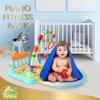

In [64]:
check_1 = list(data_dir.glob('1429052699/*'))
PIL.Image.open(str(check_1[1]))

In [68]:
batch_size = 32
img_height = 100
img_width = 100

In [69]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  # validation_split=0.2,
  # subset="training",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32295 files belonging to 11014 classes.


In [70]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32295 files belonging to 11014 classes.
Using 6459 files for validation.


In [71]:
class_names = train_ds.class_names
print(class_names)

['1000051365', '1000106726', '1000644922', '1000673727', '100112565', '1001292672', '1001549466', '1001789326', '1002023044', '1002199397', '1002409299', '1002765200', '100304050', '1003252496', '1003513025', '100467555', '1005010065', '1005412638', '100596628', '1006632886', '1006682573', '1006857895', '1006973111', '10069919', '100773610', '1007825488', '1007887132', '1008524614', '1008700839', '1009103687', '1009426481', '1009607791', '1010342048', '1010522046', '1010747501', '101129666', '1011405834', '1011603387', '1011931446', '1012512895', '1012631413', '1013017519', '1013219548', '1013339050', '1013980683', '1014266988', '1014487628', '1014722657', '1014849774', '1014916122', '1015072454', '1015815580', '1016089803', '1016161298', '1016178132', '1016447215', '101686954', '1017204581', '1017256196', '1017546066', '1017746219', '1018209784', '1018873174', '1018950168', '1019668446', '1019676991', '1019858566', '1020050479', '1020205475', '1020595094', '1022501714', '1024453873', 

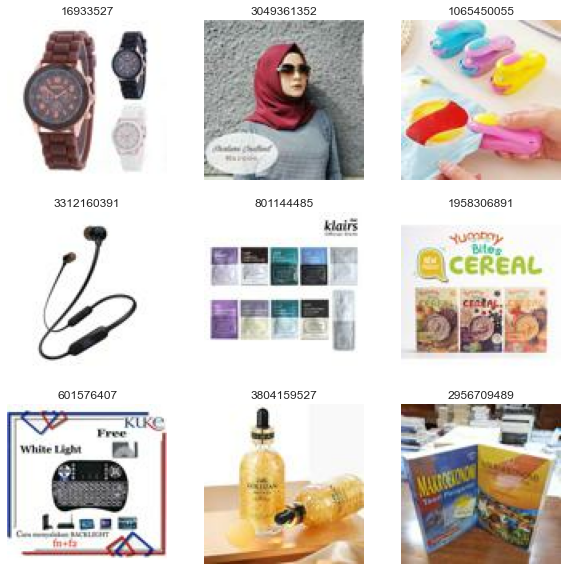

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [73]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [74]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [75]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [76]:
num_classes = 11014

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [77]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [78]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
1010/1010 [==============================] - 293s 289ms/step - loss: 9.3130 - accuracy: 0.0012 - val_loss: 9.2286 - val_accuracy: 0.0012
Epoch 2/3
1010/1010 [==============================] - 290s 287ms/step - loss: 8.8054 - accuracy: 0.0011 - val_loss: 9.2558 - val_accuracy: 0.0017
Epoch 3/3
1010/1010 [==============================] - 310s 306ms/step - loss: 9.0819 - accuracy: 0.0019 - val_loss: 9.2327 - val_accuracy: 0.0017
